In [1]:
import mozo2 

import importlib
importlib.reload(mozo2)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from mozo import compare_and_combine_2, Diff, merge_with_features, num_to_range_categories
import pandas as pd
import numpy as np
np.random.seed(0)

import xgboost as xgb

from scipy import stats
import math 
import datetime 

from sklearn.metrics import r2_score, mean_absolute_error
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from functools import partial
import xgboost as xgb
import lightgbm as lgb
import catboost as ctb
from sklearn.svm import SVC

from sklearn.metrics import r2_score, f1_score, mean_absolute_error, mean_squared_error

from scikitplot.estimators import plot_learning_curve

import time
from datetime import datetime


print_plots_by_type(total, type =[np.object])

In [3]:
## modelowanie

In [8]:
# import warnings
# warnings.filterwarnings("ignore")

total = pd.read_csv('~/pml7/konkurs/output/newest_total_20201101_22_47_price_3_sigma.h5.csv')
total.info(verbose=True)

train_30 = pd.read_hdf('output/train_30.h5', 'data') 
test_car_ids = train_30['car_id'].values

train_70 = total[~total['car_id'].isin(test_car_ids) & ~total['price_value'].isna()]
train_30 = total[total['car_id'].isin(test_car_ids)]

print(len(total.index))
print(len(total[~total['price_value'].isna()].index))

print(train_70['price_value'].isna().sum())
print(train_30['price_value'].isna().sum())

train_100 = total[~total['price_value'].isna()]
print(train_100['price_value'].isna().sum())

global_min = total[~total['price_value'].isna()].price_value.min()

test = total[total['price_value'].isna()]
train = total[~total['price_value'].isna()]

train_70_out = train_70.loc[(train_70['is_outlier'] == False)]

out_price_value = train_70_out.loc[np.abs(stats.zscore(train_70_out[['price_value']])) > 3.5, 'car_id'].values
print(len(out_price_value))
train_70_out['out_price_value'] = False
train_70_out.loc[total['car_id'].isin(out_price_value), 'out_price_value'] = True
train_70_out_price_outs = train_70_out.loc[(train_70_out['out_price_value'] == False)]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160616 entries, 0 to 160615
Data columns (total 230 columns):
 #   Column                                                    Dtype  
---  ------                                                    -----  
 0   breadcrumb                                                object 
 1   created_at                                                object 
 2   price_currency                                            object 
 3   price_details                                             object 
 4   price_value                                               float64
 5   seller_address                                            object 
 6   seller_name                                               object 
 7   seller_type                                               object 
 8   feature_czujniki_parkowania_przednie                      bool   
 9   feature_poduszka_powietrzna_chroniąca_kolana              bool   
 10  feature_kurtyny_powietrzne     

160616
106494
0
0
0
1246


3: price_value [66.30%=106494/160616 #7821]: 
7: feature_czujniki_parkowania_przednie [100.00%=160616/160616 #2]: 
False    119481
True      41135
Name: feature_czujniki_parkowania_przednie, dtype: int64


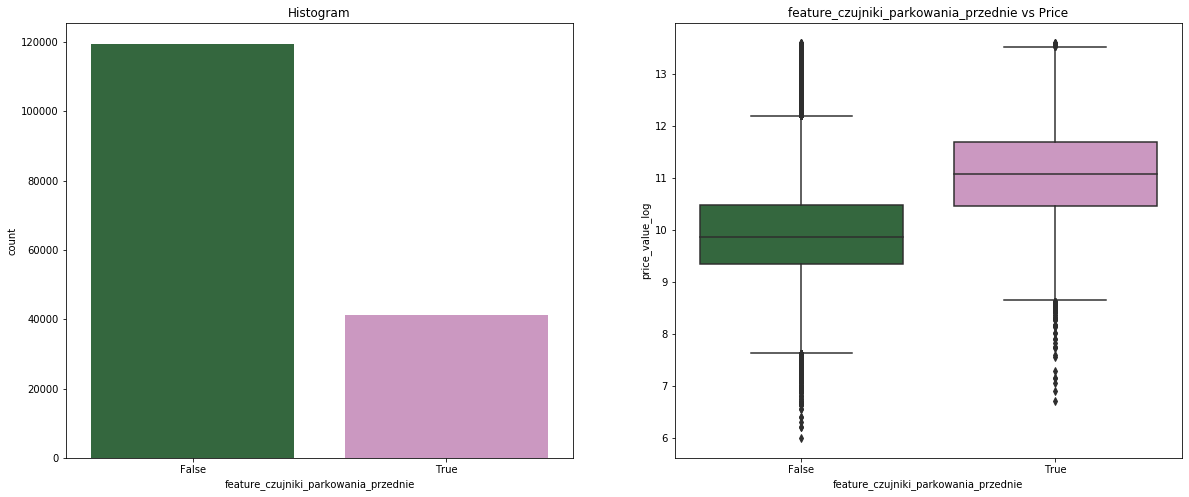

8: feature_poduszka_powietrzna_chroniąca_kolana [100.00%=160616/160616 #2]: 
False    129419
True      31197
Name: feature_poduszka_powietrzna_chroniąca_kolana, dtype: int64


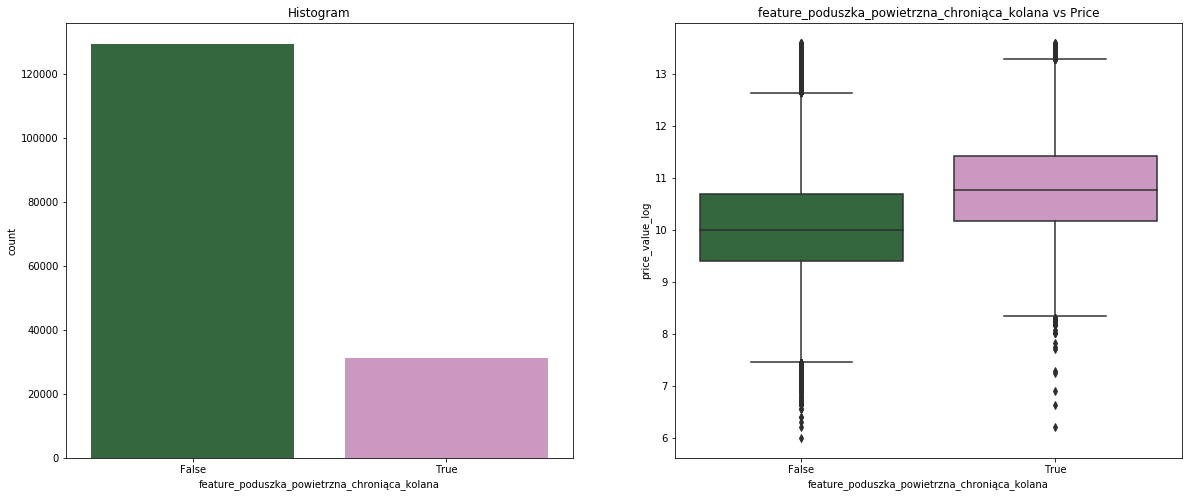

9: feature_kurtyny_powietrzne [100.00%=160616/160616 #2]: 
True     87201
False    73415
Name: feature_kurtyny_powietrzne, dtype: int64


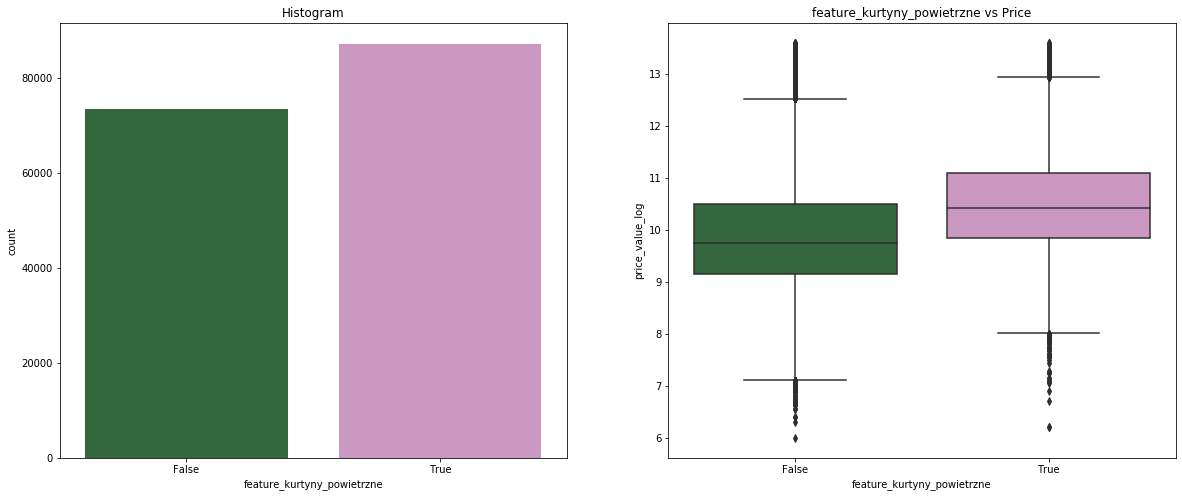

10: feature_klimatyzacja_dwustrefowa [100.00%=160616/160616 #2]: 
False    99684
True     60932
Name: feature_klimatyzacja_dwustrefowa, dtype: int64


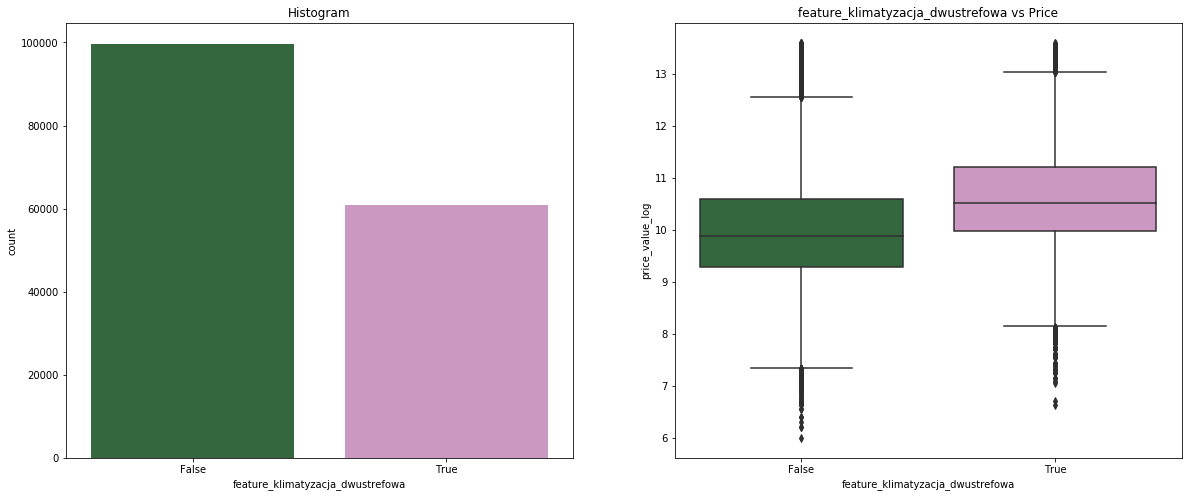

11: feature_światła_led [100.00%=160616/160616 #2]: 
False    125228
True      35388
Name: feature_światła_led, dtype: int64


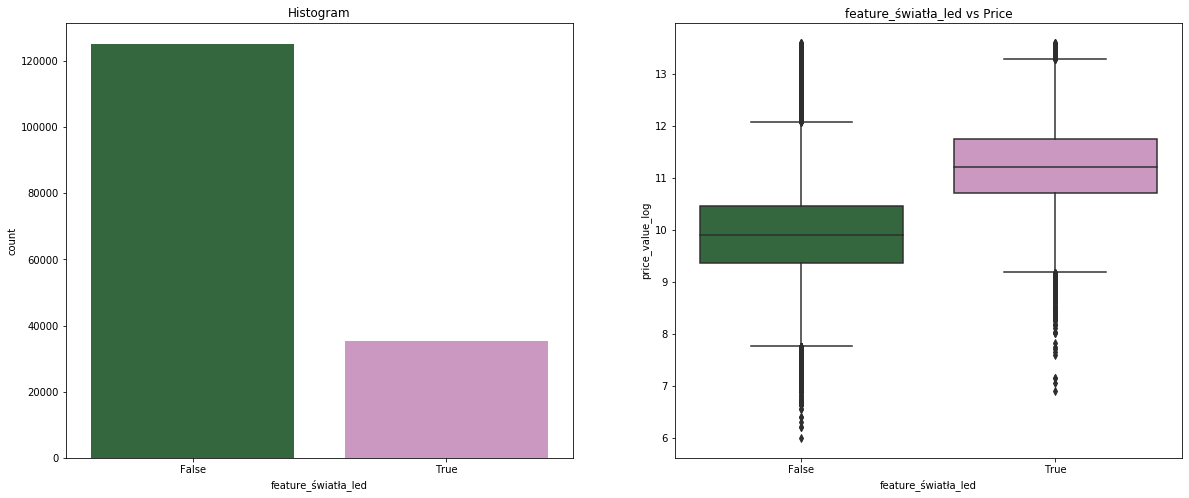

12: feature_czujnik_zmierzchu [100.00%=160616/160616 #2]: 
False    97509
True     63107
Name: feature_czujnik_zmierzchu, dtype: int64


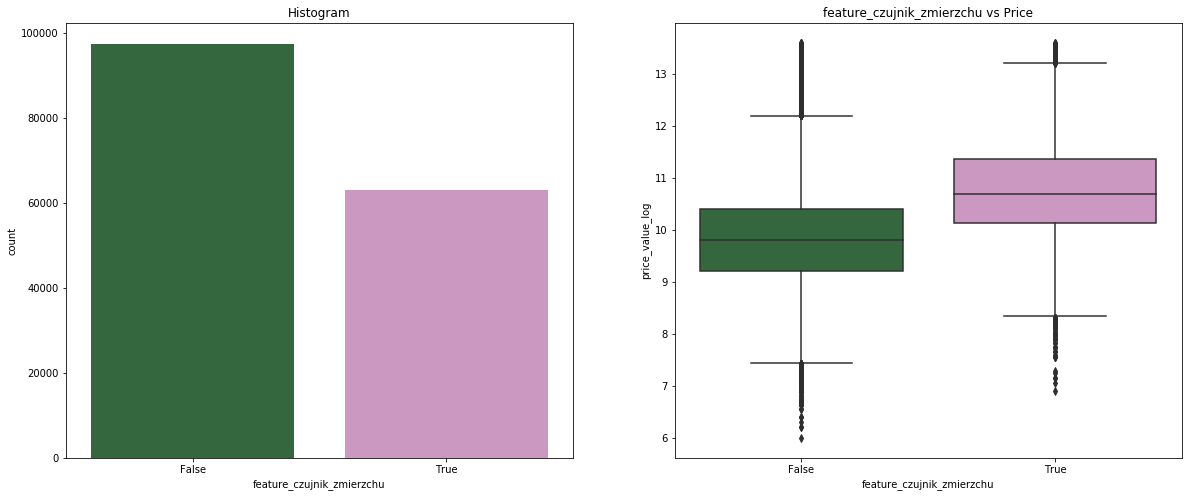

13: feature_elektrycznie_ustawiane_lusterka [100.00%=160616/160616 #2]: 
True     136243
False     24373
Name: feature_elektrycznie_ustawiane_lusterka, dtype: int64


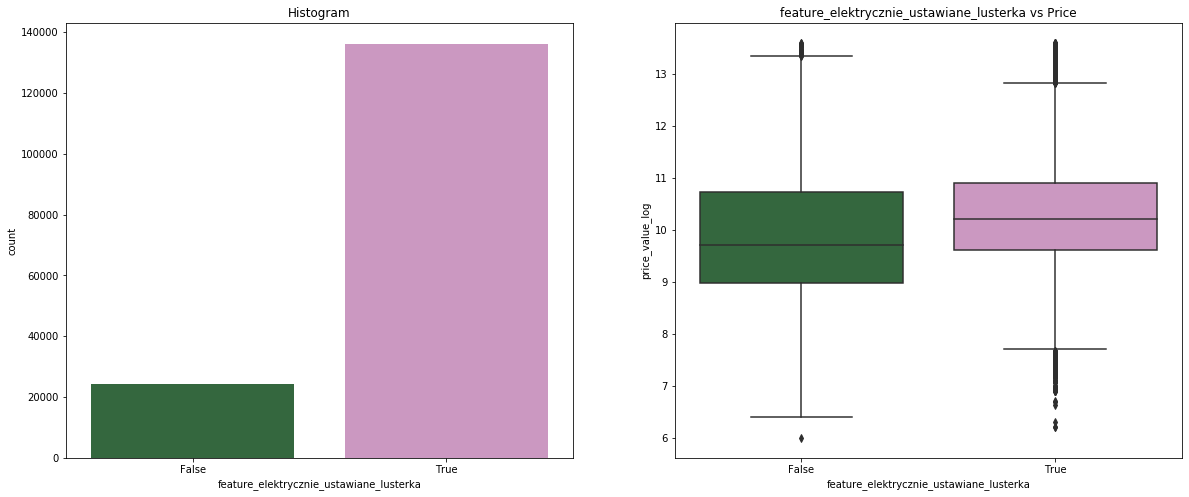

14: feature_asr__kontrola_trakcji_ [100.00%=160616/160616 #2]: 
True     97526
False    63090
Name: feature_asr__kontrola_trakcji_, dtype: int64


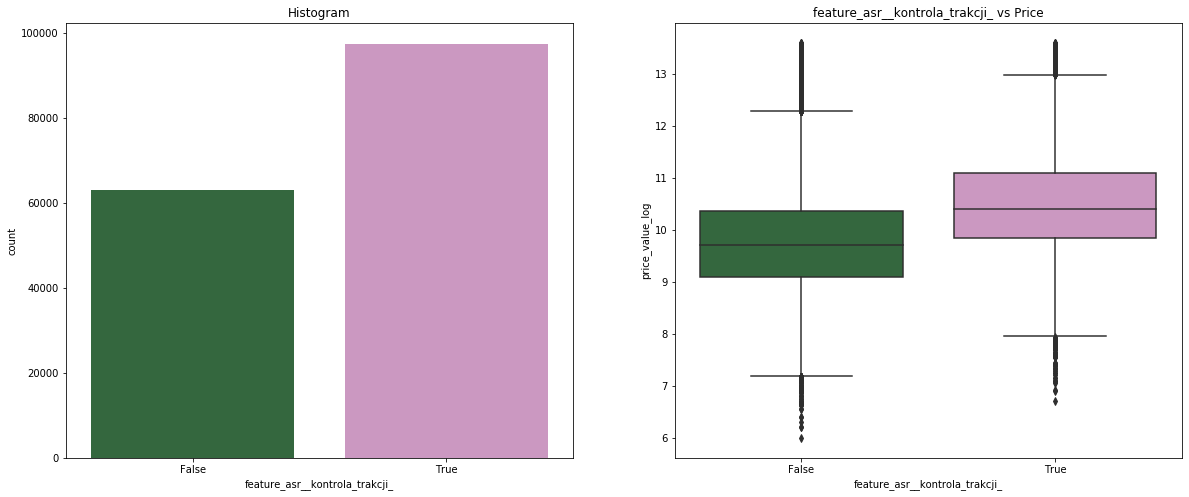

15: feature_poduszka_powietrzna_kierowcy [100.00%=160616/160616 #2]: 
True     143414
False     17202
Name: feature_poduszka_powietrzna_kierowcy, dtype: int64


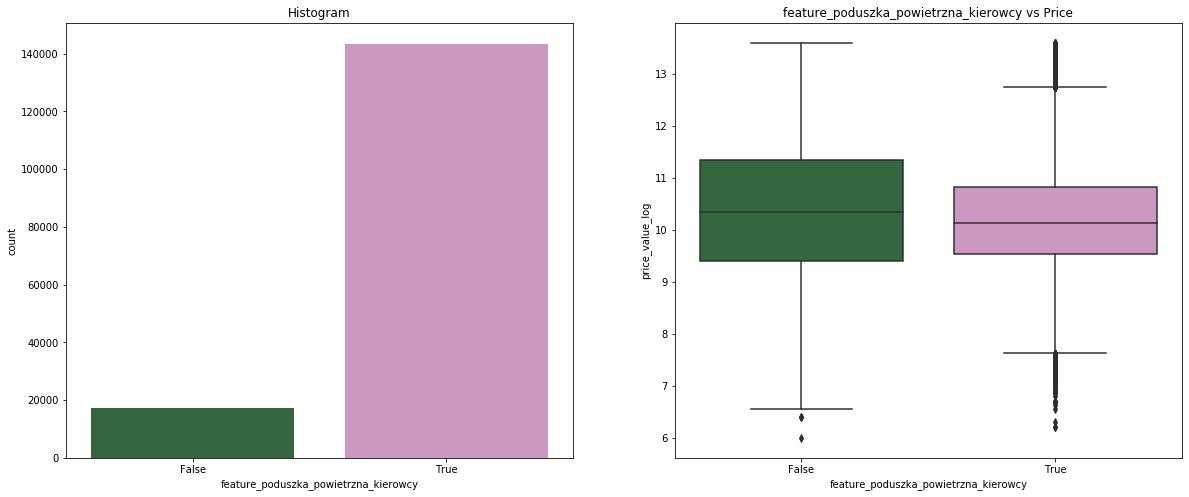

16: feature_cd [100.00%=160616/160616 #2]: 
True     128436
False     32180
Name: feature_cd, dtype: int64


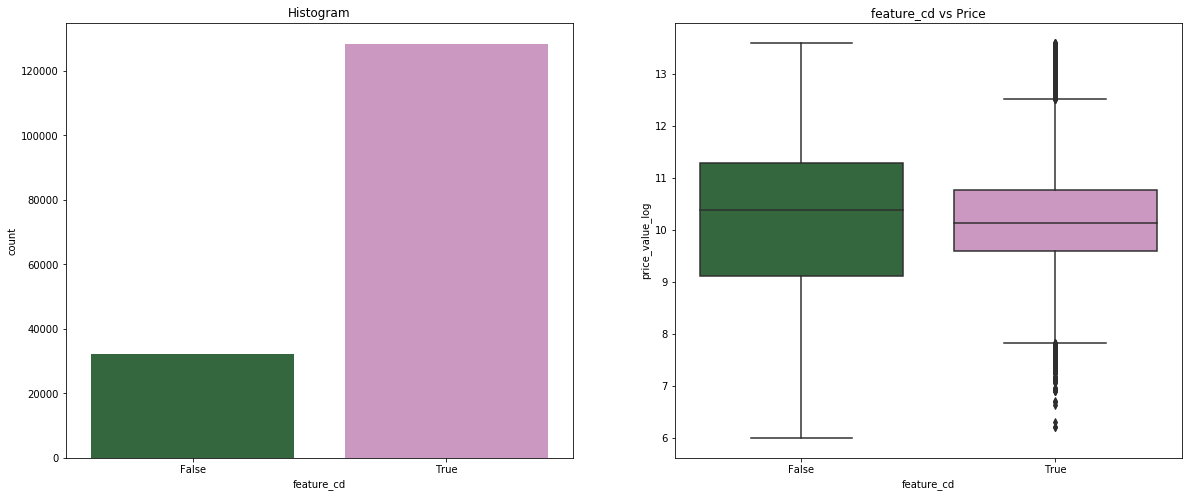

17: feature_elektryczne_szyby_przednie [100.00%=160616/160616 #2]: 
True     143660
False     16956
Name: feature_elektryczne_szyby_przednie, dtype: int64


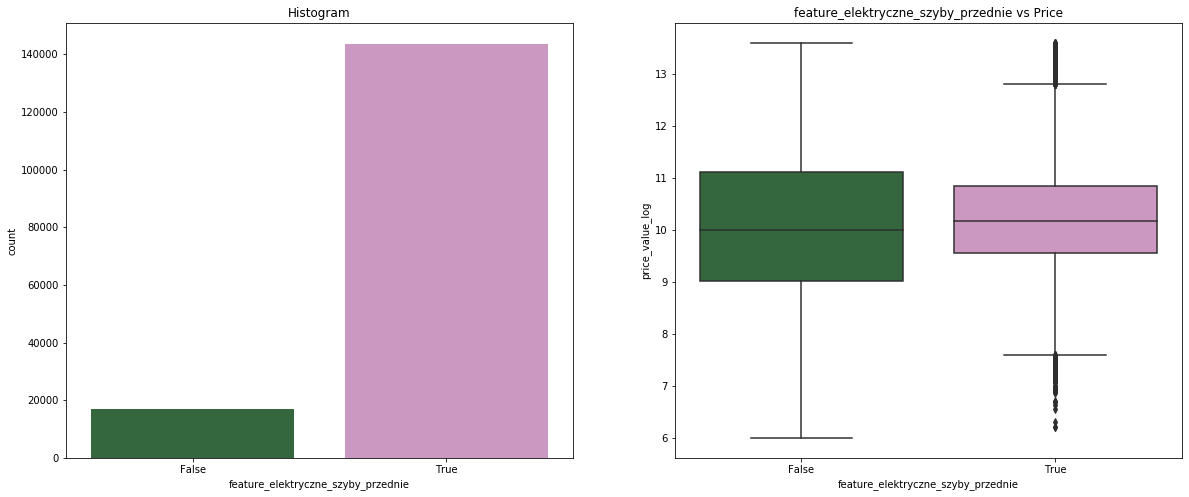

18: feature_poduszka_powietrzna_pasażera [100.00%=160616/160616 #2]: 
True     141551
False     19065
Name: feature_poduszka_powietrzna_pasażera, dtype: int64


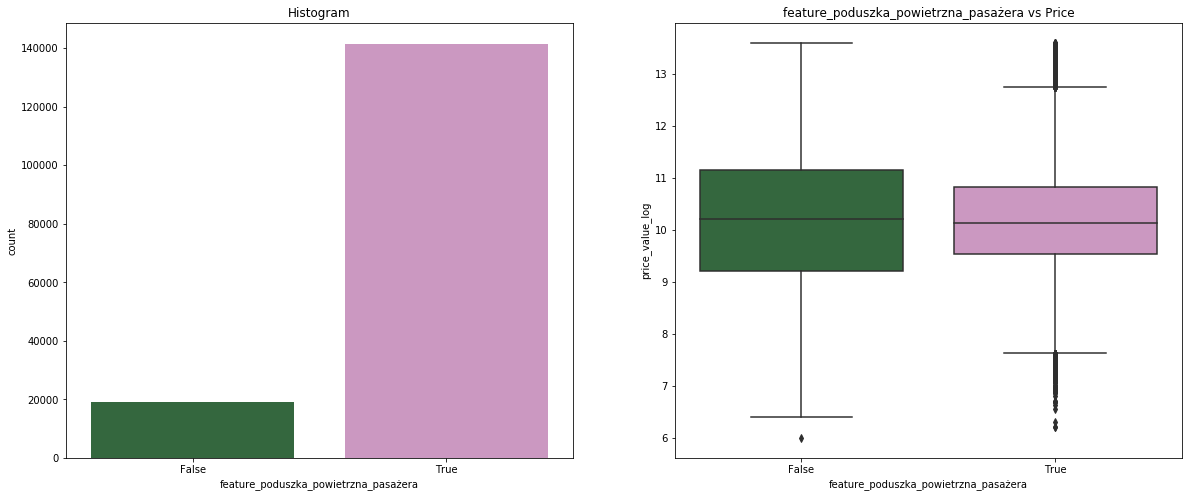

19: feature_system_start_stop [100.00%=160616/160616 #2]: 
False    129291
True      31325
Name: feature_system_start_stop, dtype: int64


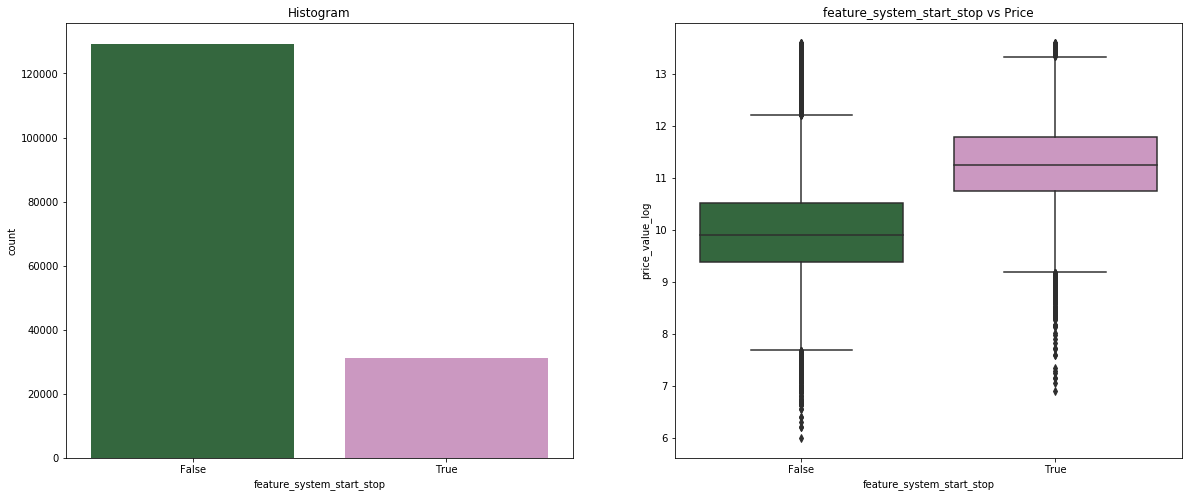

20: feature_światła_do_jazdy_dziennej [100.00%=160616/160616 #2]: 
False    103753
True      56863
Name: feature_światła_do_jazdy_dziennej, dtype: int64


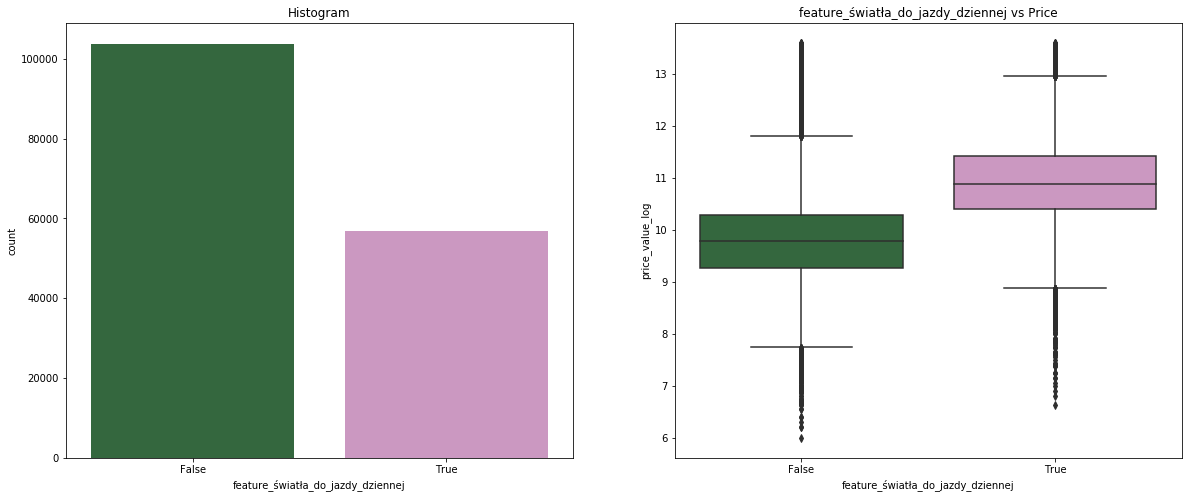

21: feature_komputer_pokładowy [100.00%=160616/160616 #2]: 
True     114404
False     46212
Name: feature_komputer_pokładowy, dtype: int64


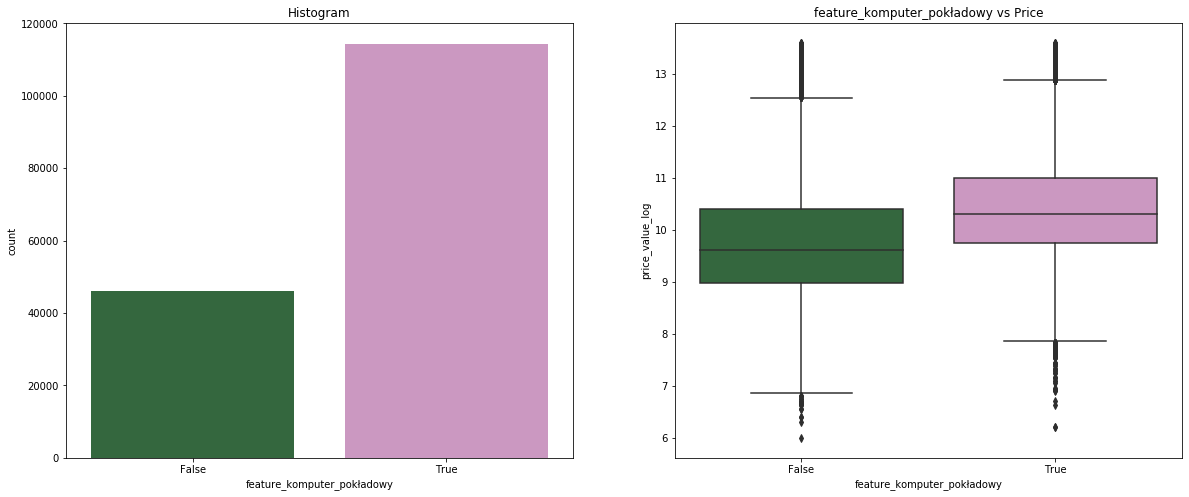

22: feature_elektryczne_szyby_tylne [100.00%=160616/160616 #2]: 
True     87536
False    73080
Name: feature_elektryczne_szyby_tylne, dtype: int64


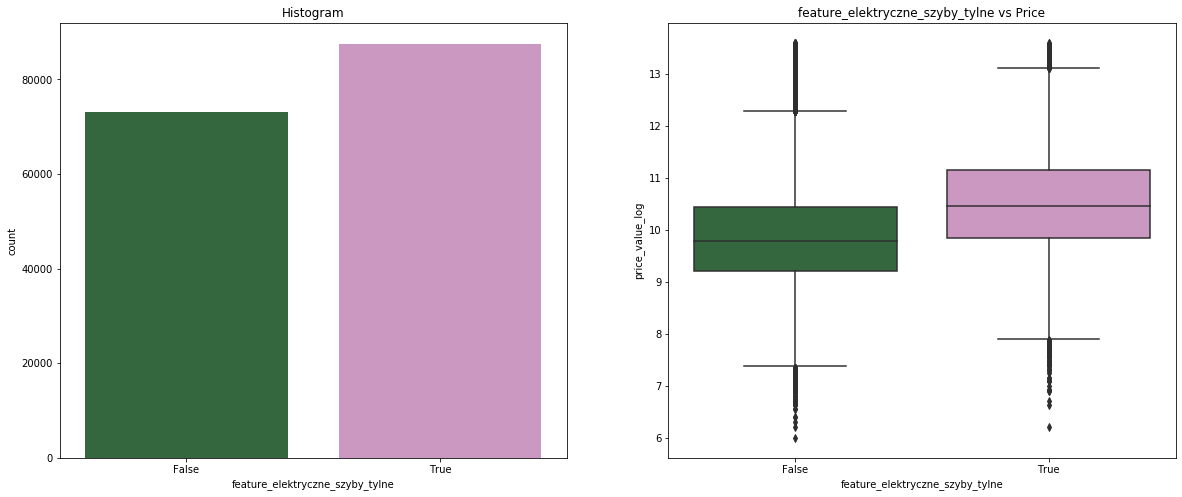

23: feature_klimatyzacja_manualna [100.00%=160616/160616 #2]: 
False    112791
True      47825
Name: feature_klimatyzacja_manualna, dtype: int64


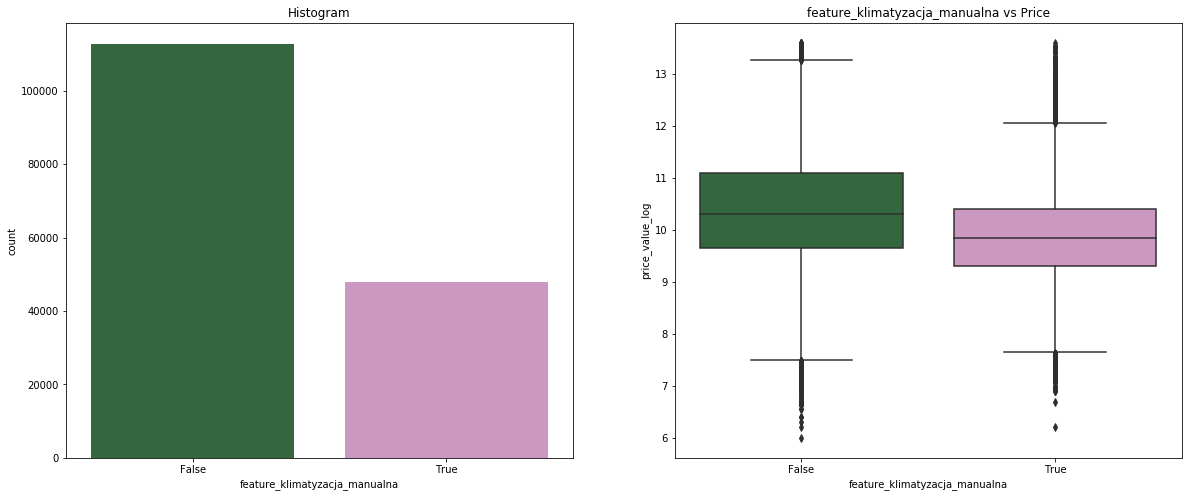

24: feature_tapicerka_welurowa [100.00%=160616/160616 #2]: 
False    113013
True      47603
Name: feature_tapicerka_welurowa, dtype: int64


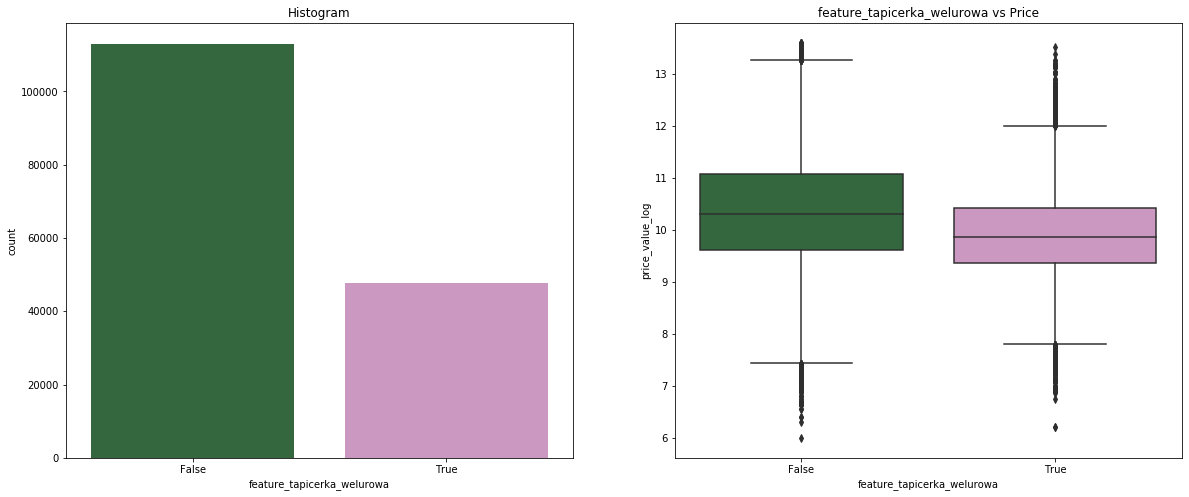

25: feature_czujnik_deszczu [100.00%=160616/160616 #2]: 
False    91619
True     68997
Name: feature_czujnik_deszczu, dtype: int64


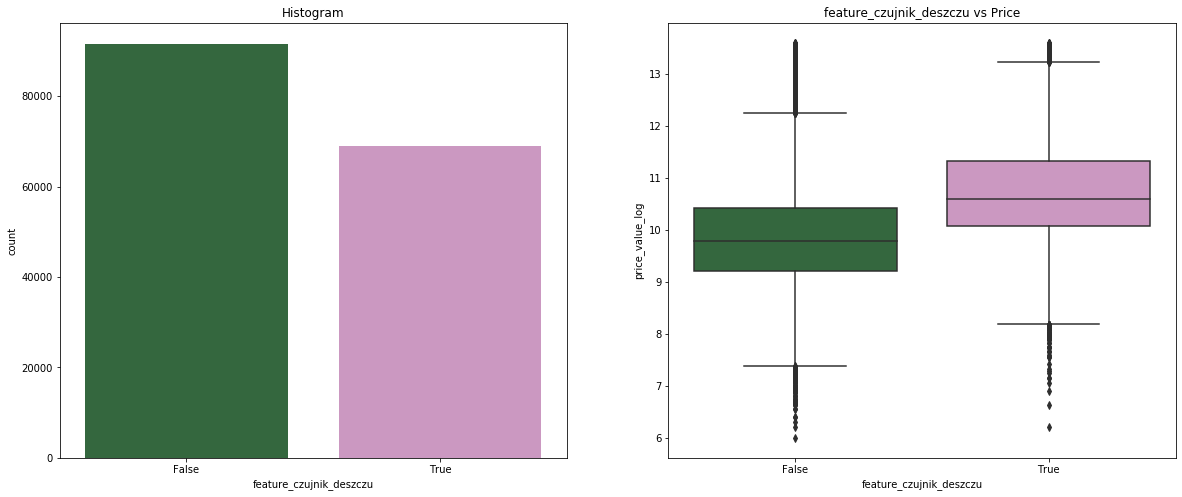

26: feature_światła_przeciwmgielne [100.00%=160616/160616 #2]: 
True     97679
False    62937
Name: feature_światła_przeciwmgielne, dtype: int64


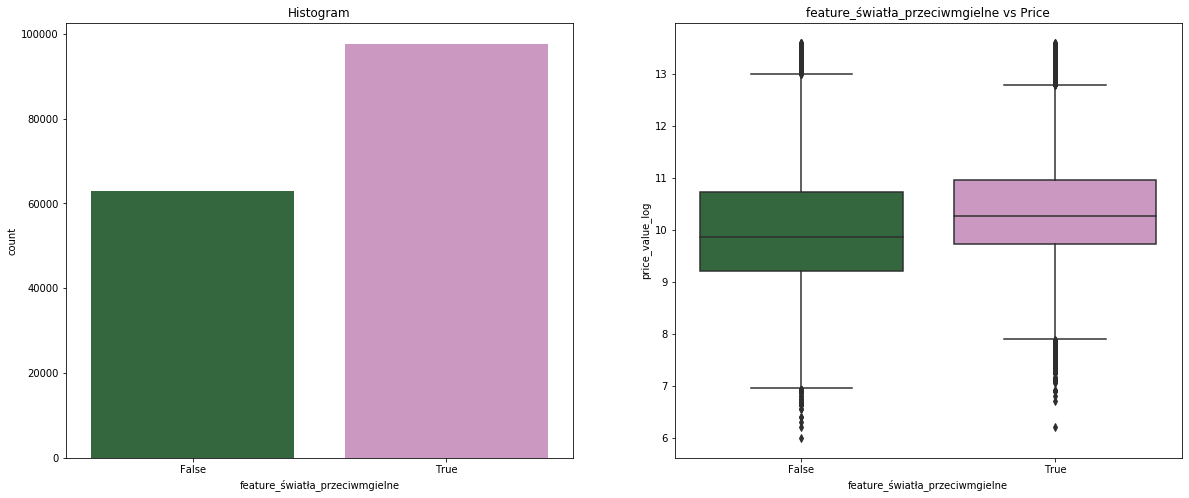

27: feature_ogrzewanie_postojowe [100.00%=160616/160616 #2]: 
False    155435
True       5181
Name: feature_ogrzewanie_postojowe, dtype: int64


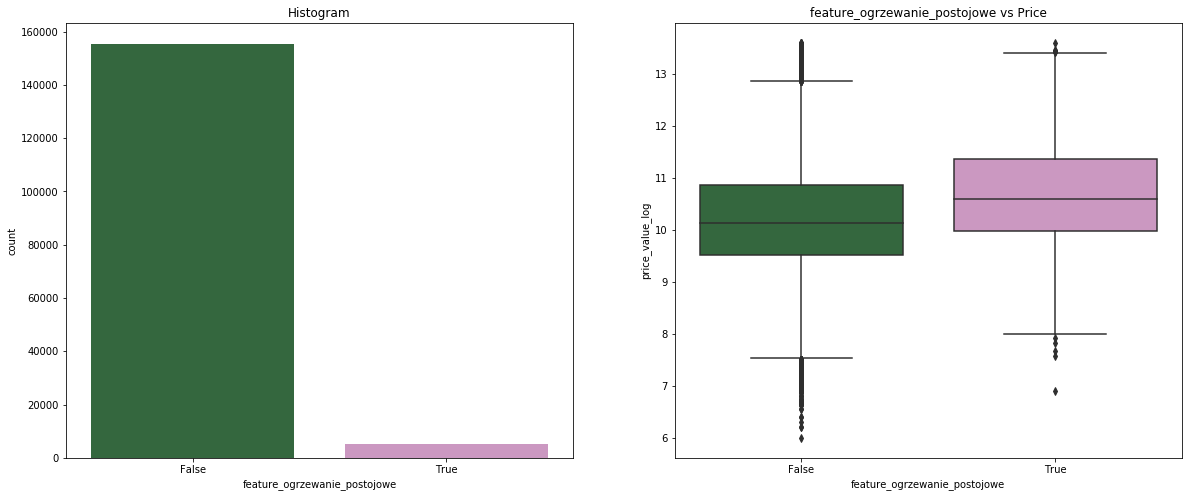

28: feature_radio_niefabryczne [100.00%=160616/160616 #2]: 
False    150209
True      10407
Name: feature_radio_niefabryczne, dtype: int64


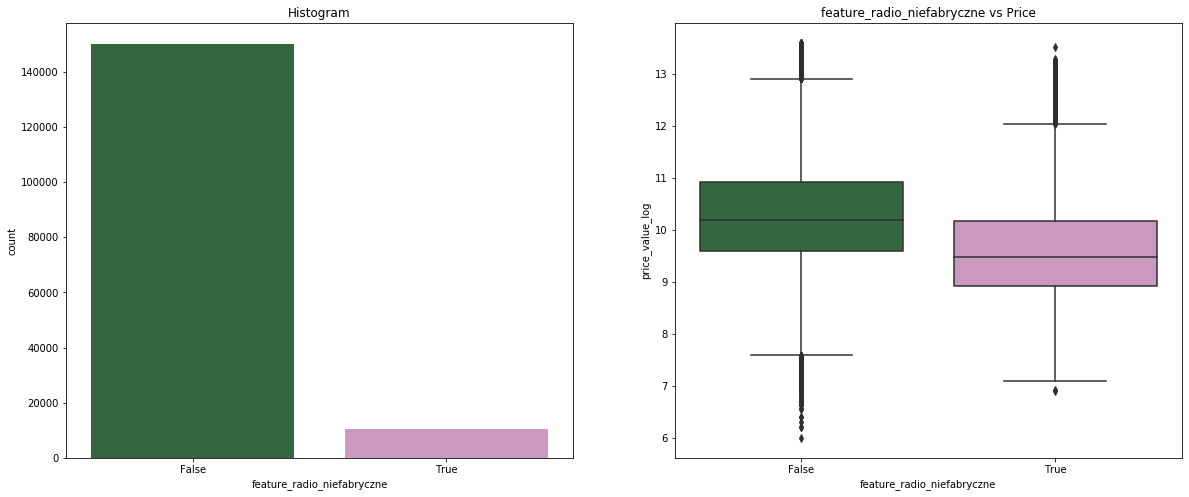

29: feature_regulowane_zawieszenie [100.00%=160616/160616 #2]: 
False    154026
True       6590
Name: feature_regulowane_zawieszenie, dtype: int64


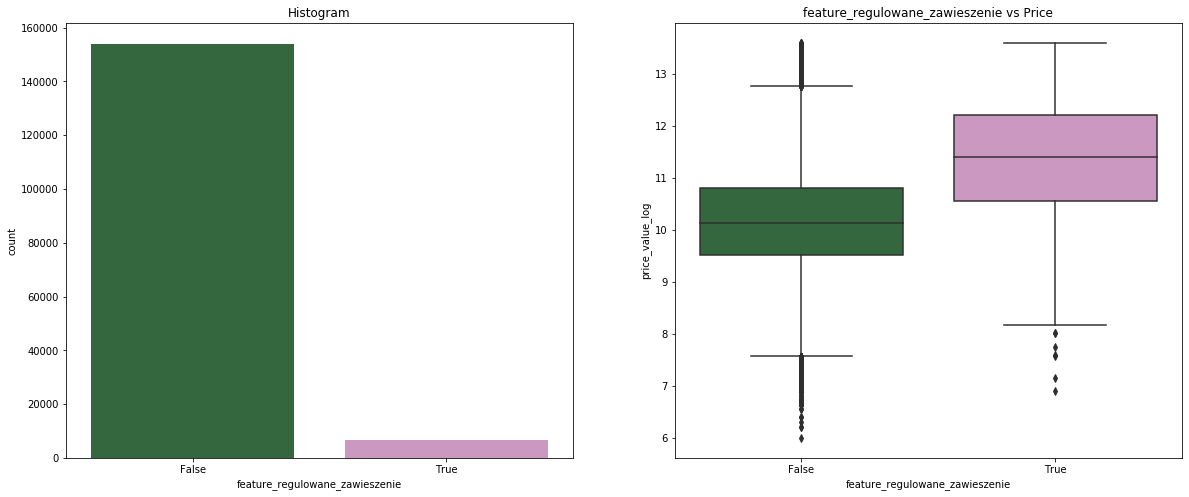

30: feature_ogranicznik_prędkości [100.00%=160616/160616 #2]: 
False    134631
True      25985
Name: feature_ogranicznik_prędkości, dtype: int64


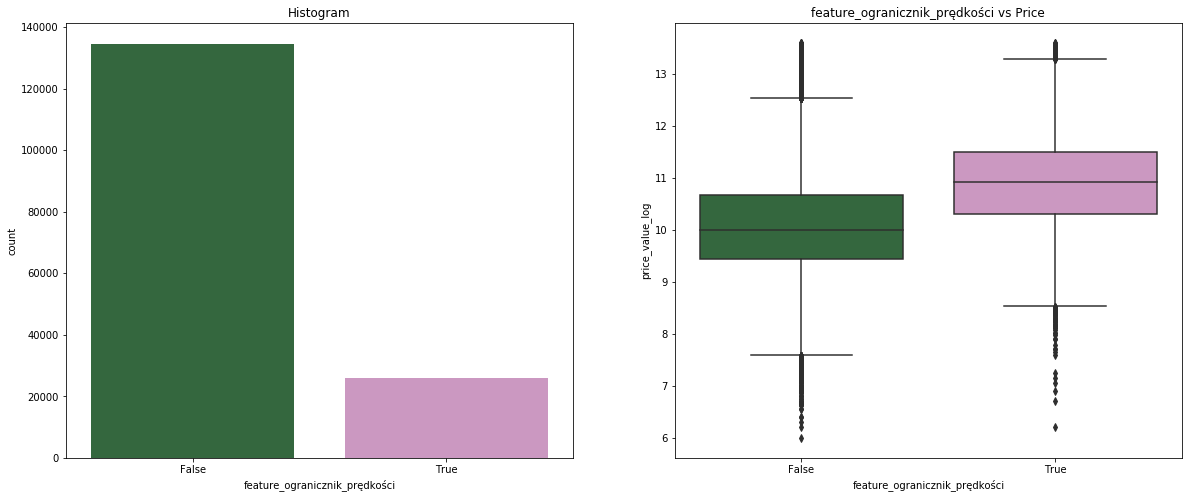

31: feature_zmieniarka_cd [100.00%=160616/160616 #2]: 
False    145875
True      14741
Name: feature_zmieniarka_cd, dtype: int64


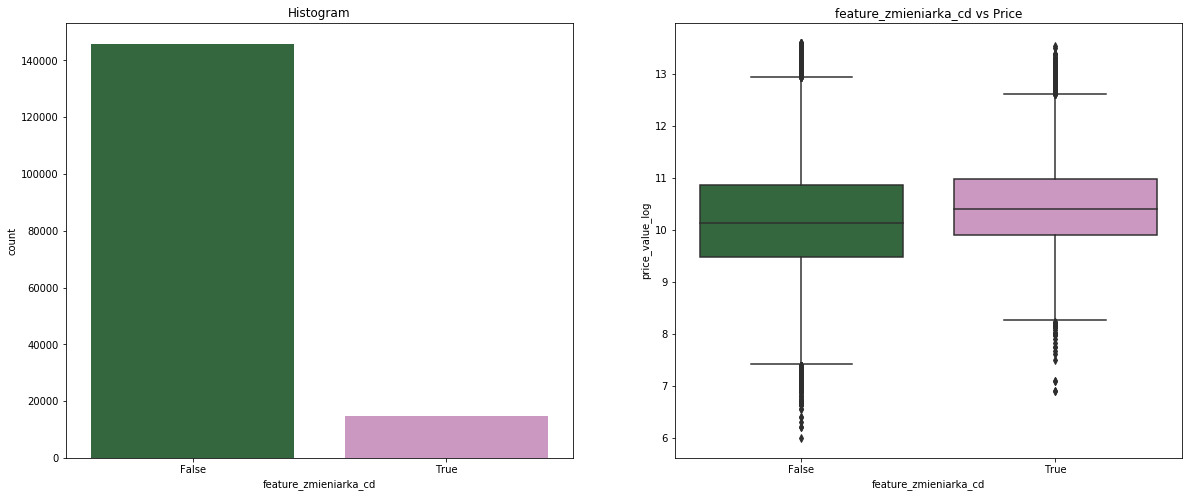

32: feature_szyberdach [100.00%=160616/160616 #2]: 
False    146313
True      14303
Name: feature_szyberdach, dtype: int64


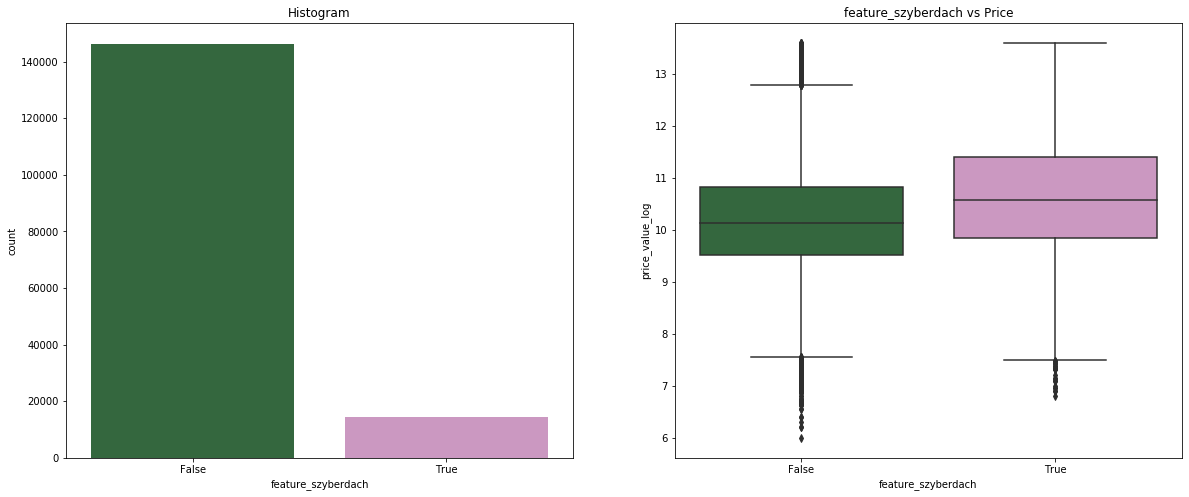

33: feature_isofix [100.00%=160616/160616 #2]: 
True     85248
False    75368
Name: feature_isofix, dtype: int64


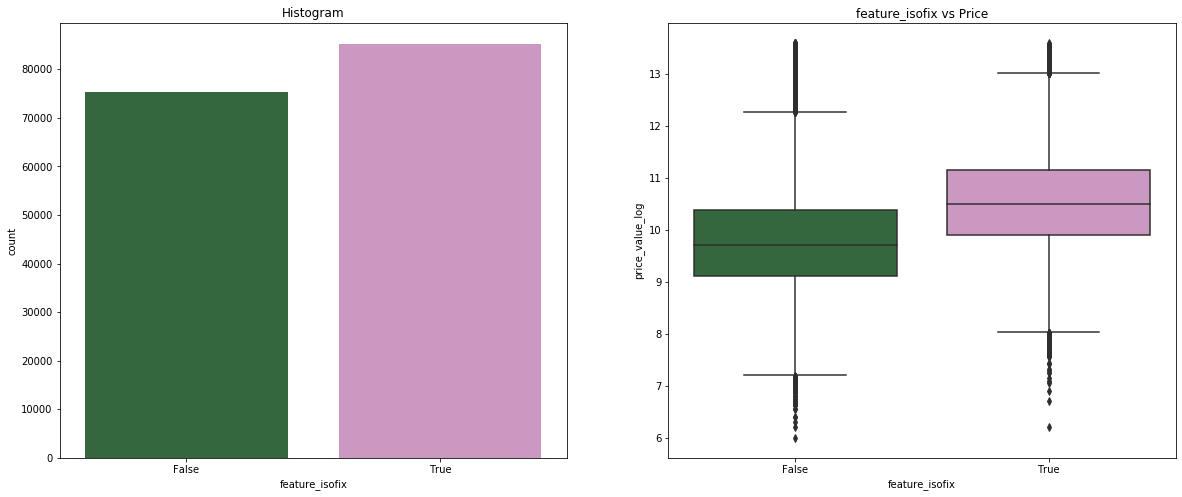

34: feature_asystent_pasa_ruchu [100.00%=160616/160616 #2]: 
False    149605
True      11011
Name: feature_asystent_pasa_ruchu, dtype: int64


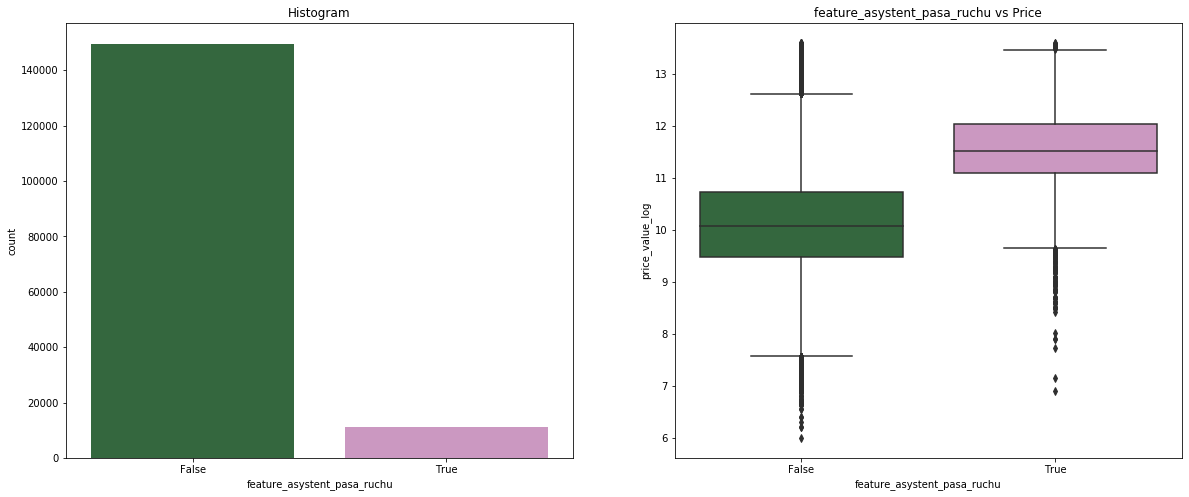

35: feature_alufelgi [100.00%=160616/160616 #2]: 
True     102365
False     58251
Name: feature_alufelgi, dtype: int64


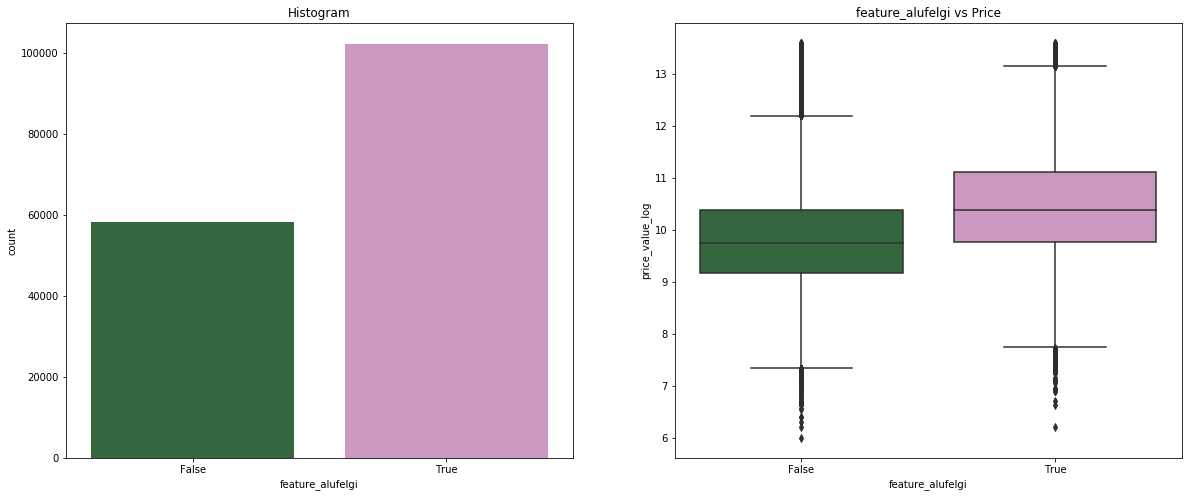

36: feature_bluetooth [100.00%=160616/160616 #2]: 
False    95932
True     64684
Name: feature_bluetooth, dtype: int64


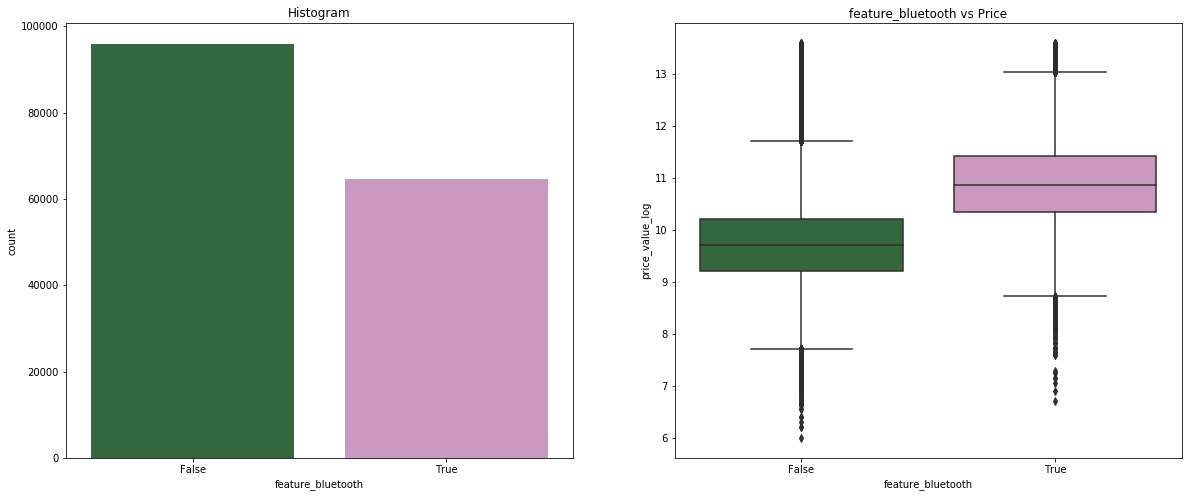

37: feature_nawigacja_gps [100.00%=160616/160616 #2]: 
False    112665
True      47951
Name: feature_nawigacja_gps, dtype: int64


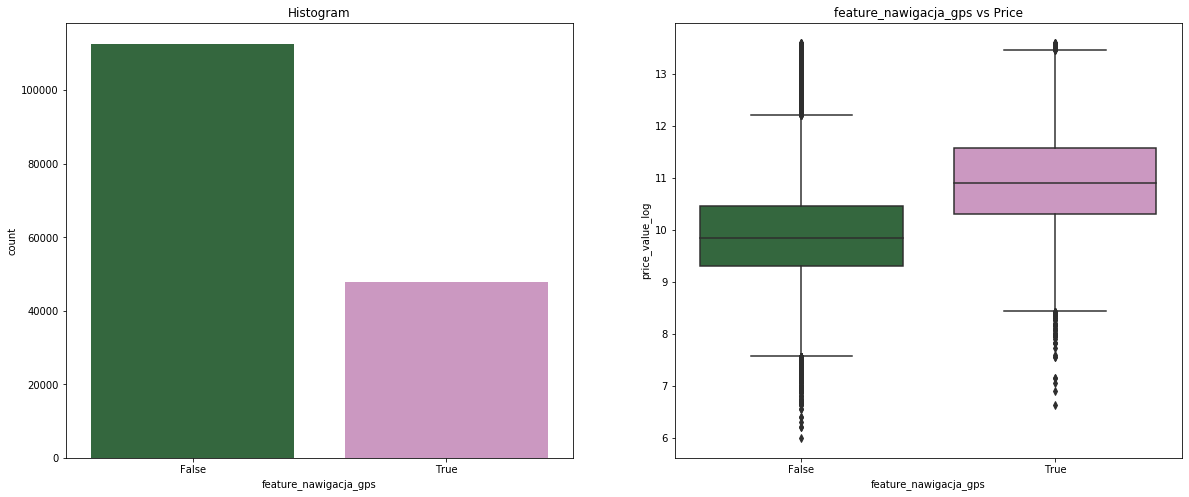

38: feature_asystent_parkowania [100.00%=160616/160616 #2]: 
False    144933
True      15683
Name: feature_asystent_parkowania, dtype: int64


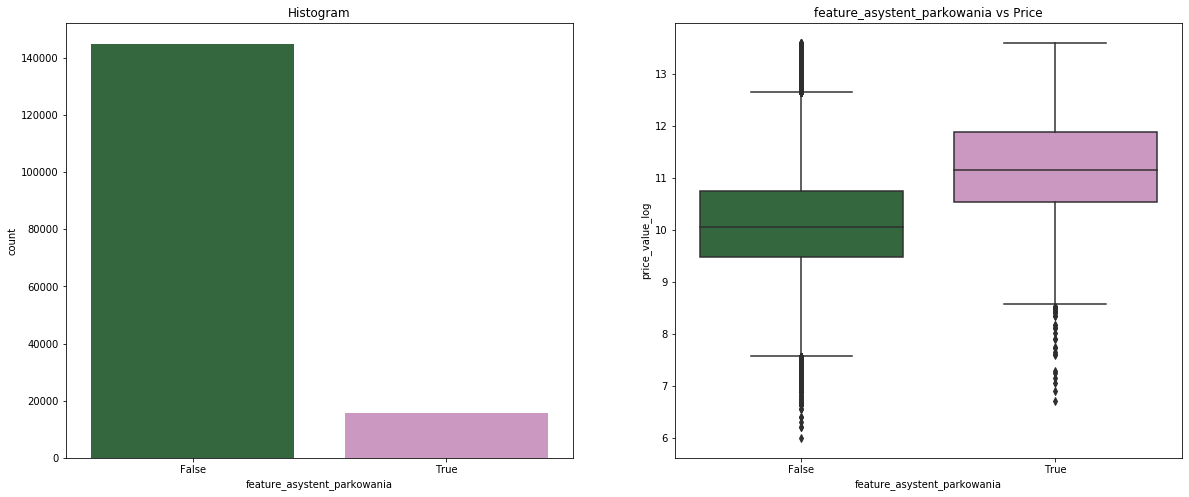

39: feature_wspomaganie_kierownicy [100.00%=160616/160616 #2]: 
True     144096
False     16520
Name: feature_wspomaganie_kierownicy, dtype: int64


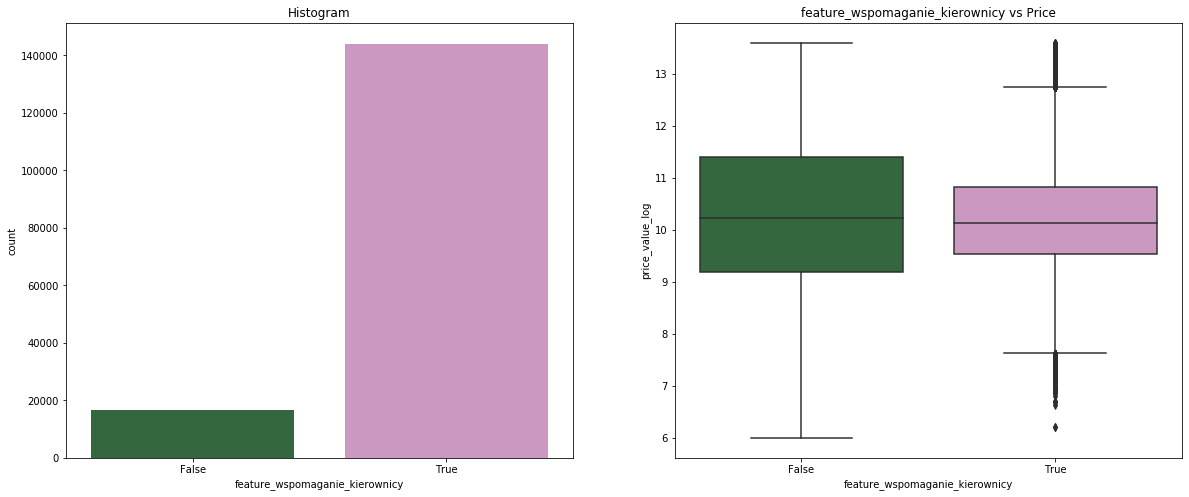

40: feature_podgrzewana_przednia_szyba [100.00%=160616/160616 #2]: 
False    136161
True      24455
Name: feature_podgrzewana_przednia_szyba, dtype: int64


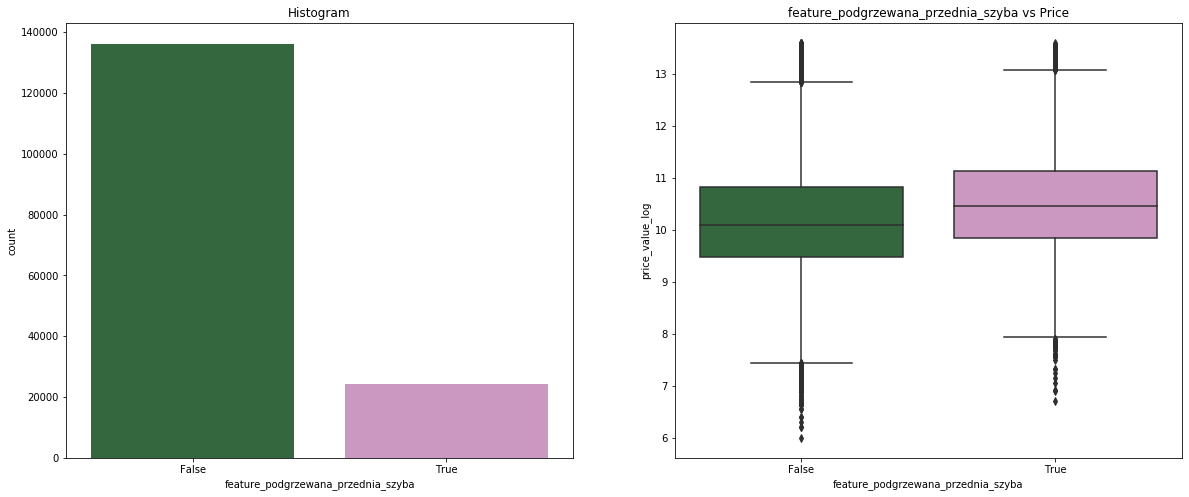

41: feature_przyciemniane_szyby [100.00%=160616/160616 #2]: 
False    109230
True      51386
Name: feature_przyciemniane_szyby, dtype: int64


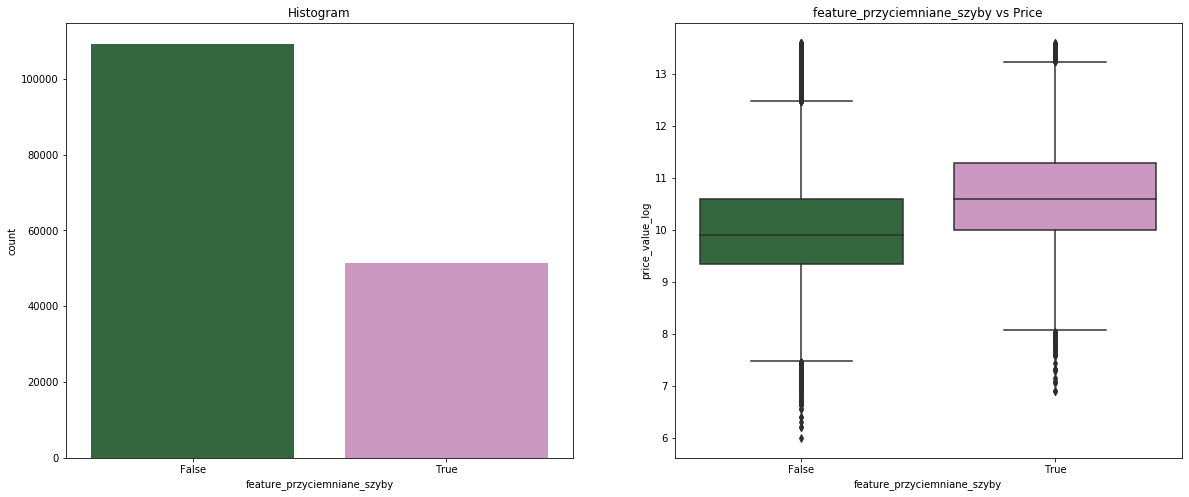

42: feature_elektrycznie_ustawiane_fotele [100.00%=160616/160616 #2]: 
False    130364
True      30252
Name: feature_elektrycznie_ustawiane_fotele, dtype: int64


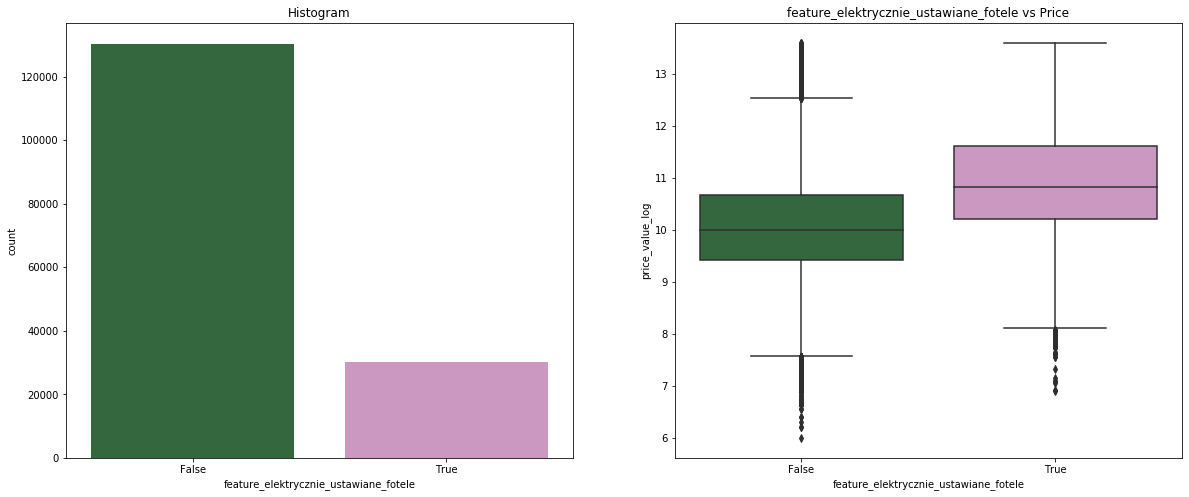

43: feature_klimatyzacja_czterostrefowa [100.00%=160616/160616 #2]: 
False    154895
True       5721
Name: feature_klimatyzacja_czterostrefowa, dtype: int64


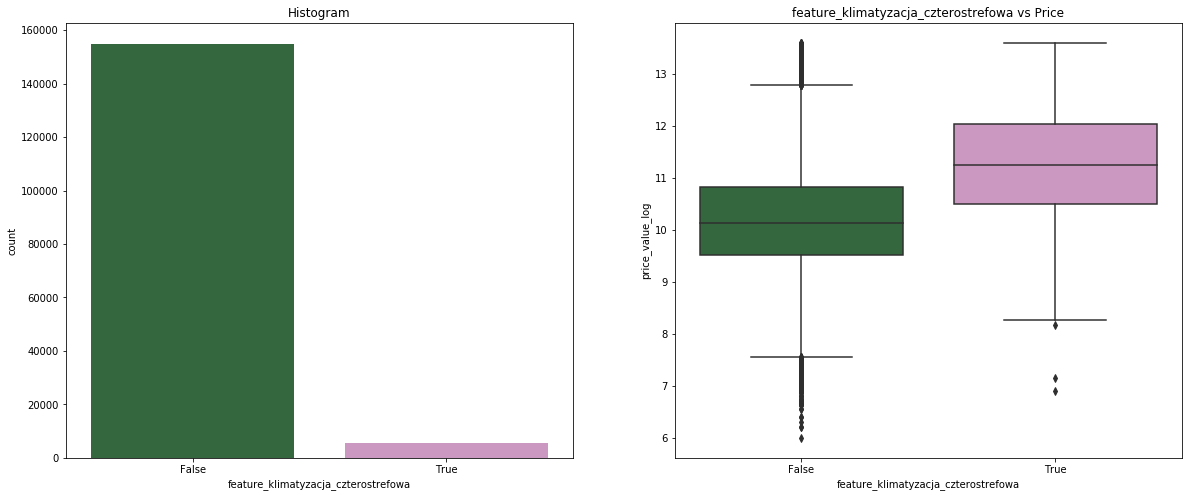

44: feature_tuner_tv [100.00%=160616/160616 #2]: 
False    158316
True       2300
Name: feature_tuner_tv, dtype: int64


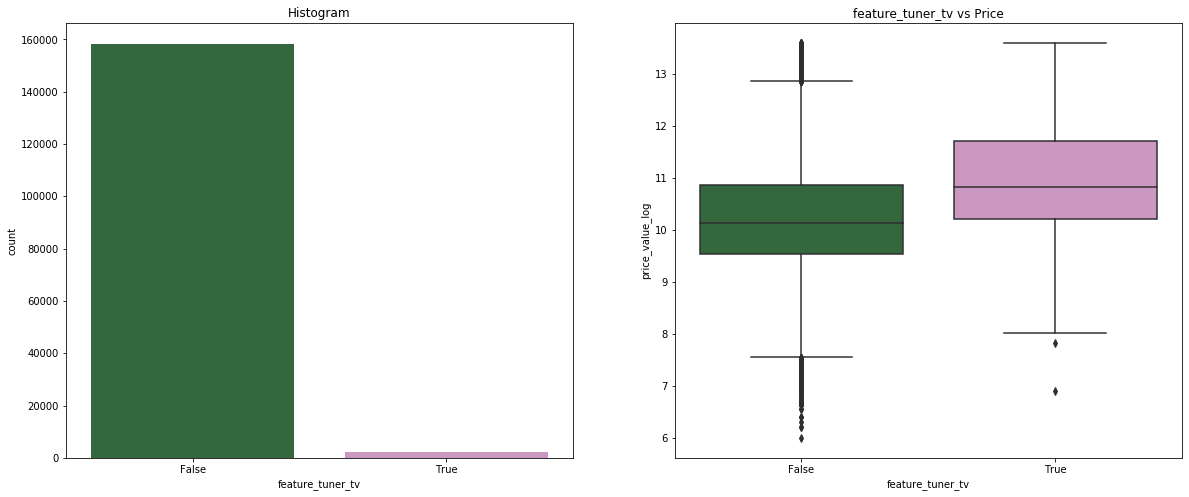

45: feature_poduszki_boczne_przednie [100.00%=160616/160616 #2]: 
True     97735
False    62881
Name: feature_poduszki_boczne_przednie, dtype: int64


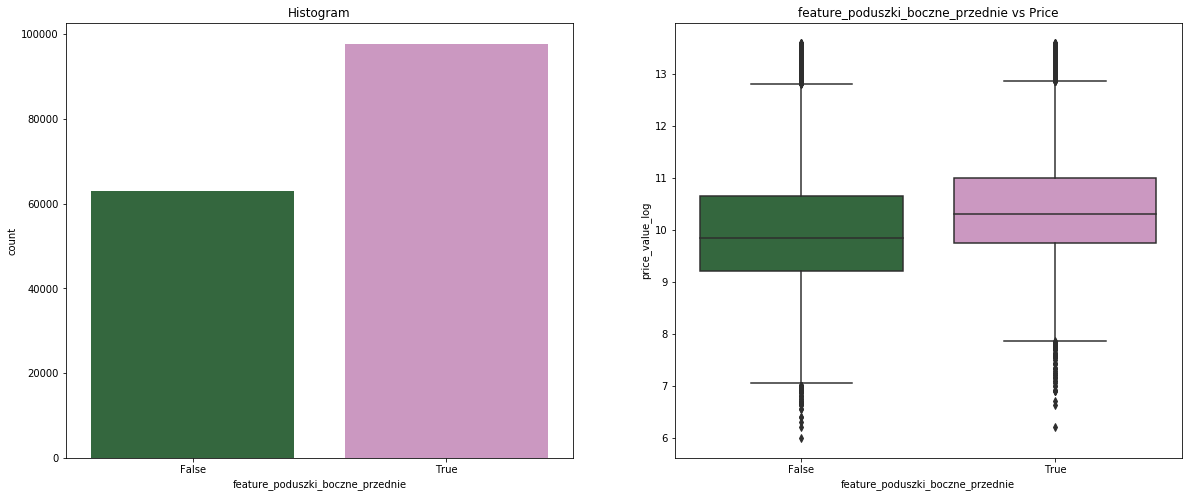

46: feature_tempomat_aktywny [100.00%=160616/160616 #2]: 
False    149959
True      10657
Name: feature_tempomat_aktywny, dtype: int64


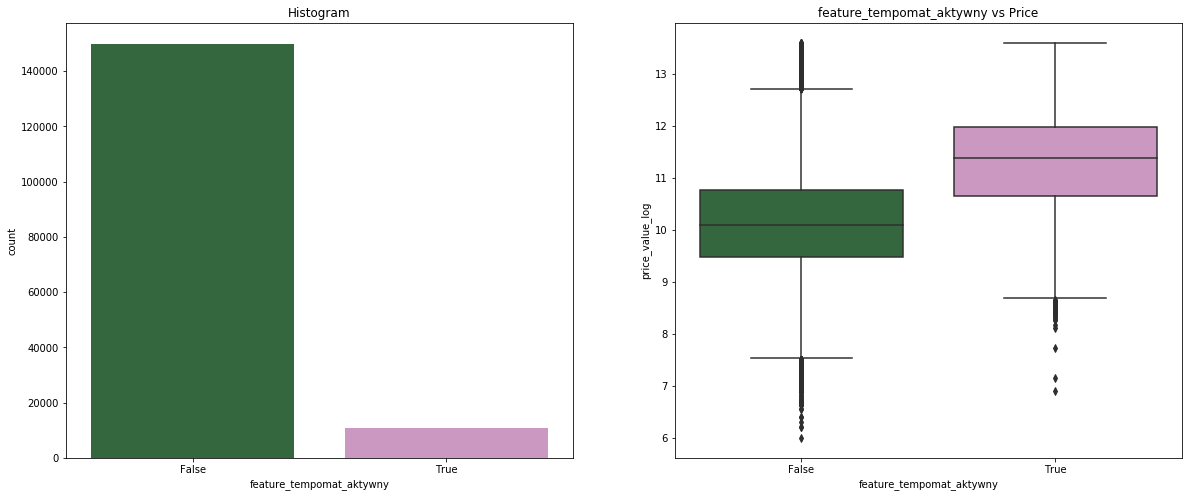

47: feature_klimatyzacja_automatyczna [100.00%=160616/160616 #2]: 
True     89469
False    71147
Name: feature_klimatyzacja_automatyczna, dtype: int64


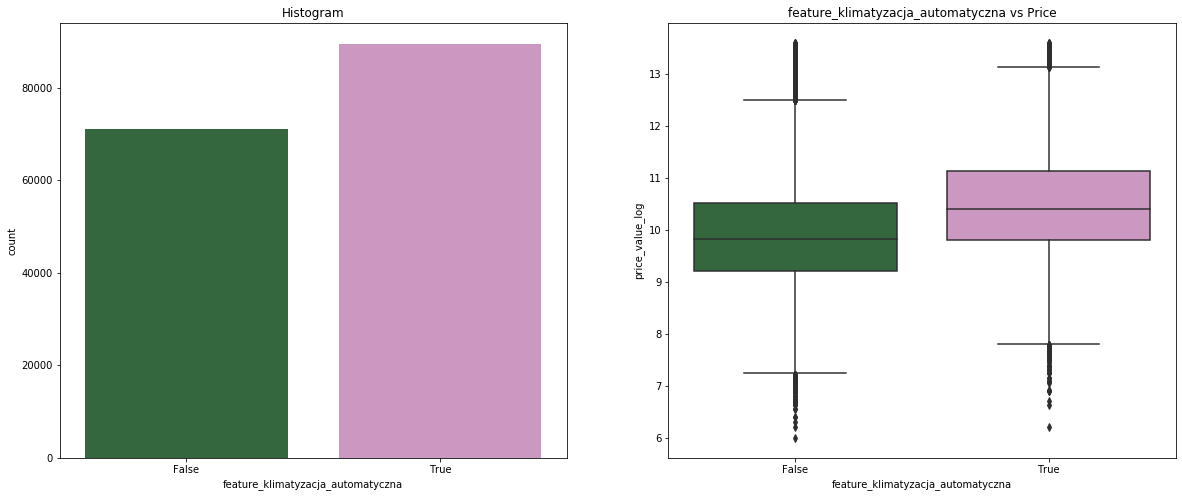

48: feature_poduszki_boczne_tylne [100.00%=160616/160616 #2]: 
False    110844
True      49772
Name: feature_poduszki_boczne_tylne, dtype: int64


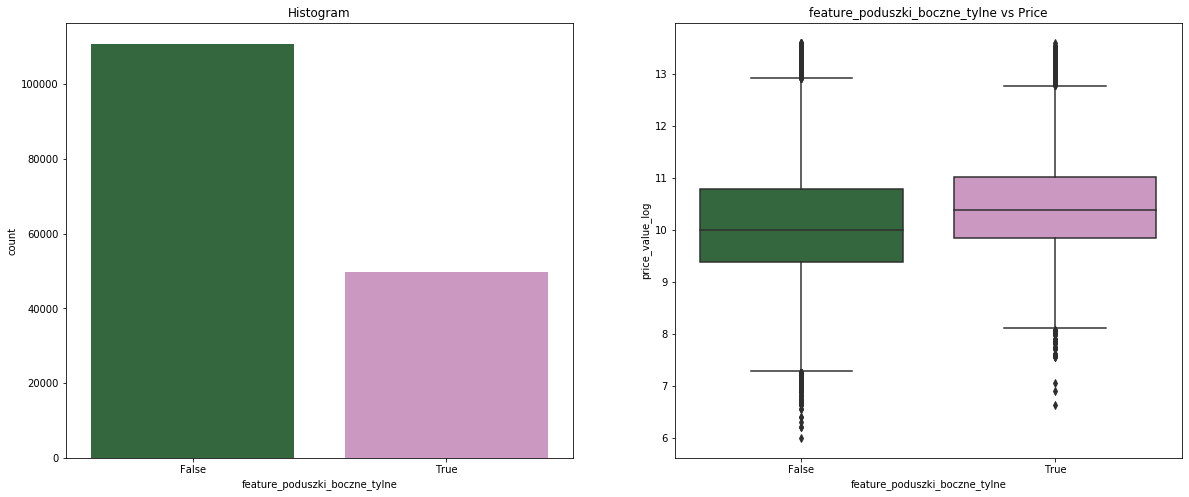

49: feature_radio_fabryczne [100.00%=160616/160616 #2]: 
True     128451
False     32165
Name: feature_radio_fabryczne, dtype: int64


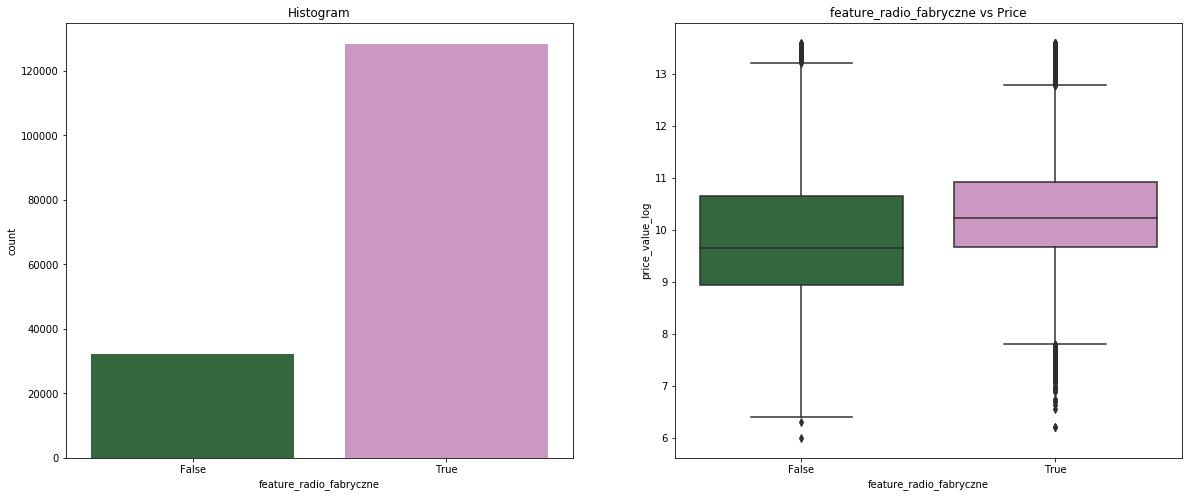

50: feature_odtwarzacz_dvd [100.00%=160616/160616 #2]: 
False    145380
True      15236
Name: feature_odtwarzacz_dvd, dtype: int64


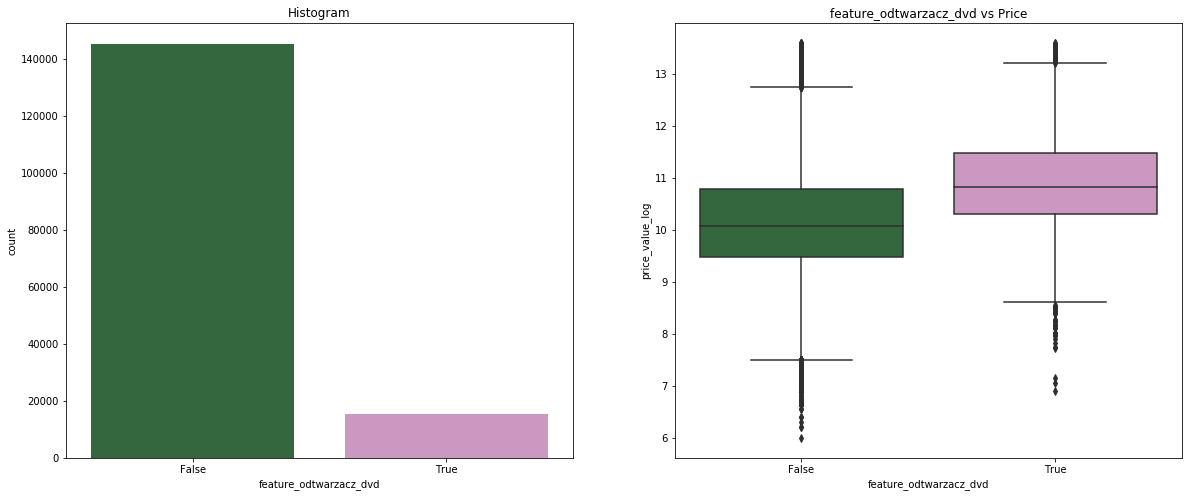

51: feature_czujniki_parkowania_tylne [100.00%=160616/160616 #2]: 
False    89890
True     70726
Name: feature_czujniki_parkowania_tylne, dtype: int64


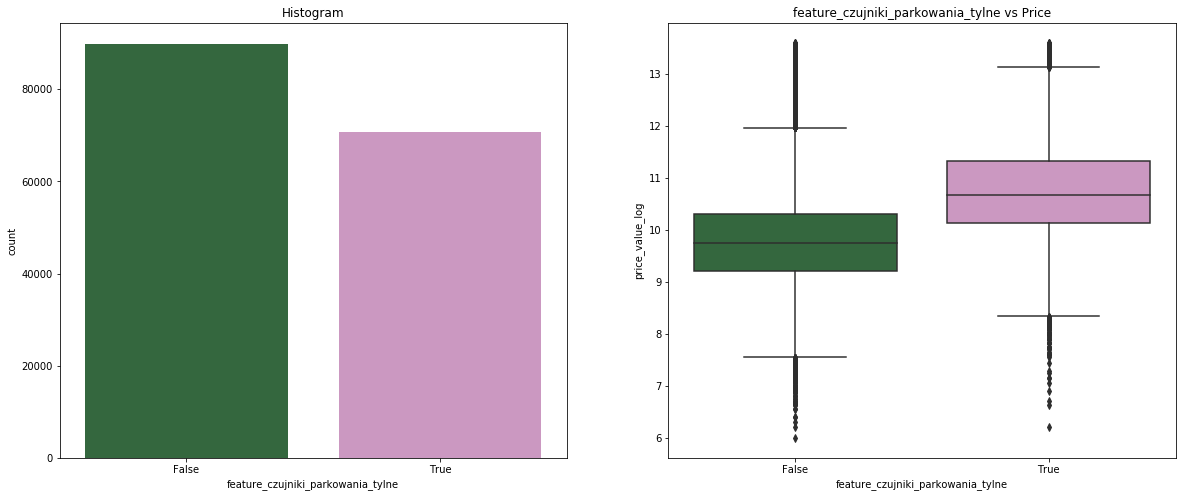

52: feature_łopatki_zmiany_biegów [100.00%=160616/160616 #2]: 
False    147894
True      12722
Name: feature_łopatki_zmiany_biegów, dtype: int64


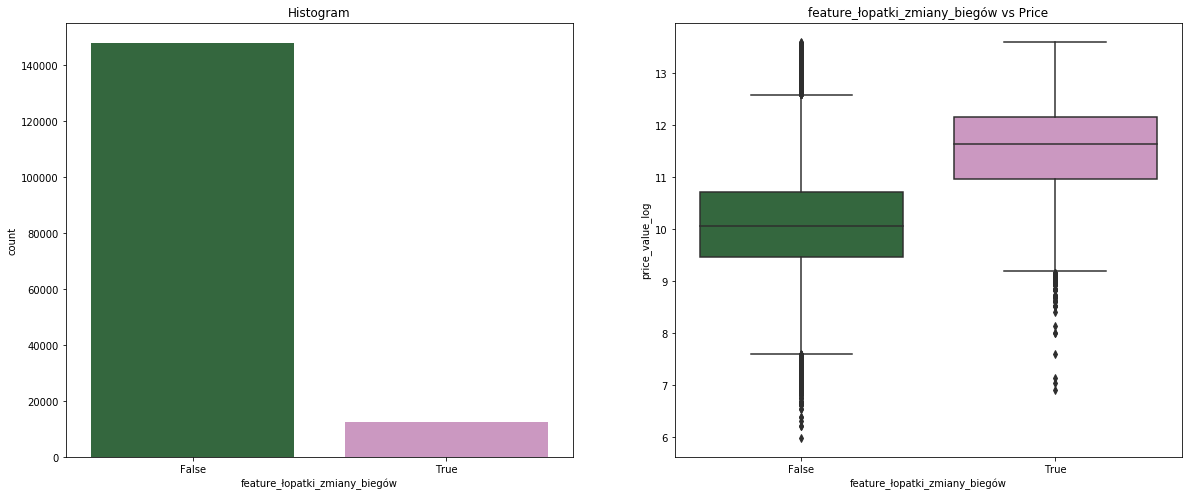

53: feature_centralny_zamek [100.00%=160616/160616 #2]: 
True     146865
False     13751
Name: feature_centralny_zamek, dtype: int64


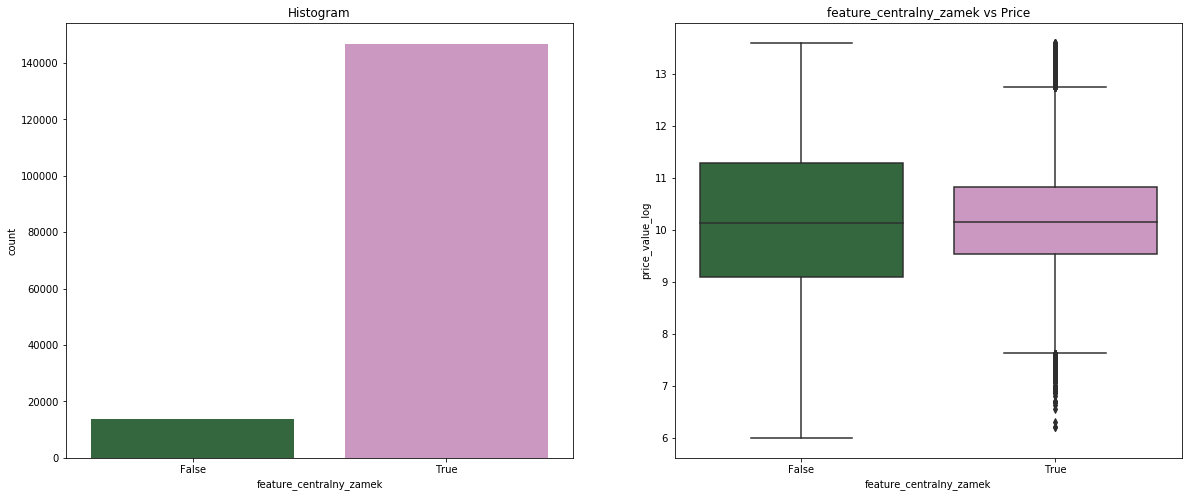

54: feature_dach_panoramiczny [100.00%=160616/160616 #2]: 
False    148217
True      12399
Name: feature_dach_panoramiczny, dtype: int64


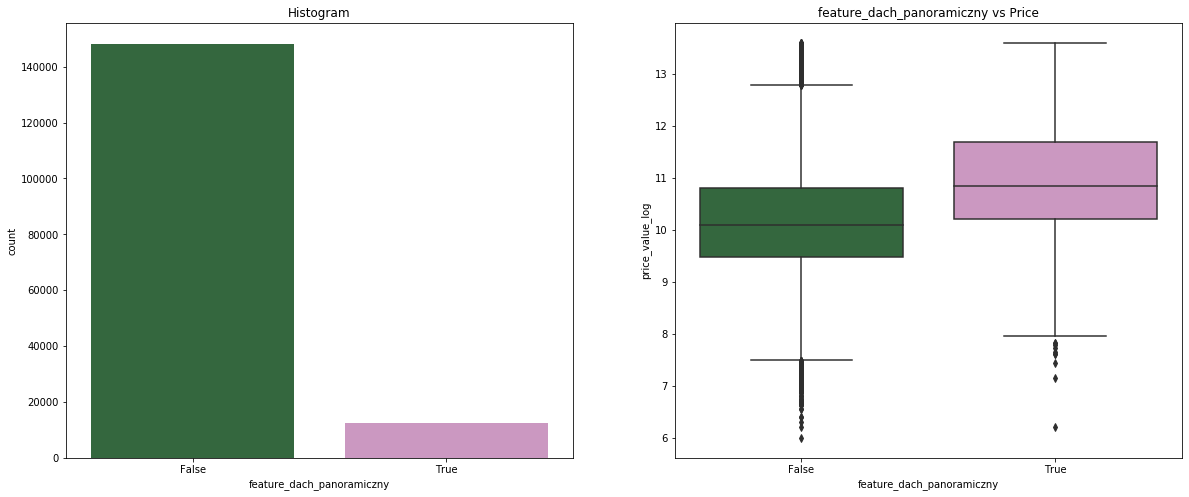

55: feature_kamera_cofania [100.00%=160616/160616 #2]: 
False    139263
True      21353
Name: feature_kamera_cofania, dtype: int64


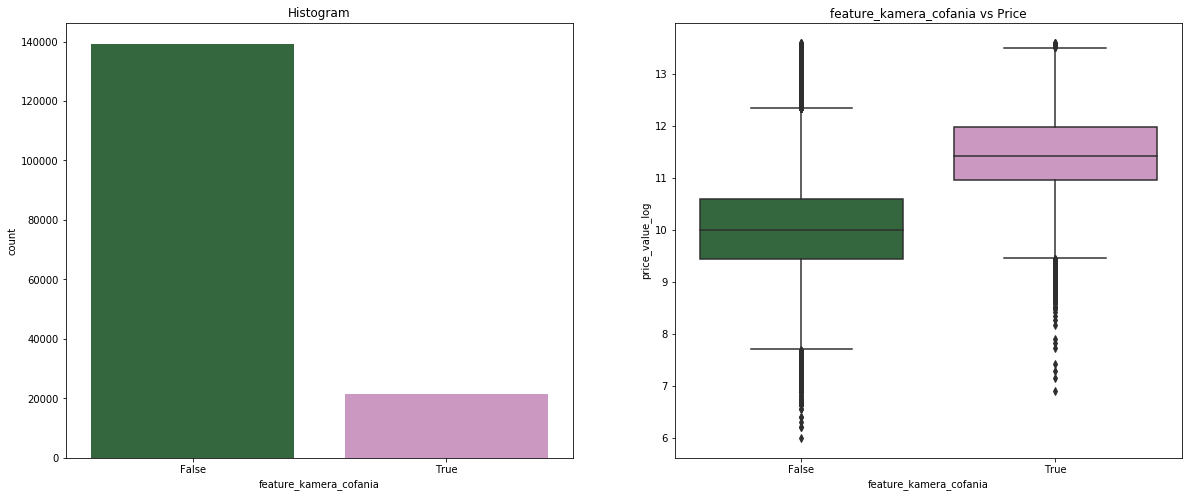

56: feature_immobilizer [100.00%=160616/160616 #2]: 
True     138994
False     21622
Name: feature_immobilizer, dtype: int64


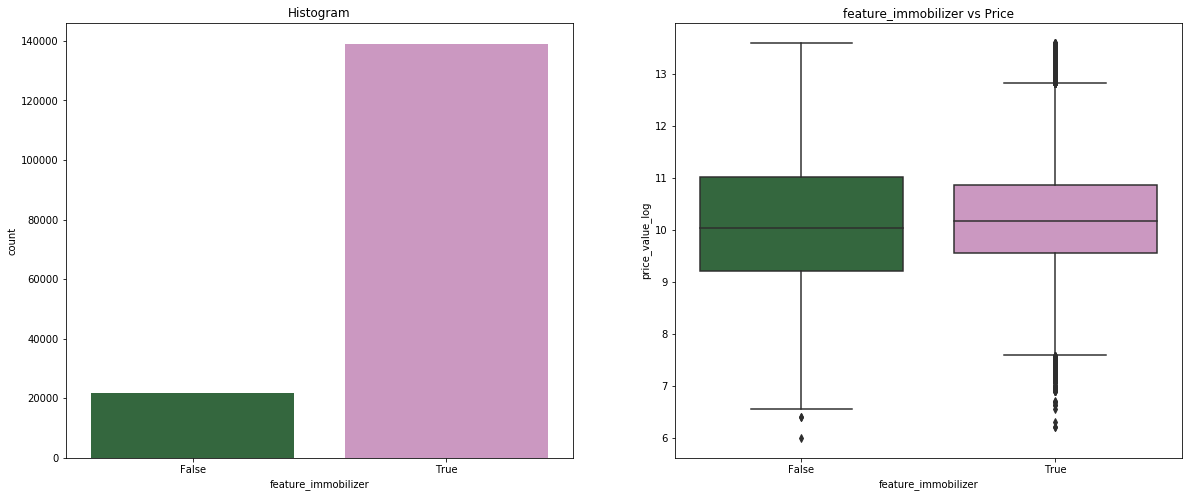

57: feature_czujnik_martwego_pola [100.00%=160616/160616 #2]: 
False    150905
True       9711
Name: feature_czujnik_martwego_pola, dtype: int64


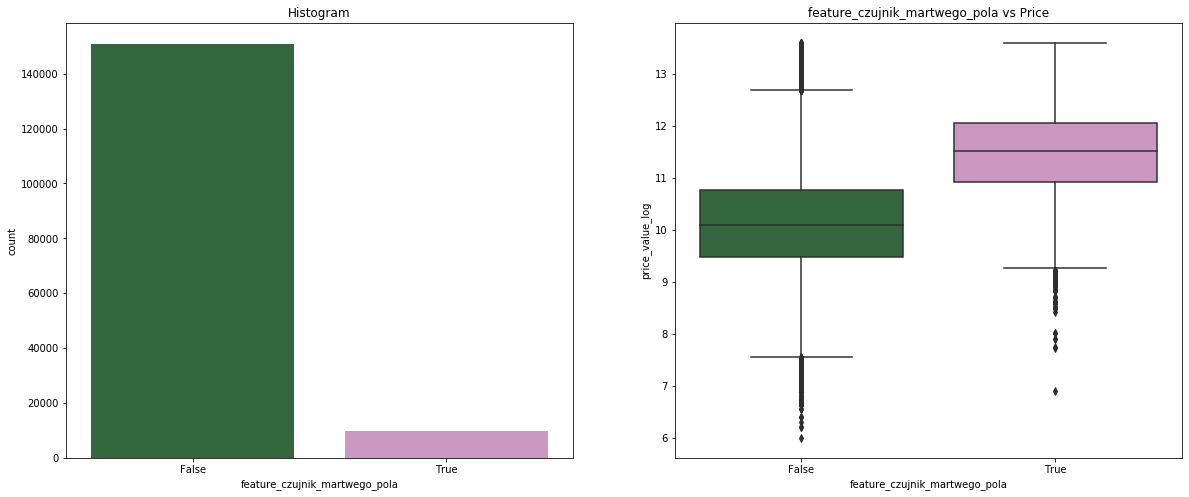

58: feature_gniazdo_sd [100.00%=160616/160616 #2]: 
False    133551
True      27065
Name: feature_gniazdo_sd, dtype: int64


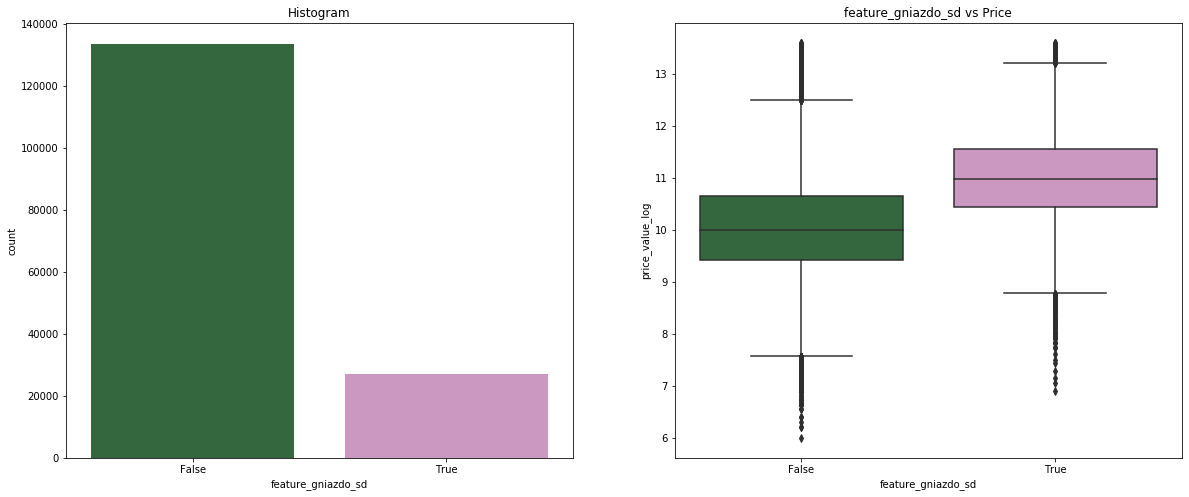

59: feature_podgrzewane_lusterka_boczne [100.00%=160616/160616 #2]: 
True     88408
False    72208
Name: feature_podgrzewane_lusterka_boczne, dtype: int64


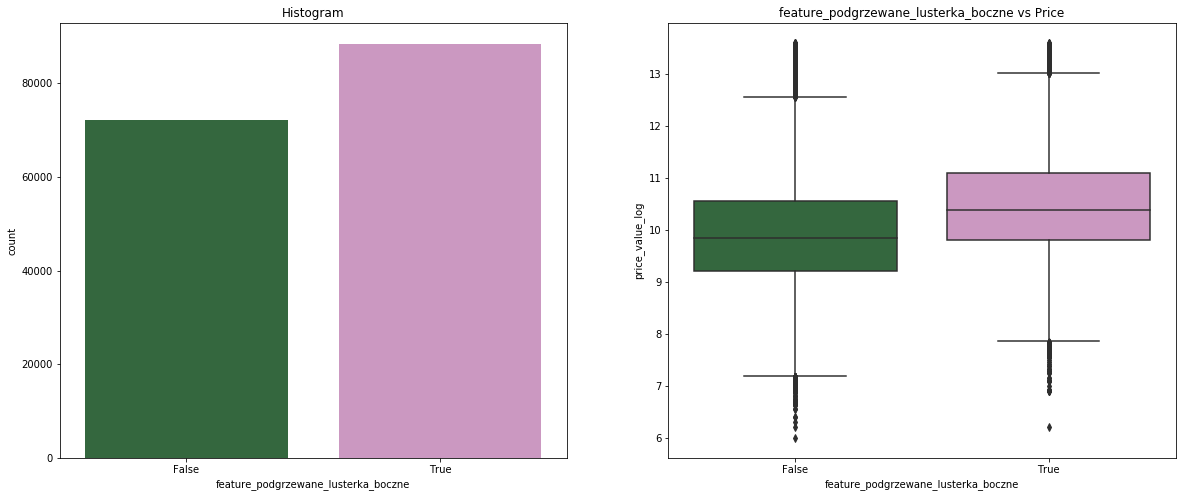

60: feature_podgrzewane_przednie_siedzenia [100.00%=160616/160616 #2]: 
False    106171
True      54445
Name: feature_podgrzewane_przednie_siedzenia, dtype: int64


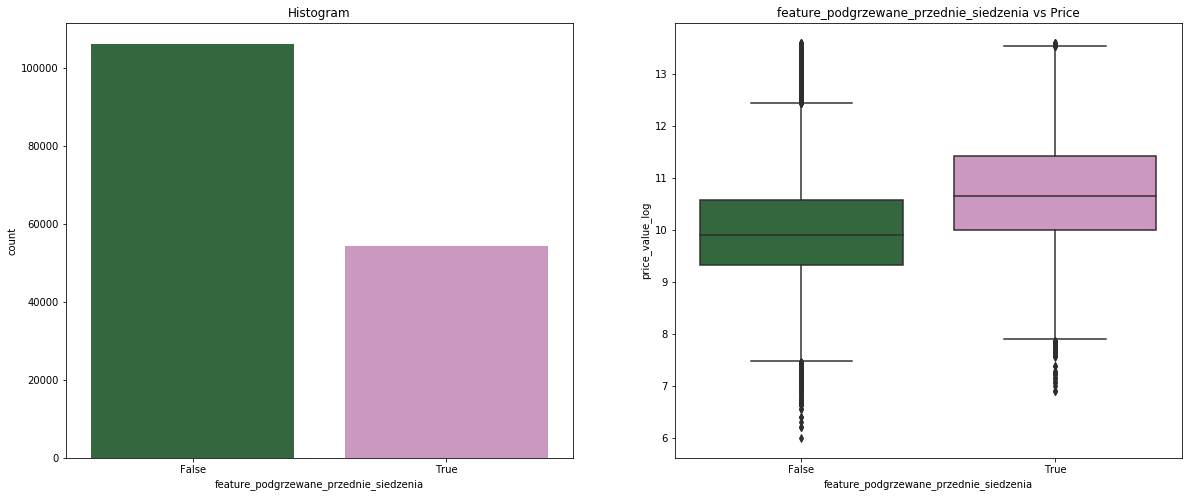

61: feature_hak [100.00%=160616/160616 #2]: 
False    137428
True      23188
Name: feature_hak, dtype: int64


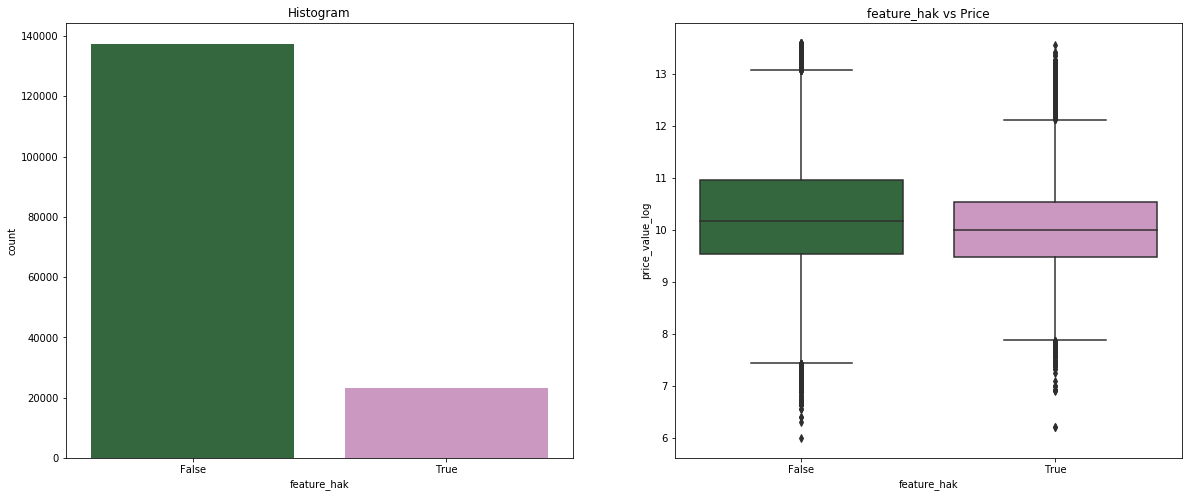

62: feature_abs [100.00%=160616/160616 #2]: 
True     147529
False     13087
Name: feature_abs, dtype: int64


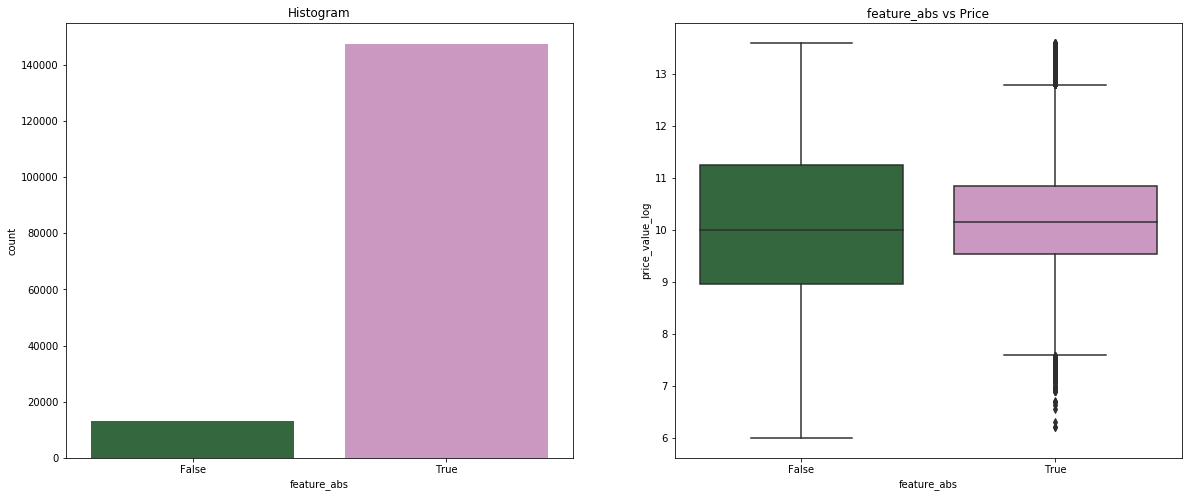

63: feature_wielofunkcyjna_kierownica [100.00%=160616/160616 #2]: 
True     95107
False    65509
Name: feature_wielofunkcyjna_kierownica, dtype: int64


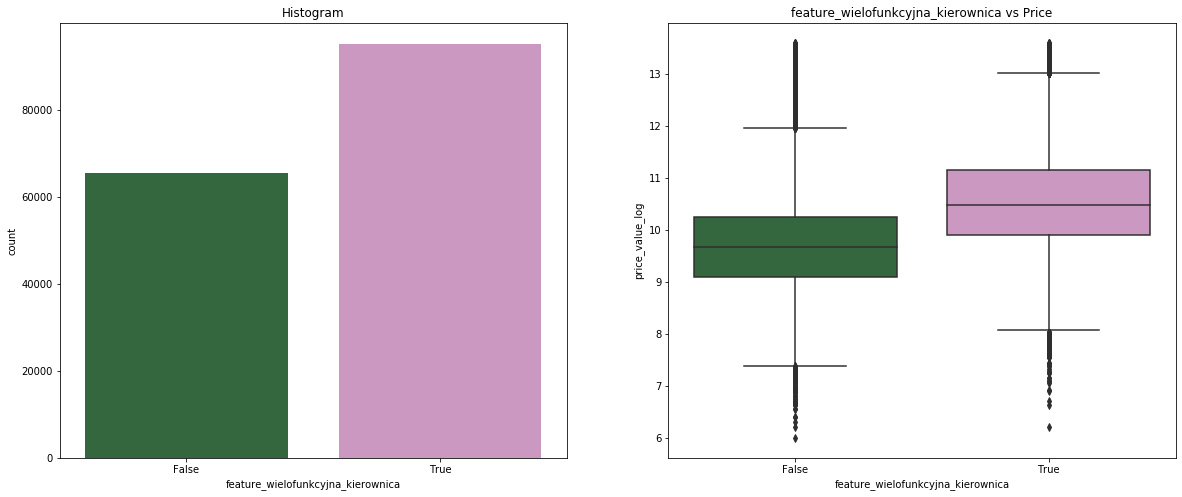

64: feature_światła_xenonowe [100.00%=160616/160616 #2]: 
False    129825
True      30791
Name: feature_światła_xenonowe, dtype: int64


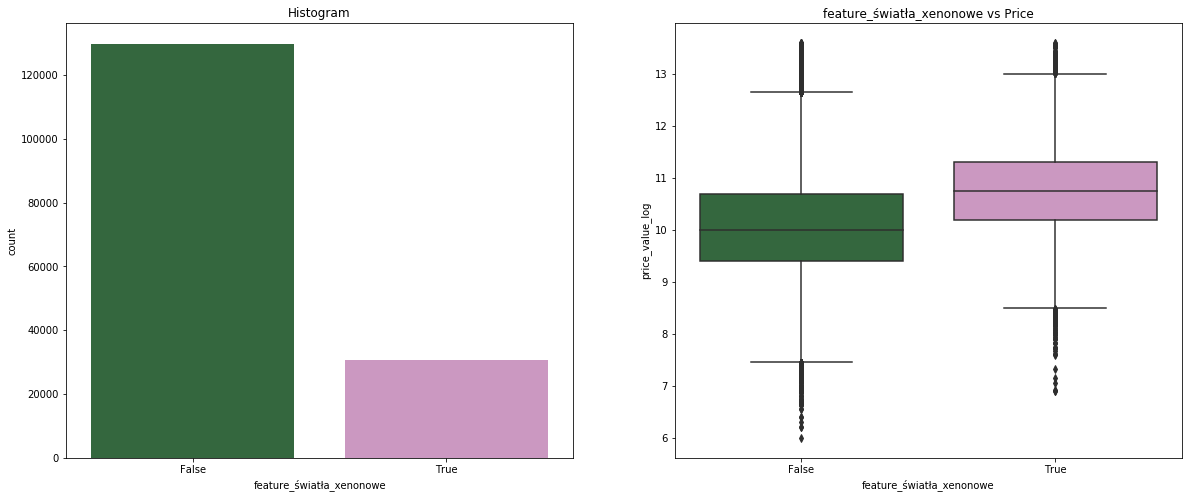

65: feature_gniazdo_usb [100.00%=160616/160616 #2]: 
False    106281
True      54335
Name: feature_gniazdo_usb, dtype: int64


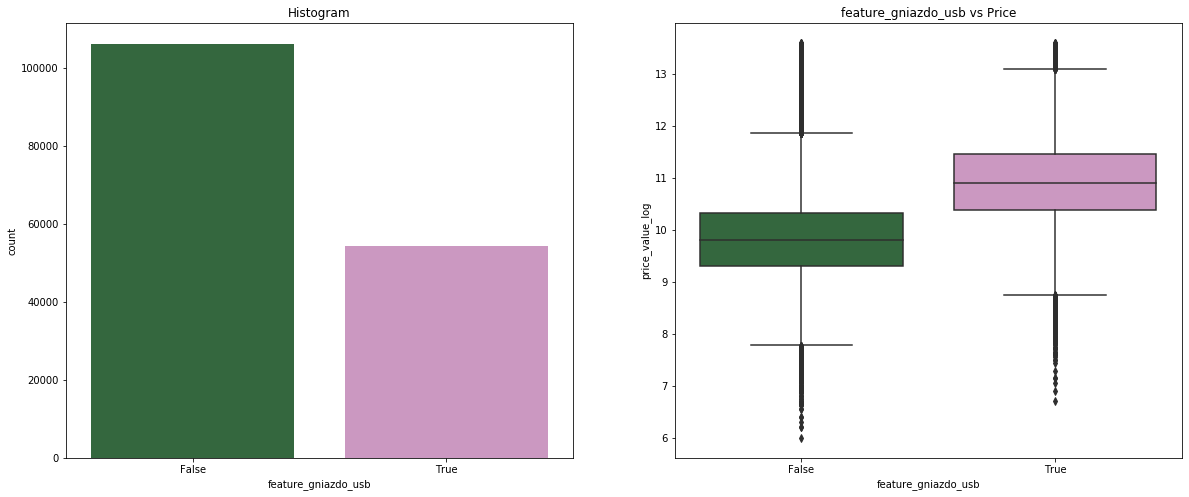

66: feature_tapicerka_skórzana [100.00%=160616/160616 #2]: 
False    122554
True      38062
Name: feature_tapicerka_skórzana, dtype: int64


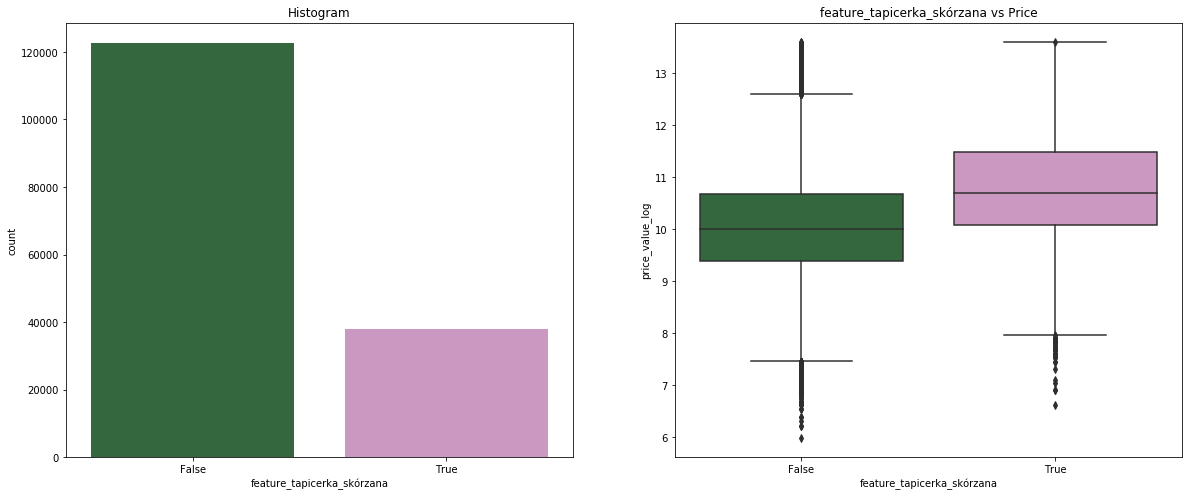

67: feature_gniazdo_aux [100.00%=160616/160616 #2]: 
False    94402
True     66214
Name: feature_gniazdo_aux, dtype: int64


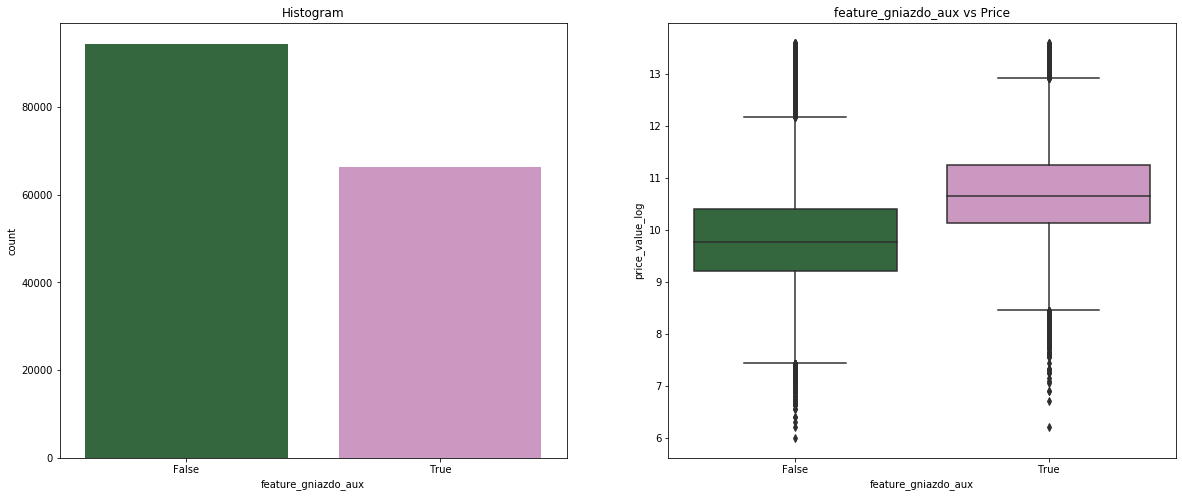

68: feature_esp__stabilizacja_toru_jazdy_ [100.00%=160616/160616 #2]: 
True     103332
False     57284
Name: feature_esp__stabilizacja_toru_jazdy_, dtype: int64


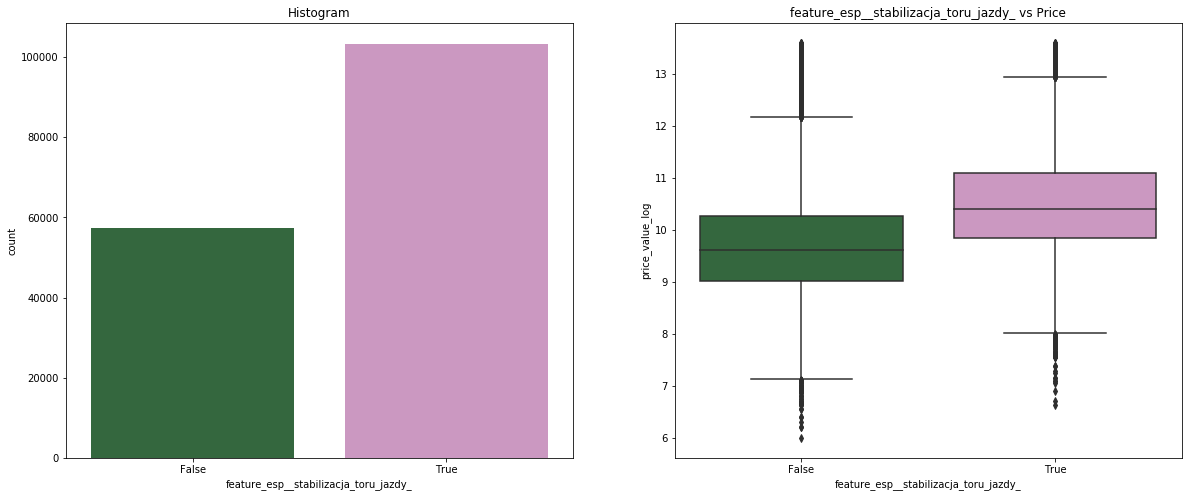

69: feature_alarm [100.00%=160616/160616 #2]: 
True     83853
False    76763
Name: feature_alarm, dtype: int64


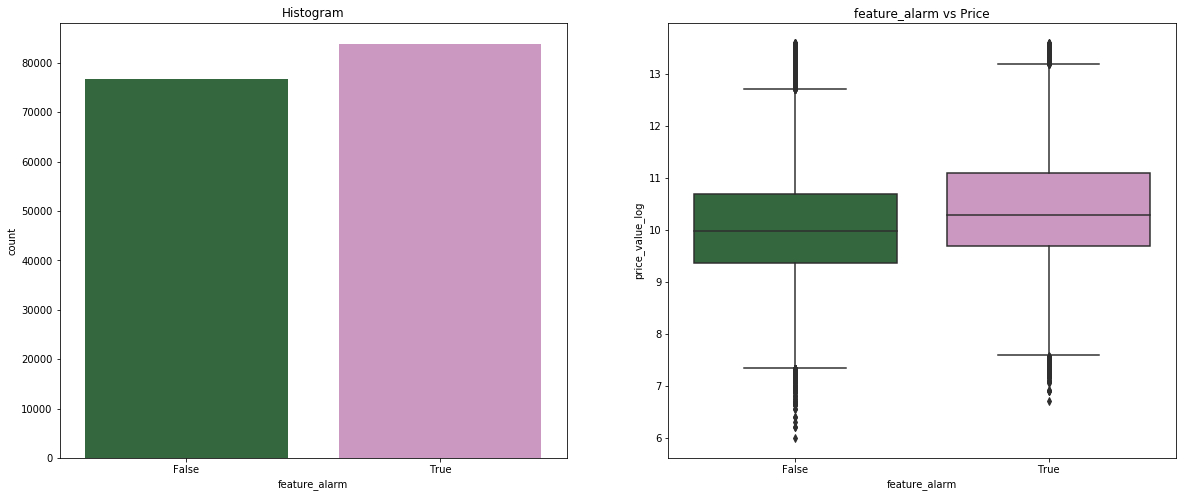

70: feature_podgrzewane_tylne_siedzenia [100.00%=160616/160616 #2]: 
False    155238
True       5378
Name: feature_podgrzewane_tylne_siedzenia, dtype: int64


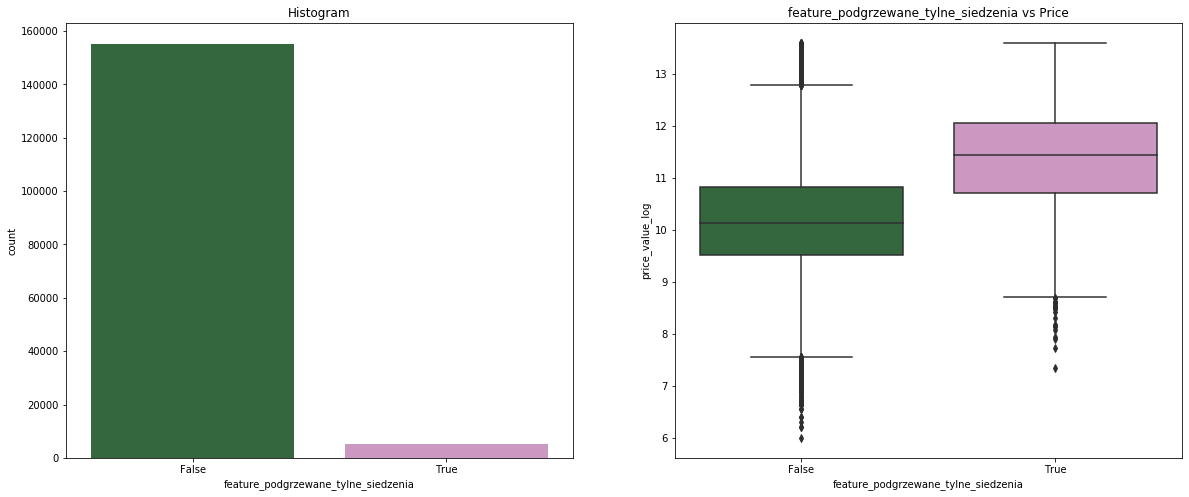

71: feature_mp3 [100.00%=160616/160616 #2]: 
False    90434
True     70182
Name: feature_mp3, dtype: int64


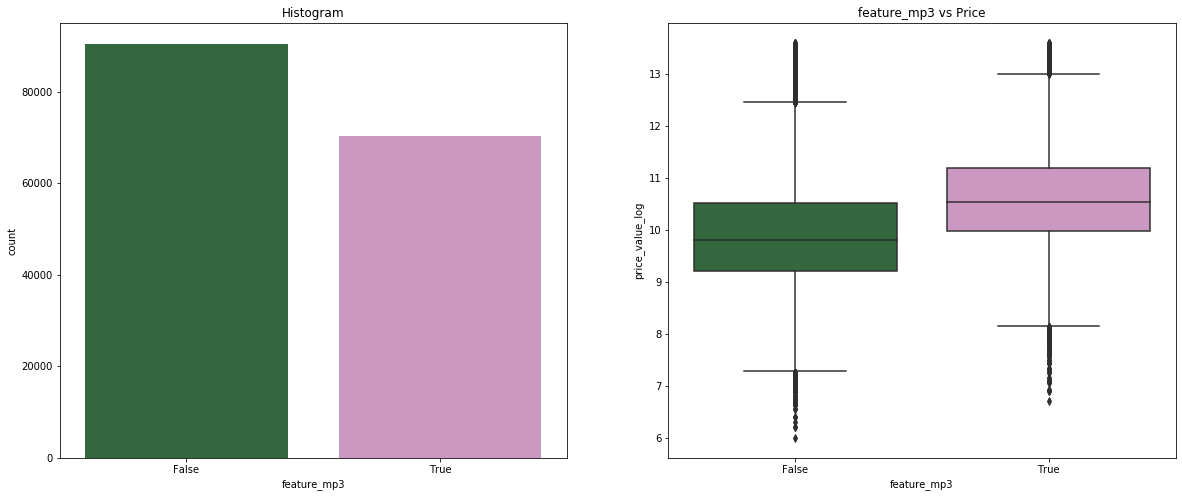

72: feature_tempomat [100.00%=160616/160616 #2]: 
True     84360
False    76256
Name: feature_tempomat, dtype: int64


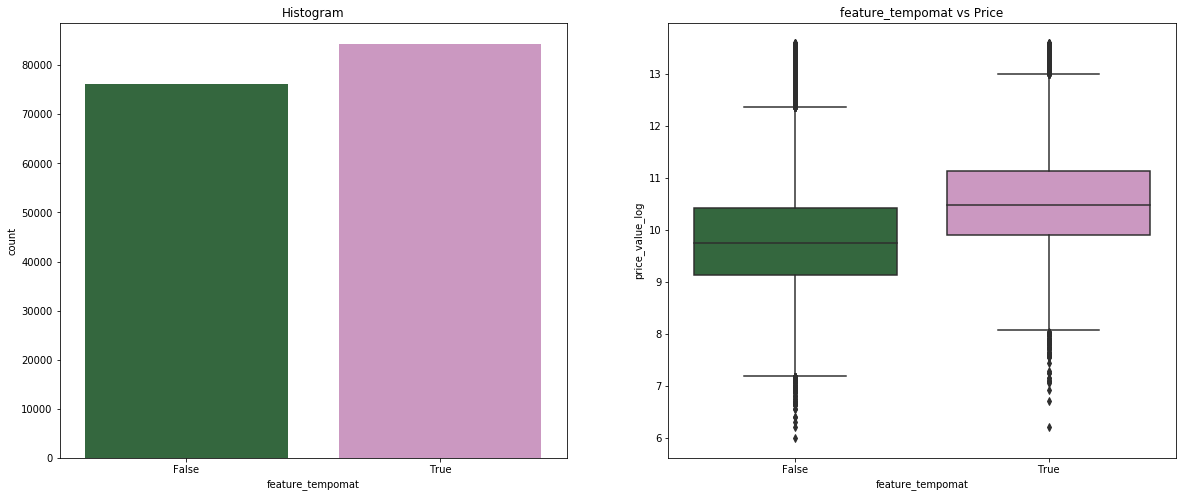

73: feature_hud__wyświetlacz_przezierny_ [100.00%=160616/160616 #2]: 
False    156727
True       3889
Name: feature_hud__wyświetlacz_przezierny_, dtype: int64


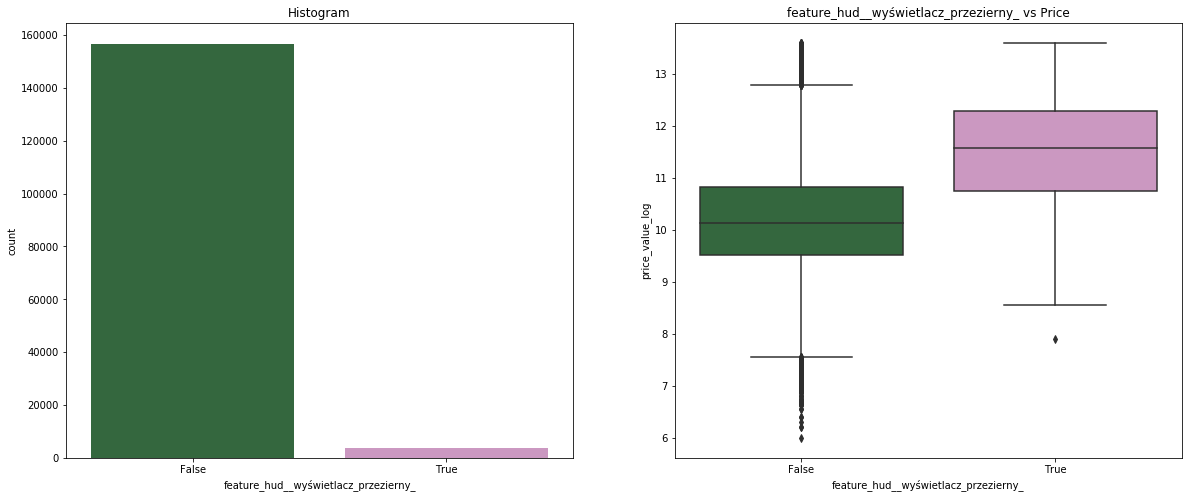

74: feature_elektrochromatyczne_lusterko_wsteczne [100.00%=160616/160616 #2]: 
False    101598
True      59018
Name: feature_elektrochromatyczne_lusterko_wsteczne, dtype: int64


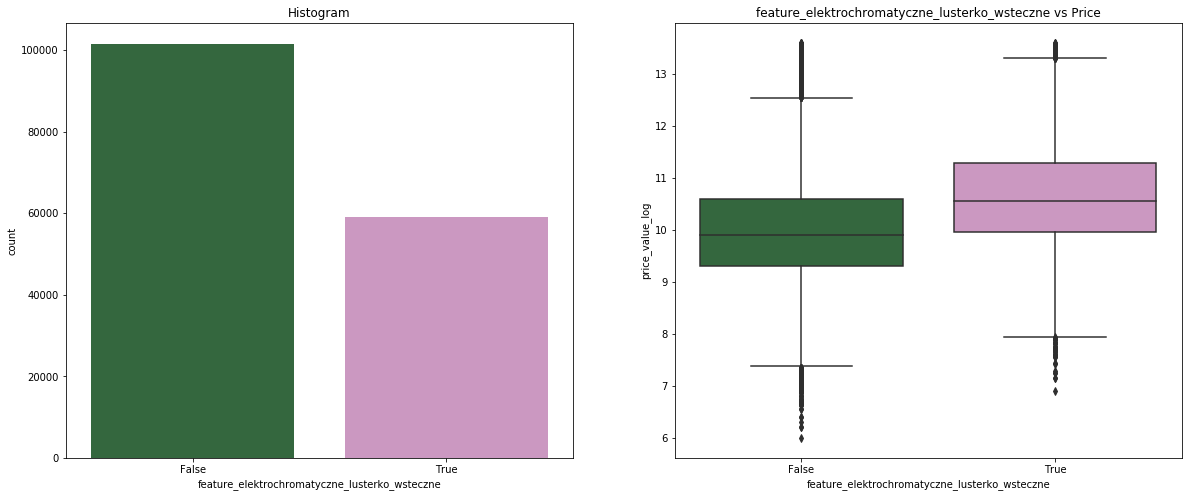

75: feature_relingi_dachowe [100.00%=160616/160616 #2]: 
False    117682
True      42934
Name: feature_relingi_dachowe, dtype: int64


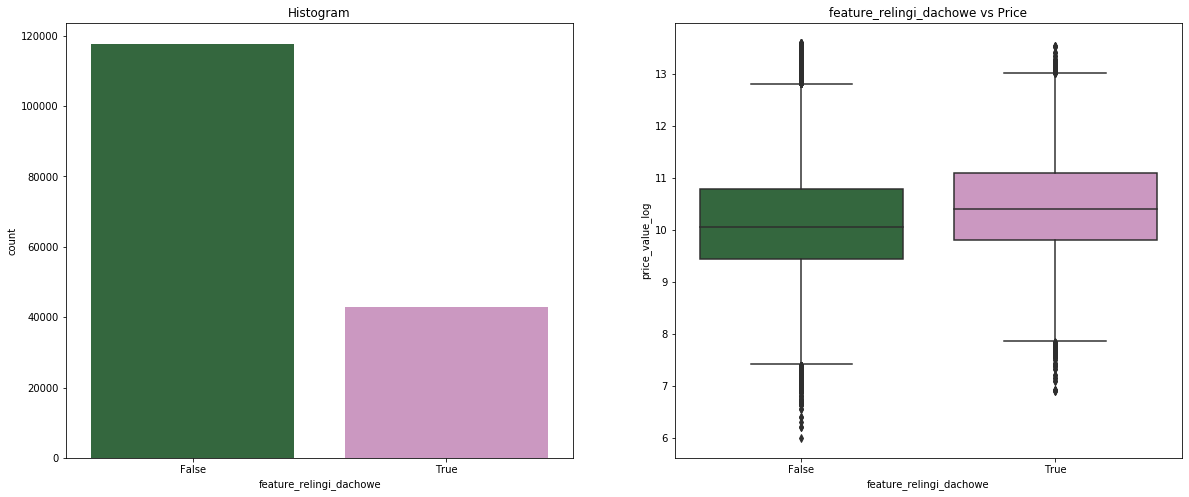

76: feature_elektrochromatyczne_lusterka_boczne [100.00%=160616/160616 #2]: 
False    120557
True      40059
Name: feature_elektrochromatyczne_lusterka_boczne, dtype: int64


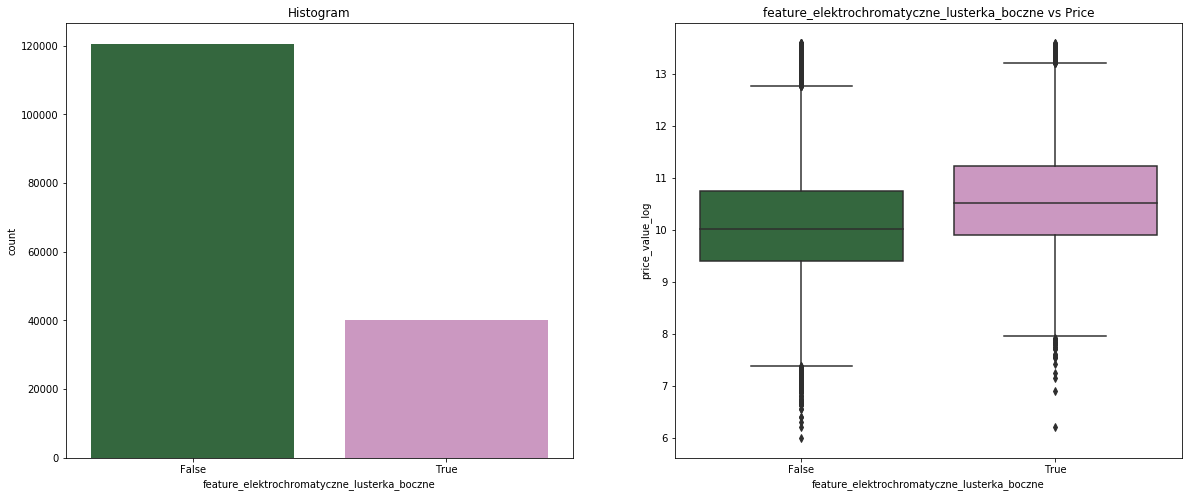

77: param_faktura_vat [100.00%=160616/160616 #2]: 
False    120849
True      39767
Name: param_faktura_vat, dtype: int64


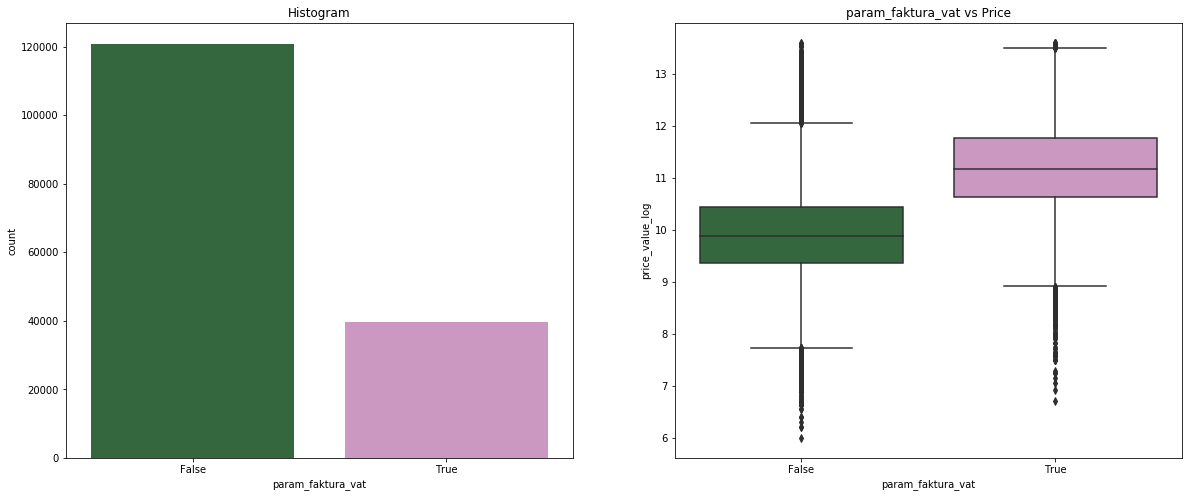

79: param_homologacja_ciężarowa [100.00%=160616/160616 #2]: 
False    159460
True       1156
Name: param_homologacja_ciężarowa, dtype: int64


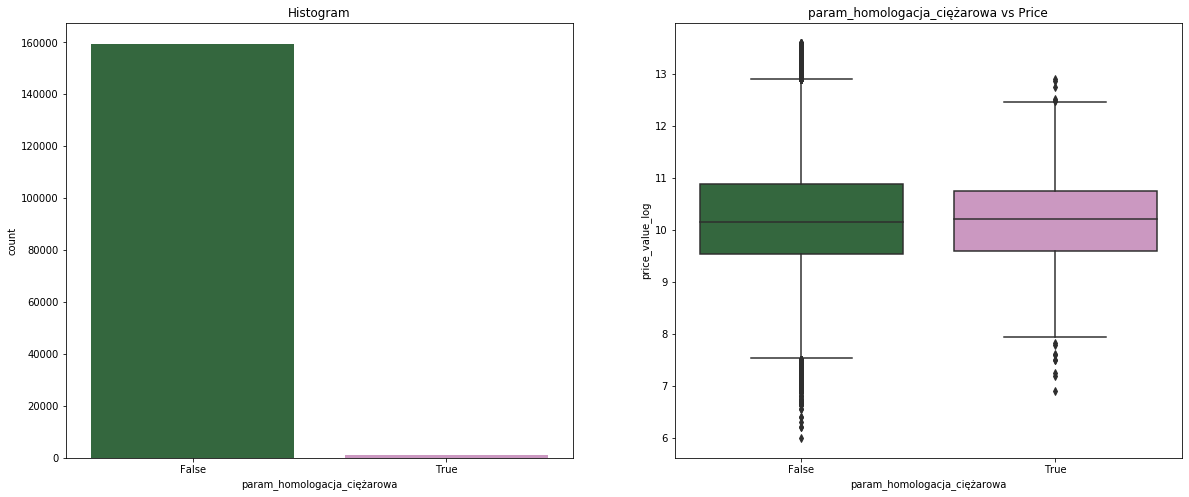

80: param_vat_marża [100.00%=160616/160616 #2]: 
False    106029
True      54587
Name: param_vat_marża, dtype: int64


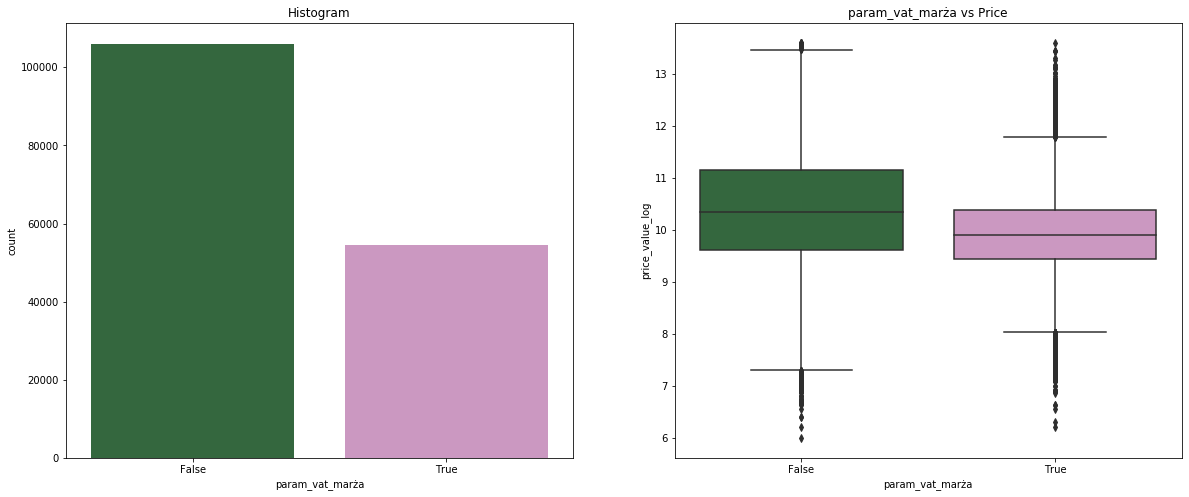

82: param_zarejestrowany_jako_zabytek [100.00%=160616/160616 #2]: 
False    160490
True        126
Name: param_zarejestrowany_jako_zabytek, dtype: int64


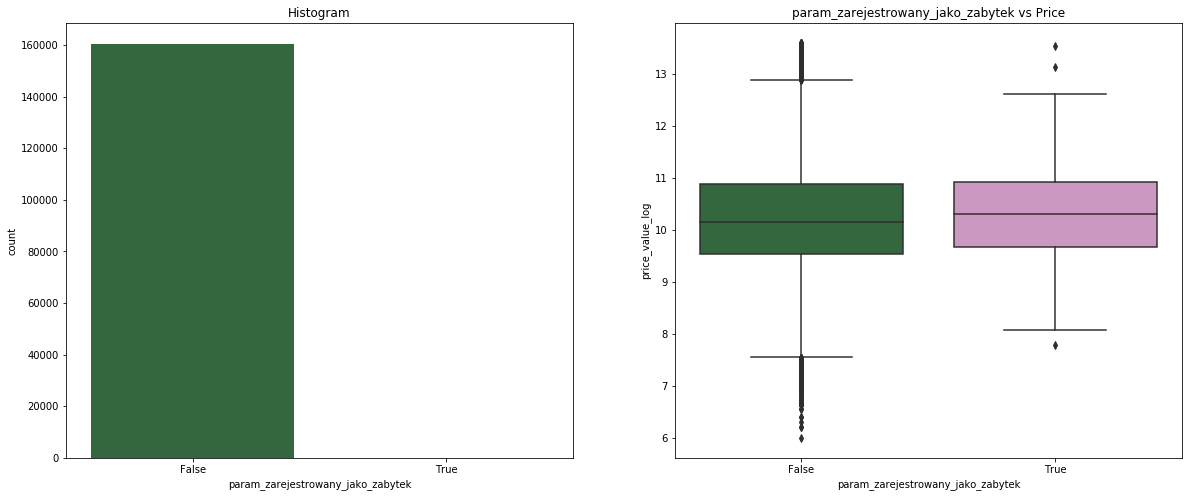

84: param_vat_discount [100.00%=160616/160616 #2]: 
False    160574
True         42
Name: param_vat_discount, dtype: int64


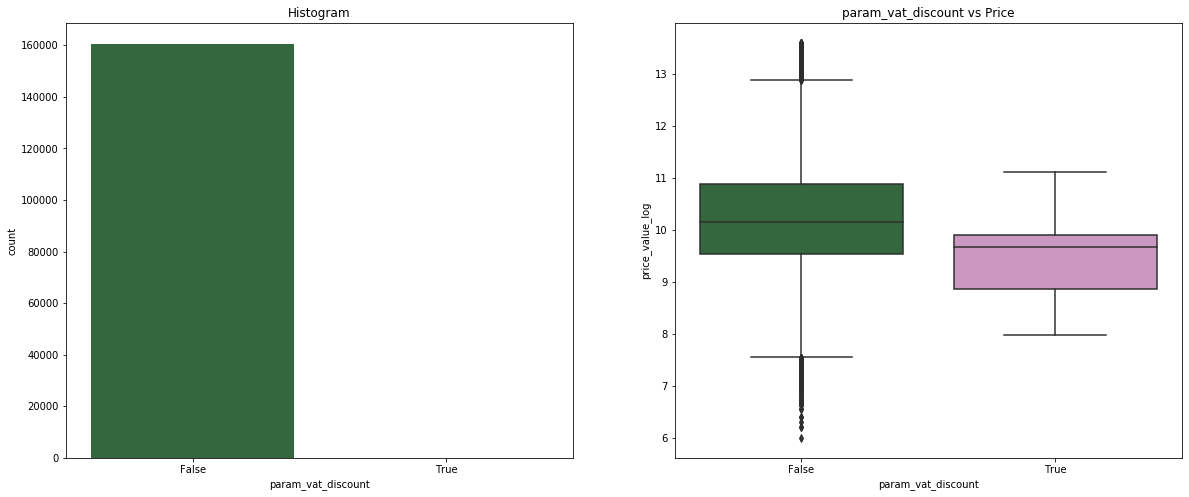

88: param_kierownica_po_prawej__anglik_ [100.00%=160616/160616 #2]: 
False    159453
True       1163
Name: param_kierownica_po_prawej__anglik_, dtype: int64


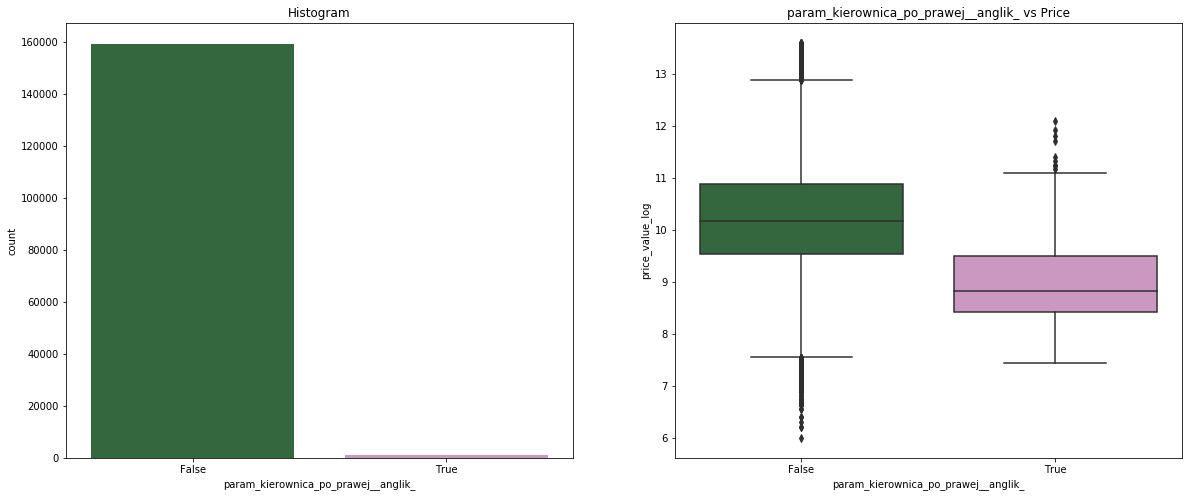

89: param_vat_free [100.00%=160616/160616 #2]: 
False    160584
True         32
Name: param_vat_free, dtype: int64


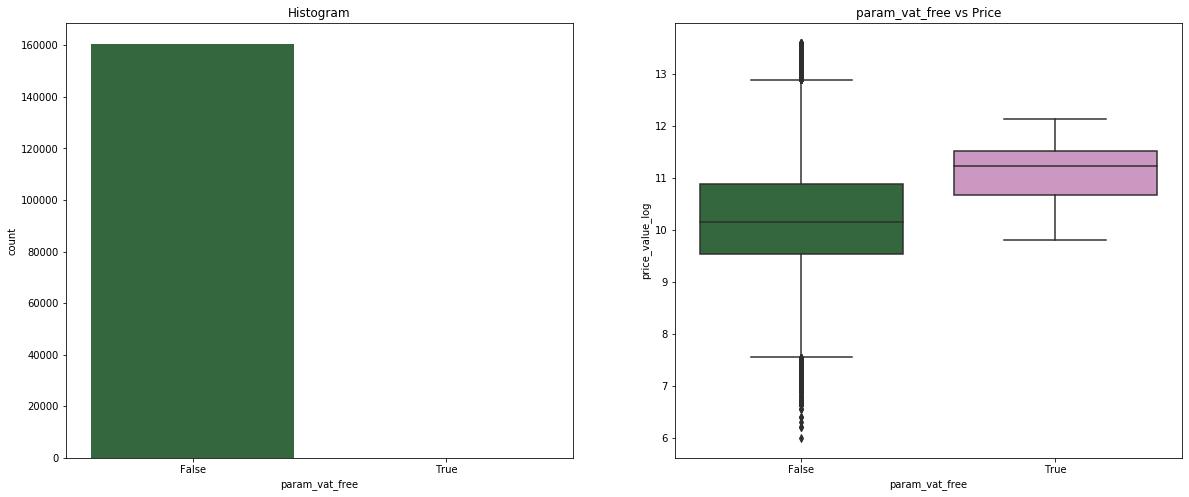

90: param_tuning [100.00%=160616/160616 #2]: 
False    159742
True        874
Name: param_tuning, dtype: int64


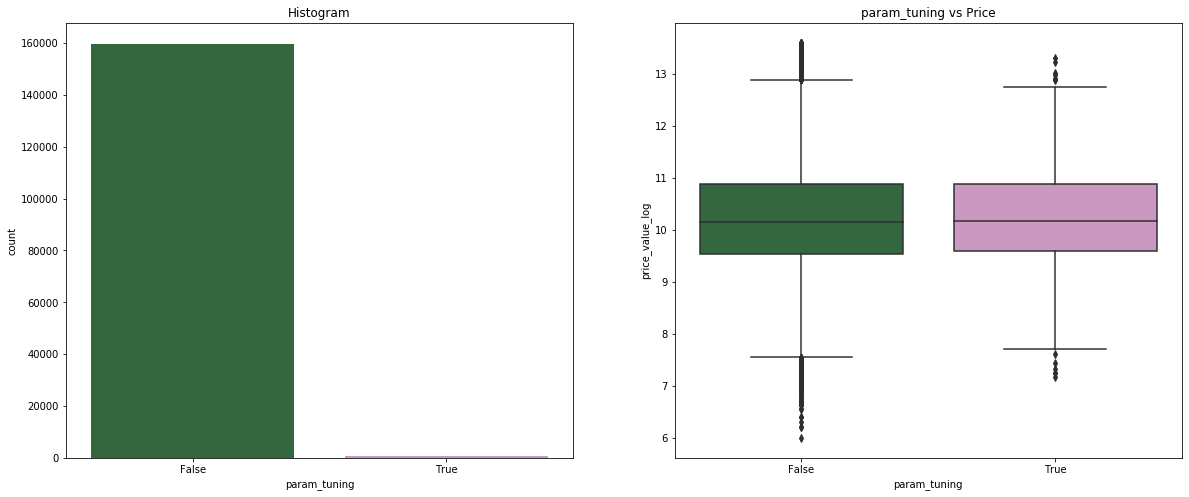

92: param_matowy [100.00%=160616/160616 #2]: 
False    160122
True        494
Name: param_matowy, dtype: int64


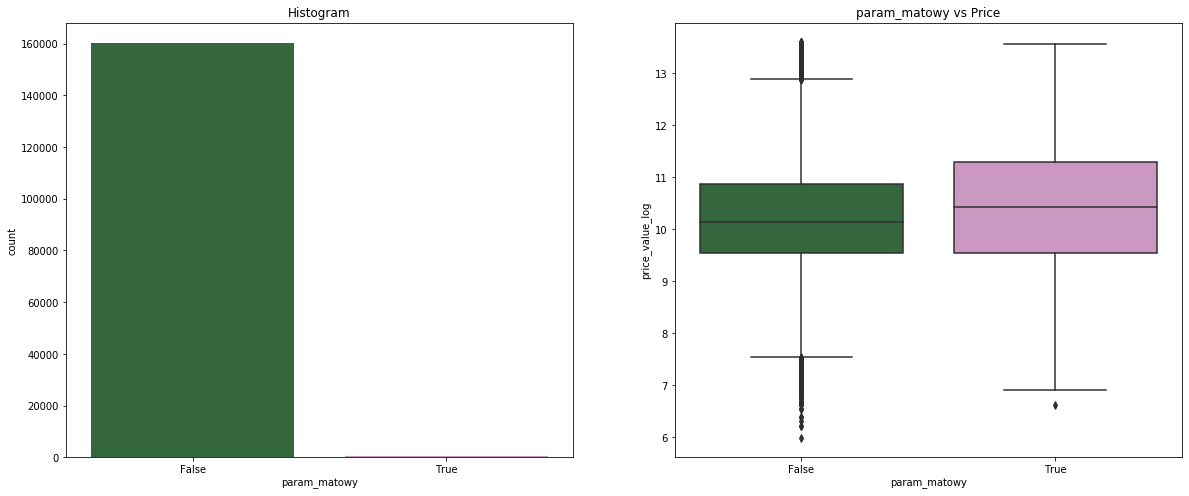

94: created_at_unix [100.00%=160616/160616 #11960]: 
95: created_at_unix_na_mean [100.00%=160616/160616 #11960]: 
96: pln_to_eur [100.00%=160616/160616 #11]: 
4.1943    123936
4.2207     30795
4.1878      5456
4.1737       202
4.1585       198
4.1836        16
4.1688         5
4.1729         4
4.1767         2
4.1714         1
4.1504         1
Name: pln_to_eur, dtype: int64


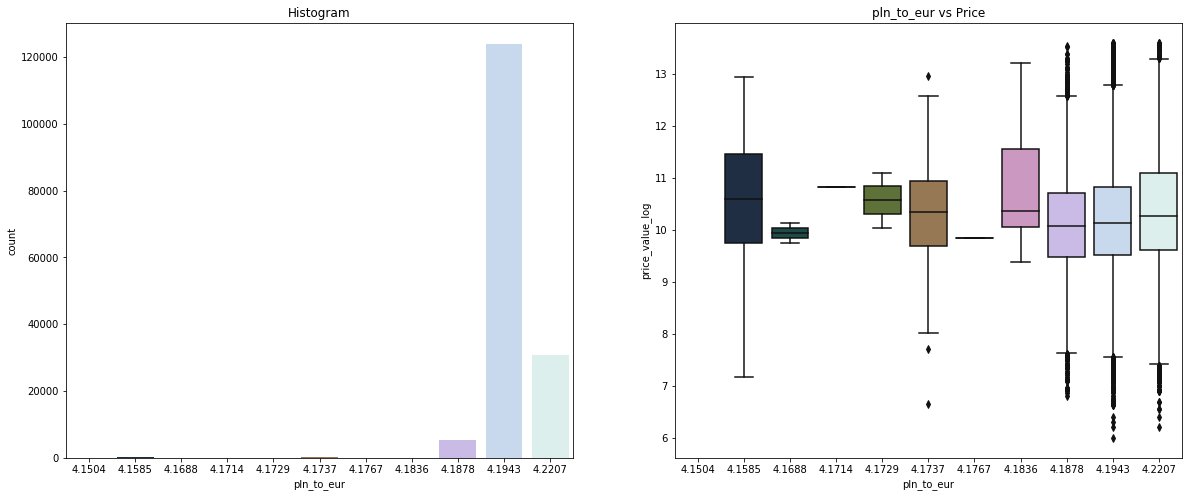

97: price_value_pln [66.30%=106494/160616 #7968]: 
98: price_value_pln_log_transl [66.30%=106494/160616 #7968]: 
99: latitude [100.00%=160616/160616 #12727]: 
100: latitude_na_mean [100.00%=160616/160616 #12727]: 
101: longitude [100.00%=160616/160616 #12658]: 
102: longitude_na_mean [100.00%=160616/160616 #12658]: 
103: param_liczba_miejsc [88.83%=142672/160616 #9]: 
5.0    123298
7.0      8121
4.0      7025
2.0      1711
9.0      1059
6.0       572
8.0       504
3.0       378
1.0         4
Name: param_liczba_miejsc, dtype: int64


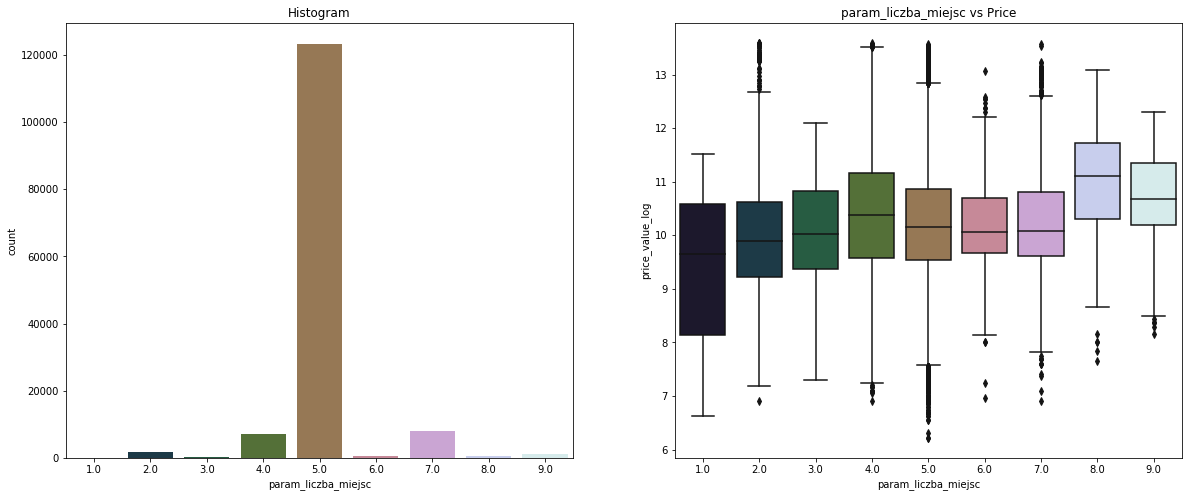

107: param_liczba_drzwi [100.00%=160616/160616 #10]: 
 5.0    107802
 4.0     22907
-1.0     14811
 3.0     11029
 2.0      3887
 6.0       147
 7.0        18
 8.0         6
 1.0         5
 9.0         4
Name: param_liczba_drzwi, dtype: int64


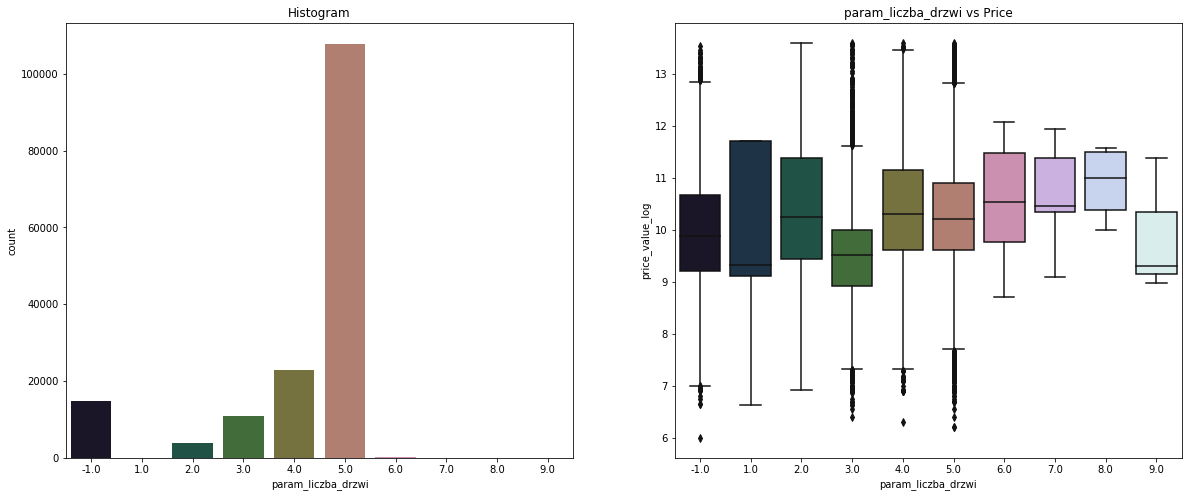

111: param_serwisowany_w_aso [100.00%=160616/160616 #2]: 
False    81506
True     79110
Name: param_serwisowany_w_aso, dtype: int64


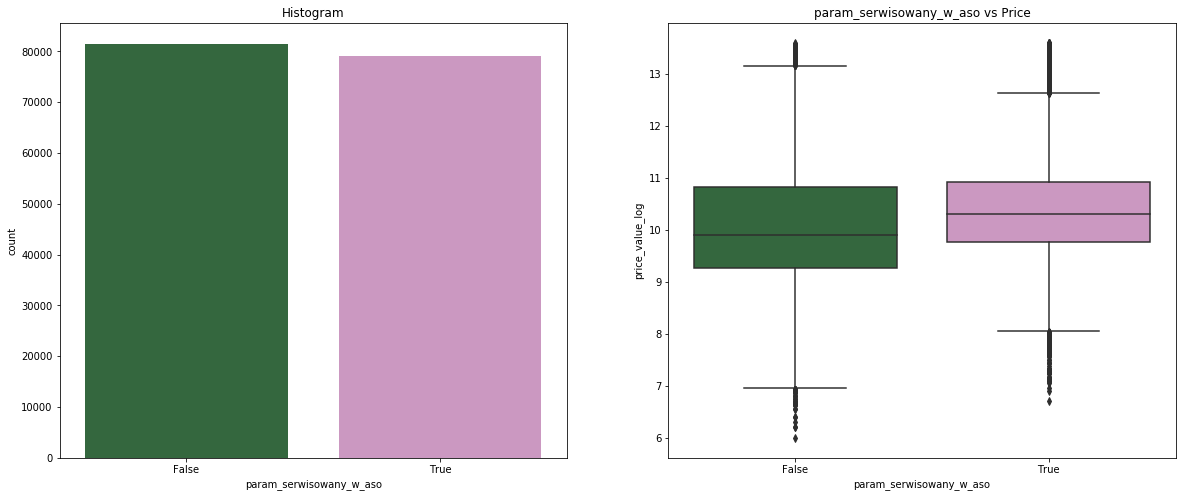

113: param_pierwszy_właściciel [100.00%=160616/160616 #2]: 
False    89507
True     71109
Name: param_pierwszy_właściciel, dtype: int64


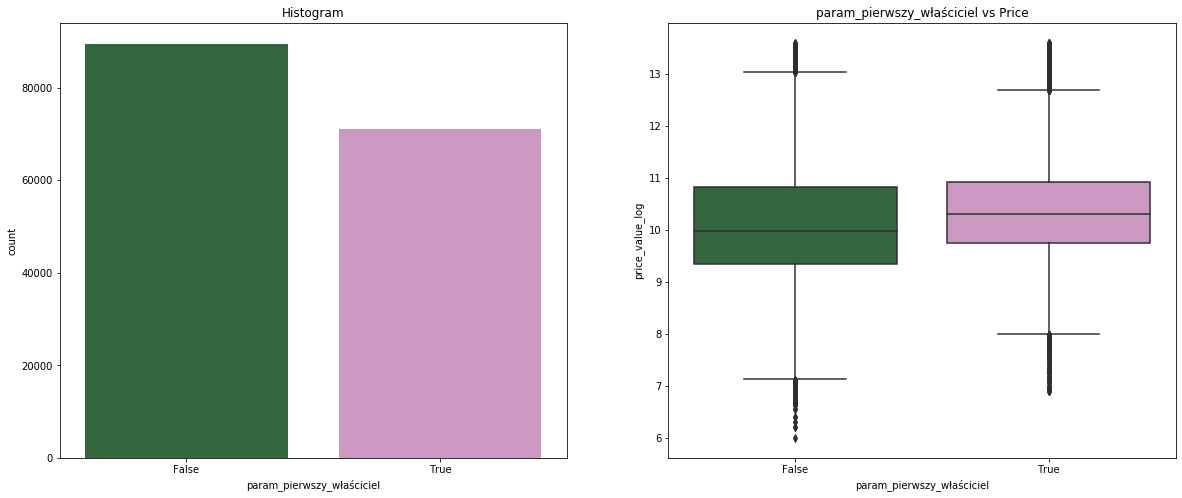

114: param_bezwypadkowy [100.00%=160616/160616 #2]: 
True     100702
False     59914
Name: param_bezwypadkowy, dtype: int64


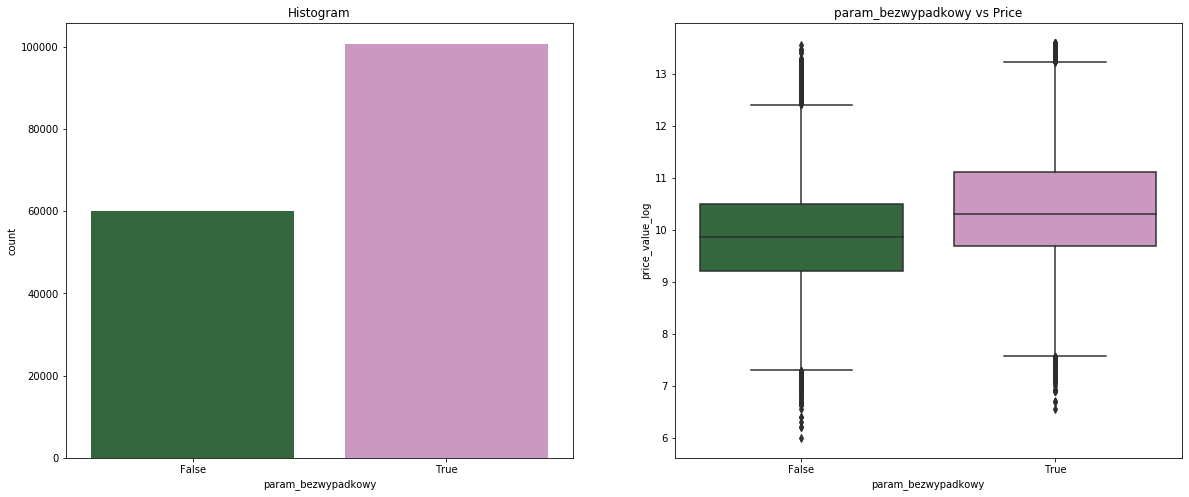

115: param_zarejestrowany_w_polsce [100.00%=160616/160616 #2]: 
False    86542
True     74074
Name: param_zarejestrowany_w_polsce, dtype: int64


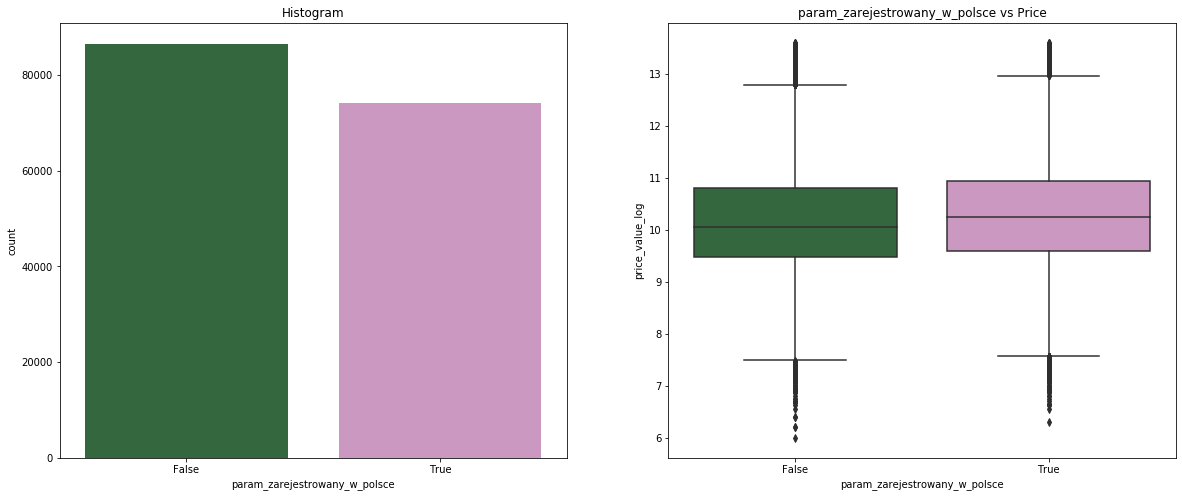

123: param_filtr_cząstek_stałych [100.00%=160616/160616 #2]: 
False    151182
True       9434
Name: param_filtr_cząstek_stałych, dtype: int64


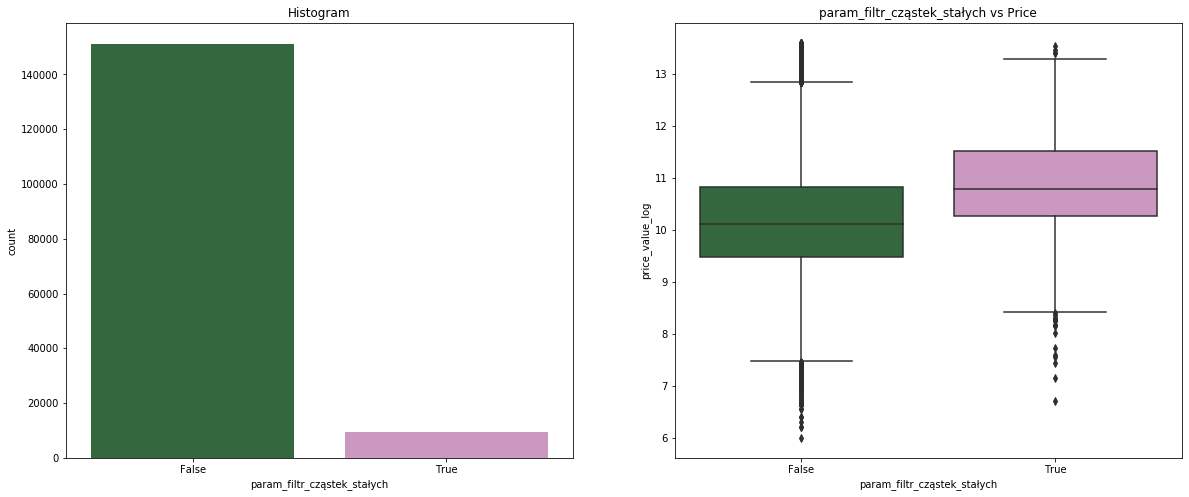

124: param_uszkodzony [100.00%=160616/160616 #2]: 
False    154226
True       6390
Name: param_uszkodzony, dtype: int64


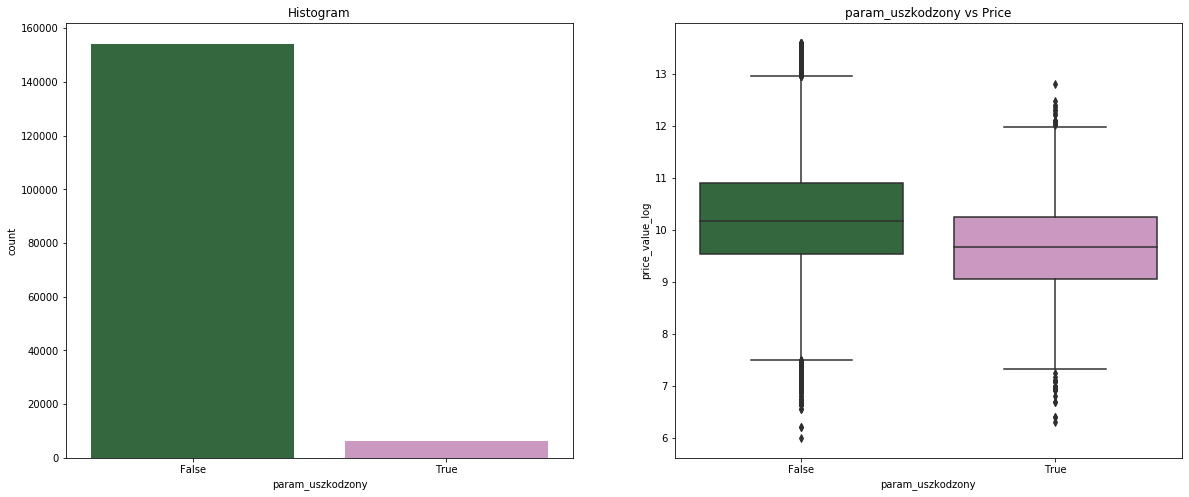

126: param_perłowy [100.00%=160616/160616 #2]: 
False    143159
True      17457
Name: param_perłowy, dtype: int64


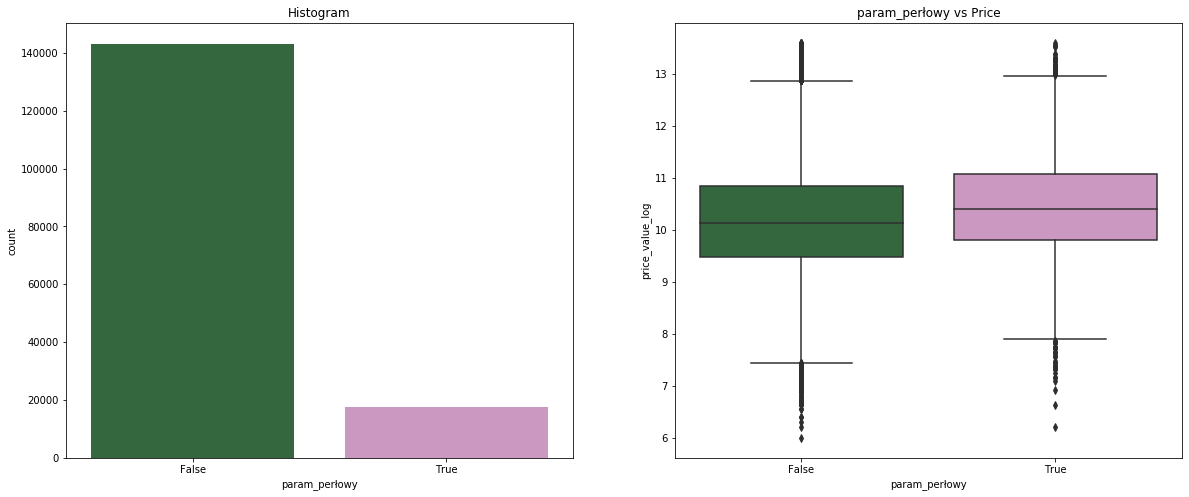

127: param_metalik [100.00%=160616/160616 #2]: 
True     109515
False     51101
Name: param_metalik, dtype: int64


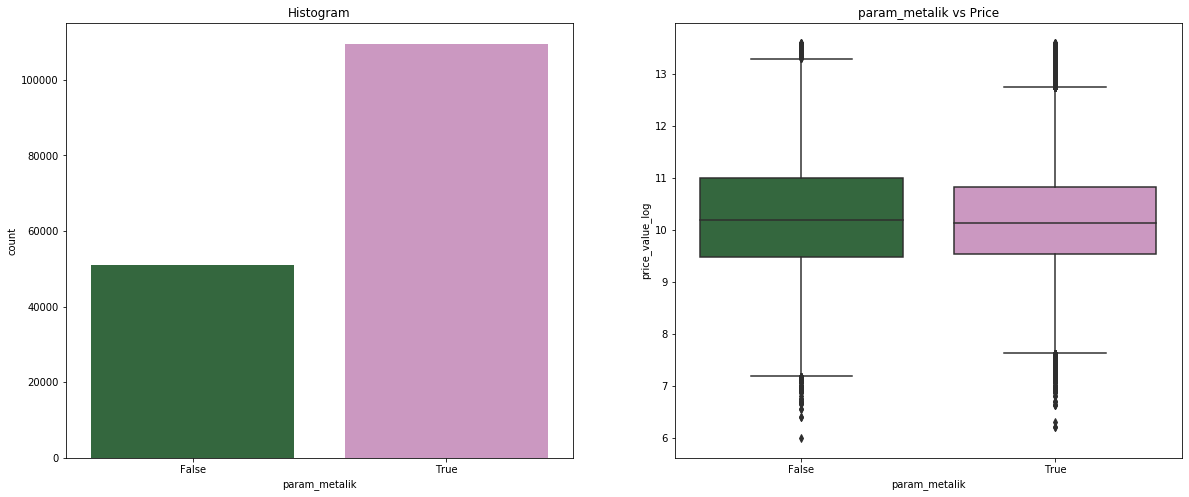

128: param_leasing [100.00%=160616/160616 #2]: 
False    143283
True      17333
Name: param_leasing, dtype: int64


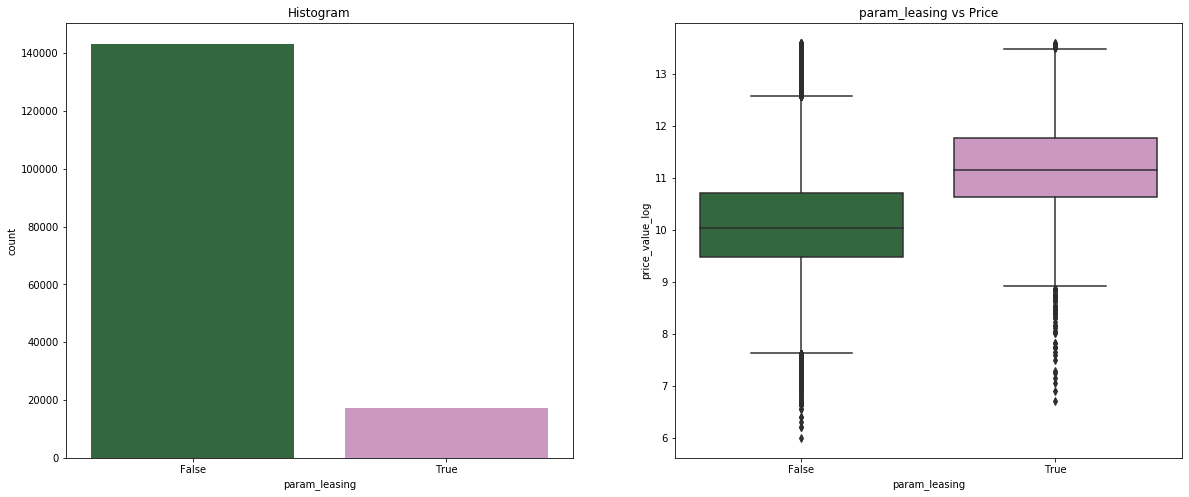

129: param_możliwość_finansowania [100.00%=160616/160616 #2]: 
False    106907
True      53709
Name: param_możliwość_finansowania, dtype: int64


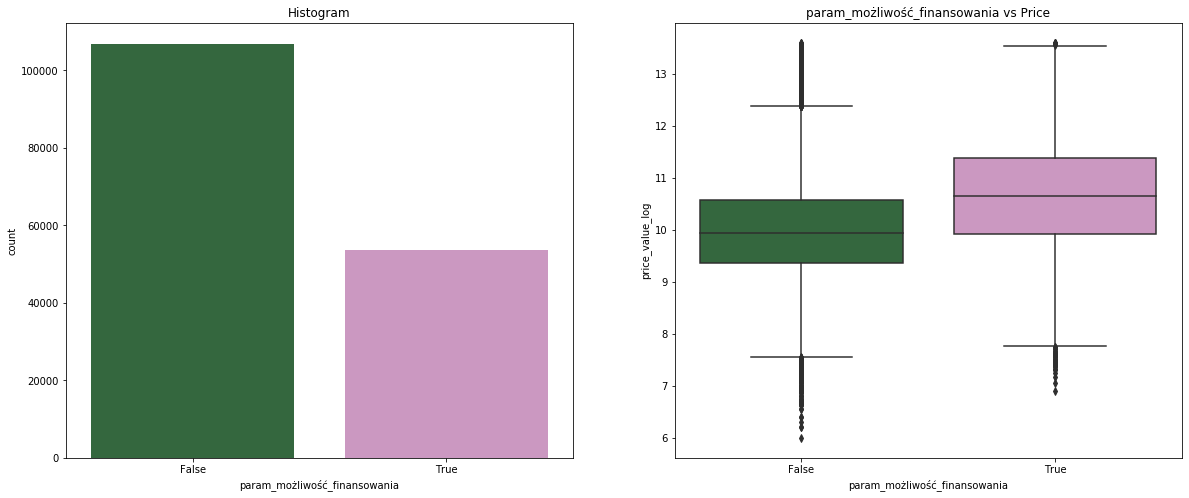

132: param_akryl__niemetalizowany_ [100.00%=160616/160616 #2]: 
False    154473
True       6143
Name: param_akryl__niemetalizowany_, dtype: int64


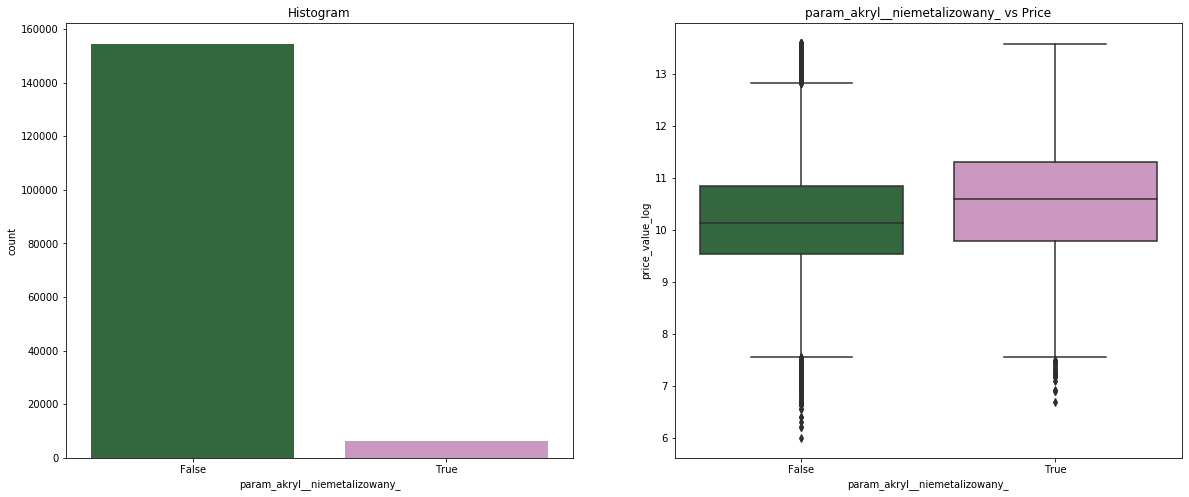

133: param_pierwsza_rejestracja_date [36.28%=58276/160616 #7126]: 
134: price_value_log [66.30%=106494/160616 #7821]: 
135: price_currency_pln [100.00%=160616/160616 #2]: 
True     160288
False       328
Name: price_currency_pln, dtype: int64


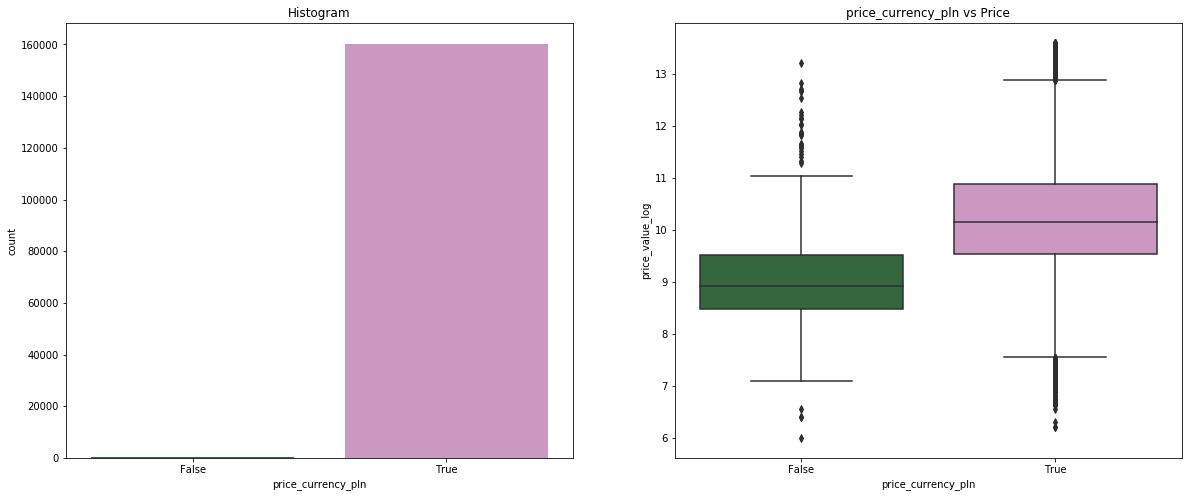

159: new_cat_seller_address [100.00%=160616/160616 #83]: 
161: model_8790 [100.00%=160616/160616 #156457]: 
187: param_wartość_wykupu_2 [100.00%=160616/160616 #354]: 
188: param_liczba_pozostałych_rat_2 [100.00%=160616/160616 #70]: 
189: param_opłata_początkowa_2 [100.00%=160616/160616 #259]: 
191: param_miesięczna_rata_2 [100.00%=160616/160616 #534]: 
192: param_pierwsza_rejestracja_date_na [100.00%=160616/160616 #7127]: 
193: model_XGBRegressor_5856_36229_ [100.00%=160616/160616 #156820]: 
194: param_liczba_miejsc_2 [100.00%=160616/160616 #10]: 
 5.000000e+00    123298
-1.000000e+11     17944
 7.000000e+00      8121
 4.000000e+00      7025
 2.000000e+00      1711
 9.000000e+00      1059
 6.000000e+00       572
 8.000000e+00       504
 3.000000e+00       378
 1.000000e+00         4
Name: param_liczba_miejsc_2, dtype: int64


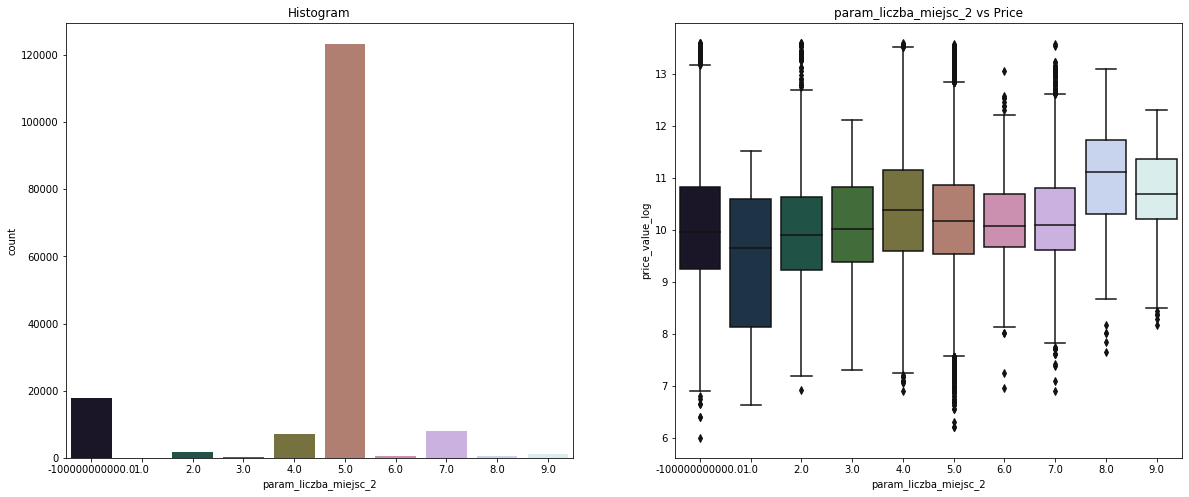

195: model_XGBRegressor_3293_22097_ [100.00%=160616/160616 #156810]: 
196: model_RandomForestRegressor_7089_27166_feats2 [100.00%=160616/160616 #160276]: 
197: model_XGBRegressor_3422_09438_start_vars_train_100 [100.00%=160616/160616 #156420]: 
201: param_moc_norm [91.18%=146446/160616 #602]: 
202: param_pojemność_skokowa_norm [95.23%=152962/160616 #1424]: 
203: ogloszenie_rok [100.00%=160616/160616 #3]: 
 2018.0    160452
-1.0          161
 2017.0         3
Name: ogloszenie_rok, dtype: int64


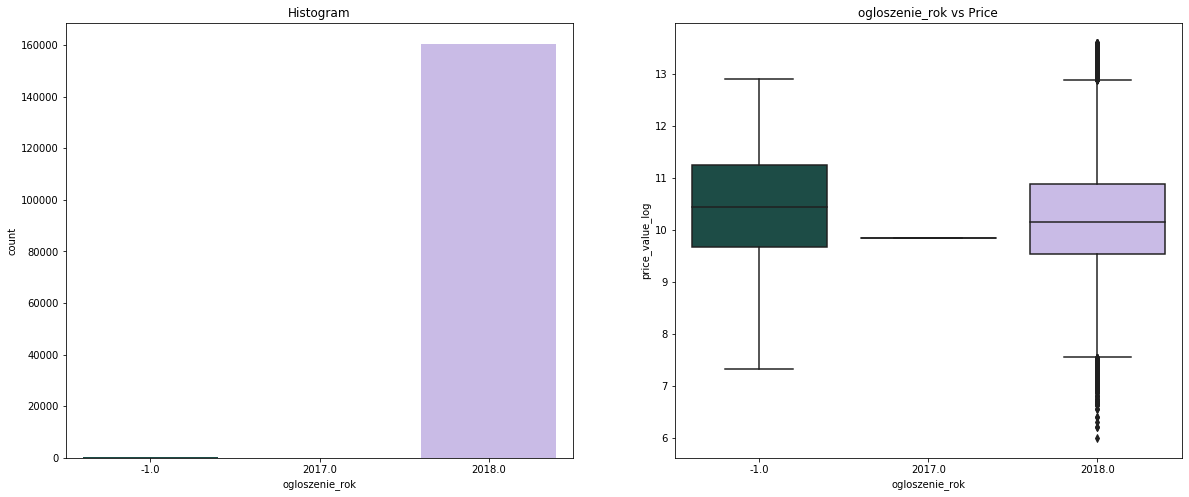

204: ogloszenie_miesiac [100.00%=160616/160616 #5]: 
 3.0     122773
 2.0      37655
-1.0        161
 1.0         24
 12.0         3
Name: ogloszenie_miesiac, dtype: int64


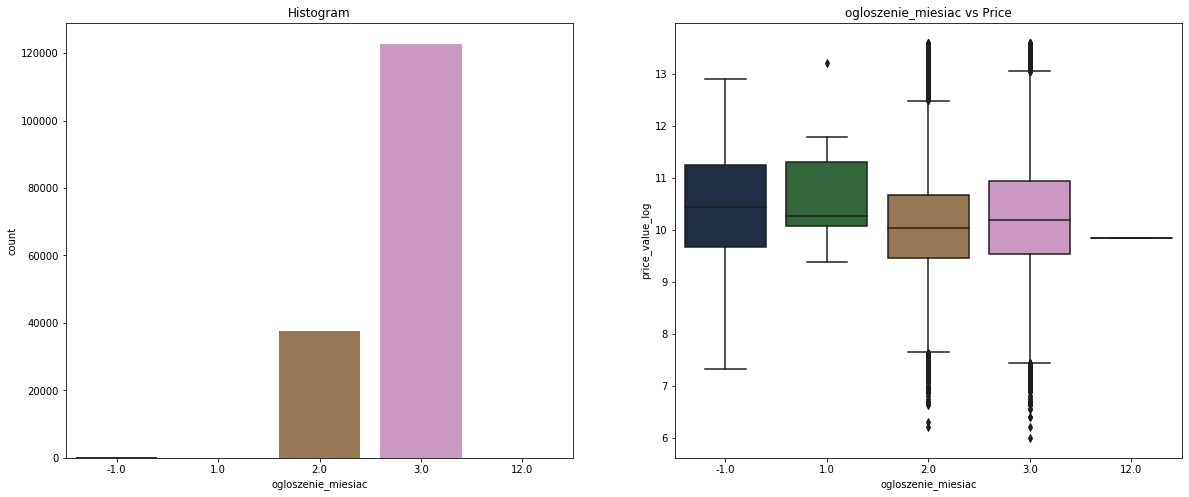

205: ogloszenie_dzien_tyg [100.00%=160616/160616 #8]: 
 0.0    32190
 6.0    27216
 5.0    25216
 4.0    25056
 3.0    19951
 2.0    16375
 1.0    14451
-1.0      161
Name: ogloszenie_dzien_tyg, dtype: int64


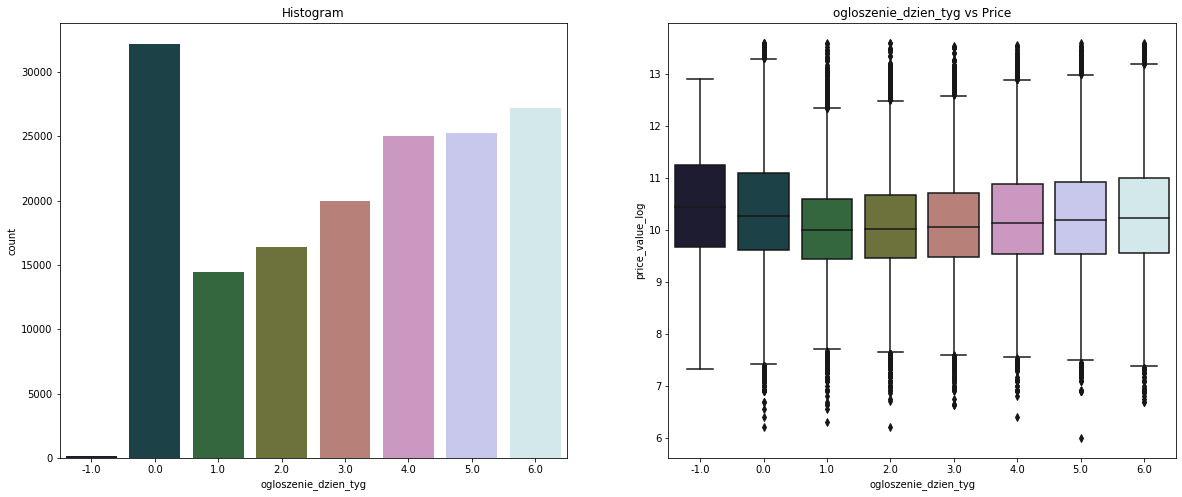

206: ogloszenie_godzina [100.00%=160616/160616 #25]: 
 12.0    12899
 15.0    12498
 16.0    12388
 13.0    12343
 14.0    11950
 11.0    11628
 10.0    11362
 17.0    10795
 9.0      9657
 18.0     9533
 21.0     8321
 20.0     7911
 19.0     7898
 22.0     6831
 8.0      5375
 23.0     3163
 7.0      2421
 0.0      1386
 6.0       903
 1.0       495
 2.0       282
 5.0       165
-1.0       161
 3.0       153
 4.0        98
Name: ogloszenie_godzina, dtype: int64


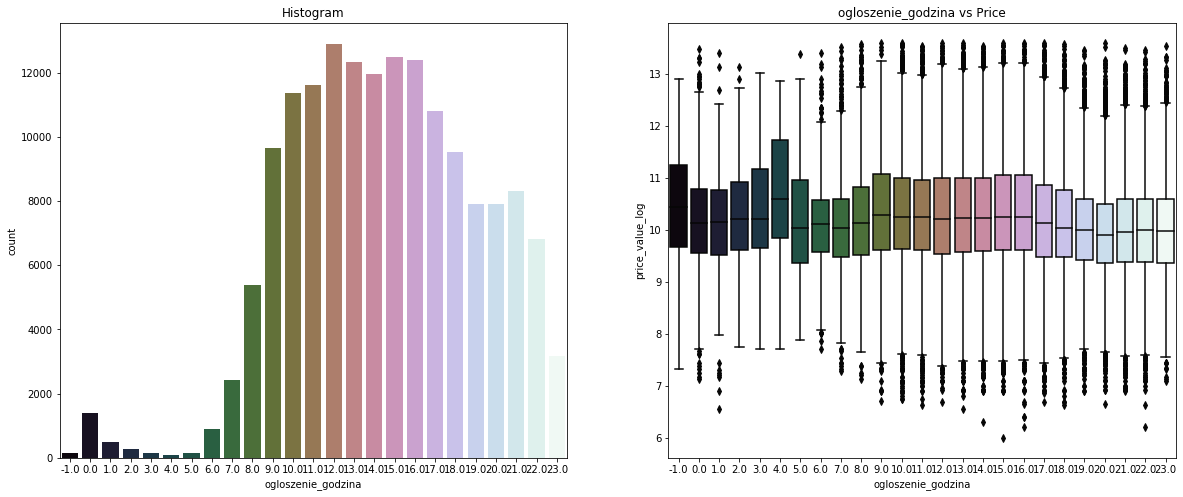

207: ogloszenie_dni_wisi [100.00%=160616/160616 #11960]: 
215: model_XGBRegressor_2608_37590_po_hiperopcie [100.00%=160616/160616 #156524]: 
216: model_XGBRegressor_2195_24982_po_hiperopcie_caly_train [100.00%=160616/160616 #156509]: 


In [8]:
mozo2.print_plots_by_type(total, type = [np.number, bool], min_c = 9.0, max_c = 100., max_values=30)

In [3]:
start_vars = np.sort([
# 'created_at_unix', 'encoded_param_napęd_2', 'encoded_param_rodzaj_paliwa_2', 'encoded_param_skrzynia_biegów_2', 'feature_abs', 'feature_alufelgi', 'feature_asr__kontrola_trakcji_', 'feature_asystent_parkowania', 'feature_bluetooth', 'feature_cd', 'feature_czujniki_parkowania_przednie', 'feature_elektryczne_szyby_tylne', 'feature_elektrycznie_ustawiane_lusterka', 'feature_esp__stabilizacja_toru_jazdy_', 'feature_gniazdo_sd', 'feature_klimatyzacja_automatyczna', 'feature_klimatyzacja_dwustrefowa', 'feature_klimatyzacja_manualna', 'feature_radio_fabryczne', 'feature_tempomat', 'feature_światła_do_jazdy_dziennej', 'feature_światła_led', 'feature_światła_xenonowe', 'latitude', 'longitude', 'model_XGBRegressor_5856_36229_', 'new_param_kod_silnika_cat', 'new_param_liczba_pozostałych_rat_cat', 'new_param_marka_pojazdu_cat', 'new_param_model_pojazdu_cat', 'new_param_napęd_cat', 'new_param_oferta_od_cat', 'new_param_vin_cat', 'new_param_wersja_cat', 'new_seller_name_cat', 'param_bezwypadkowy', 'param_ile_lat_temu_produkcja', 'param_kierownica_po_prawej__anglik_', 'param_leasing', 'param_liczba_miejsc_2', 'param_moc', 'param_pierwsza_rejestracja_date_na', 'param_pojemność_skokowa', 'param_przebieg', 'param_rok_produkcji', 'param_serwisowany_w_aso', 'param_tuning', 'param_uszkodzony', 'param_wartość_wykupu_2', 'param_zarejestrowany_w_polsce', 'price_currency_pln'
# 'created_at_unix', 'encoded_param_rodzaj_paliwa_2', 'encoded_param_typ_2', 'feature_abs', 'feature_asr__kontrola_trakcji_', 'feature_bluetooth', 'feature_cd', 'feature_czujniki_parkowania_przednie', 'feature_elektrycznie_ustawiane_fotele', 'feature_elektrycznie_ustawiane_lusterka', 'feature_gniazdo_sd', 'feature_hud__wyświetlacz_przezierny_', 'feature_isofix', 'feature_klimatyzacja_automatyczna', 'feature_klimatyzacja_manualna', 'feature_ogrzewanie_postojowe', 'feature_podgrzewane_tylne_siedzenia', 'feature_relingi_dachowe', 'feature_tapicerka_skórzana', 'feature_tapicerka_welurowa', 'feature_tempomat', 'feature_światła_led', 'feature_światła_przeciwmgielne', 'feature_światła_xenonowe', 'latitude_na_mean', 'longitude', 'longitude_na_mean', 'model_8790', 'new_param_kolor_cat', 'new_param_liczba_pozostałych_rat_cat', 'new_param_marka_pojazdu_cat', 'new_param_oferta_od_cat', 'new_param_opłata_początkowa_cat', 'new_param_rodzaj_paliwa_cat', 'new_param_wersja_cat', 'new_seller_name_cat', 'new_vin_flex_fuel_cat', 'new_vin_model_cat', 'new_vin_security_cat', 'param_bezwypadkowy', 'param_homologacja_ciężarowa', 'param_ile_lat_temu_produkcja', 'param_leasing', 'param_liczba_miejsc_2', 'param_liczba_pozostałych_rat_2', 'param_matowy', 'param_przebieg', 'param_rok_produkcji', 'param_tuning', 'param_uszkodzony', 'param_wartość_wykupu_2'
# 'encoded_param_napęd_2', 'encoded_param_rodzaj_paliwa_2', 'feature_abs', 'feature_asystent_parkowania', 'feature_centralny_zamek', 'feature_czujnik_deszczu', 'feature_elektrochromatyczne_lusterko_wsteczne', 'feature_elektryczne_szyby_tylne', 'feature_elektrycznie_ustawiane_fotele', 'feature_elektrycznie_ustawiane_lusterka', 'feature_hud__wyświetlacz_przezierny_', 'feature_klimatyzacja_manualna', 'feature_mp3', 'feature_nawigacja_gps', 'feature_odtwarzacz_dvd', 'feature_ogranicznik_prędkości', 'feature_ogrzewanie_postojowe', 'feature_podgrzewana_przednia_szyba', 'feature_podgrzewane_tylne_siedzenia', 'feature_poduszka_powietrzna_kierowcy', 'feature_poduszki_boczne_przednie', 'feature_poduszki_boczne_tylne', 'feature_przyciemniane_szyby', 'feature_radio_fabryczne', 'feature_regulowane_zawieszenie', 'feature_tapicerka_skórzana', 'feature_wielofunkcyjna_kierownica', 'feature_światła_led', 'feature_światła_przeciwmgielne', 'feature_światła_xenonowe', 'model_8790', 'new_param_emisja_co2_cat', 'new_param_kategoria_cat', 'new_param_rodzaj_paliwa_cat', 'new_param_skrzynia_biegów_cat', 'new_param_stan_cat', 'new_param_wersja_cat', 'new_seller_type_cat', 'new_seller_wojewodzctwo_cat', 'new_vin_portrait_cat', 'new_vin_security_cat', 'param_bezwypadkowy', 'param_faktura_vat', 'param_filtr_cząstek_stałych', 'param_liczba_miejsc_2', 'param_liczba_pozostałych_rat_2', 'param_miesięczna_rata_2', 'param_pierwsza_rejestracja_10_lat', 'param_pierwsza_rejestracja_date_na', 'param_przebieg', 'param_serwisowany_w_aso', 'param_vin_len'
#2539.081044523367
#     'encoded_param_napęd_2', 'encoded_param_rodzaj_paliwa_2', 'feature_asystent_parkowania', 'feature_centralny_zamek', 'feature_czujnik_deszczu', 'feature_elektrochromatyczne_lusterko_wsteczne', 'feature_elektryczne_szyby_tylne', 'feature_elektrycznie_ustawiane_fotele', 'feature_elektrycznie_ustawiane_lusterka', 'feature_hud__wyświetlacz_przezierny_', 'feature_klimatyzacja_manualna', 'feature_mp3', 'feature_nawigacja_gps', 'feature_odtwarzacz_dvd', 'feature_ogranicznik_prędkości', 'feature_ogrzewanie_postojowe', 'feature_podgrzewana_przednia_szyba', 'feature_podgrzewane_tylne_siedzenia', 'feature_poduszka_powietrzna_kierowcy', 'feature_poduszki_boczne_przednie', 'feature_poduszki_boczne_tylne', 'feature_przyciemniane_szyby', 'feature_radio_fabryczne', 'feature_regulowane_zawieszenie', 'feature_tapicerka_skórzana', 'feature_wielofunkcyjna_kierownica', 'feature_światła_led', 'feature_światła_przeciwmgielne', 'feature_światła_xenonowe', 'model_8790', 'new_param_emisja_co2_cat', 'new_param_kategoria_cat', 'new_param_rodzaj_paliwa_cat', 'new_param_skrzynia_biegów_cat', 'new_param_stan_cat', 'new_param_wersja_cat', 'new_seller_type_cat', 'new_seller_wojewodzctwo_cat', 'new_vin_portrait_cat', 'new_vin_security_cat', 'param_bezwypadkowy', 'param_faktura_vat', 'param_filtr_cząstek_stałych', 'param_liczba_miejsc_2', 'param_liczba_pozostałych_rat_2', 'param_miesięczna_rata_2', 'param_pierwsza_rejestracja_10_lat', 'param_pierwsza_rejestracja_date_na', 'param_przebieg', 'param_serwisowany_w_aso', 'param_vin_len'
# 2539.8693654611006
#     'encoded_param_kolor_2', 'encoded_param_napęd_2', 'encoded_param_rodzaj_paliwa_2', 'feature_asystent_pasa_ruchu', 'feature_centralny_zamek', 'feature_czujnik_deszczu', 'feature_elektrycznie_ustawiane_fotele', 'feature_elektrycznie_ustawiane_lusterka', 'feature_gniazdo_aux', 'feature_hud__wyświetlacz_przezierny_', 'feature_immobilizer', 'feature_kamera_cofania', 'feature_mp3', 'feature_nawigacja_gps', 'feature_odtwarzacz_dvd', 'feature_ogrzewanie_postojowe', 'feature_podgrzewana_przednia_szyba', 'feature_podgrzewane_tylne_siedzenia', 'feature_poduszka_powietrzna_chroniąca_kolana', 'feature_poduszka_powietrzna_kierowcy', 'feature_poduszki_boczne_tylne', 'feature_przyciemniane_szyby', 'feature_radio_fabryczne', 'feature_regulowane_zawieszenie', 'feature_szyberdach', 'feature_tapicerka_skórzana', 'feature_tuner_tv', 'feature_wielofunkcyjna_kierownica', 'feature_światła_led', 'model_8790', 'new_param_emisja_co2_cat', 'new_param_kategoria_cat', 'new_param_oferta_od_cat', 'new_param_opłata_początkowa_cat', 'new_param_rodzaj_paliwa_cat', 'new_param_vin_cat', 'new_param_wartość_wykupu_cat', 'new_vin_flex_fuel_cat', 'new_vin_portrait_cat', 'new_vin_where_cat', 'ogloszenie_dni_wisi', 'ogloszenie_miesiac', 'param_faktura_vat', 'param_filtr_cząstek_stałych', 'param_kierownica_po_prawej__anglik_', 'param_metalik', 'param_moc', 'param_przebieg', 'param_rok_produkcji_10_lat', 'param_serwisowany_w_aso', 'price_currency_pln'
# 2608.375895255625 sliczny -> 2586.451733203424 -> 2971.787393244852 (900)
#     'created_at_unix', 'encoded_param_rodzaj_paliwa_2', 'encoded_param_typ_2', 'feature_abs', 'feature_asr__kontrola_trakcji_', 'feature_bluetooth', 'feature_cd', 'feature_czujniki_parkowania_przednie', 'feature_elektrycznie_ustawiane_fotele', 'feature_elektrycznie_ustawiane_lusterka', 'feature_gniazdo_sd', 'feature_hud__wyświetlacz_przezierny_', 'feature_isofix', 'feature_klimatyzacja_automatyczna', 'feature_klimatyzacja_manualna', 'feature_ogrzewanie_postojowe', 'feature_podgrzewane_tylne_siedzenia', 'feature_relingi_dachowe', 'feature_tapicerka_skórzana', 'feature_tapicerka_welurowa', 'feature_tempomat', 'feature_światła_led', 'feature_światła_przeciwmgielne', 'feature_światła_xenonowe', 'latitude_na_mean', 'longitude', 'longitude_na_mean', 'model_8790', 'new_param_kolor_cat', 'new_param_liczba_pozostałych_rat_cat', 'new_param_marka_pojazdu_cat', 'new_param_oferta_od_cat', 'new_param_opłata_początkowa_cat', 'new_param_rodzaj_paliwa_cat', 'new_param_wersja_cat', 'new_seller_name_cat', 'new_vin_flex_fuel_cat', 'new_vin_model_cat', 'new_vin_security_cat', 'param_bezwypadkowy', 'param_homologacja_ciężarowa', 'param_ile_lat_temu_produkcja', 'param_leasing', 'param_liczba_miejsc_2', 'param_liczba_pozostałych_rat_2', 'param_matowy', 'param_przebieg', 'param_rok_produkcji', 'param_tuning', 'param_uszkodzony', 'param_wartość_wykupu_2'

#     'created_at_unix', 'encoded_param_rodzaj_paliwa_2', 'encoded_param_typ_2', 'feature_abs', 'feature_asr__kontrola_trakcji_', 'feature_bluetooth', 'feature_cd', 'feature_czujniki_parkowania_przednie', 'feature_elektrycznie_ustawiane_fotele', 'feature_elektrycznie_ustawiane_lusterka', 'feature_gniazdo_sd', 'feature_hud__wyświetlacz_przezierny_', 'feature_isofix', 'feature_klimatyzacja_automatyczna', 'feature_klimatyzacja_manualna', 'feature_ogrzewanie_postojowe', 'feature_podgrzewane_tylne_siedzenia', 'feature_relingi_dachowe', 'feature_tapicerka_skórzana', 'feature_tapicerka_welurowa', 'feature_światła_led', 'feature_światła_przeciwmgielne', 'feature_światła_xenonowe', 'features_all_sum', 'latitude_na_mean', 'longitude', 'longitude_na_mean', 'model_8790', 'new_param_kolor_cat', 'new_param_liczba_pozostałych_rat_cat', 'new_param_marka_pojazdu_cat', 'new_param_oferta_od_cat', 'new_param_opłata_początkowa_cat', 'new_param_rodzaj_paliwa_cat', 'new_param_wersja_cat', 'new_seller_name_cat', 'new_vin_flex_fuel_cat', 'new_vin_model_cat', 'new_vin_security_cat', 'param_bezwypadkowy', 'param_homologacja_ciężarowa', 'param_ile_lat_temu_produkcja', 'param_leasing', 'param_liczba_miejsc_2', 'param_liczba_pozostałych_rat_2', 'param_matowy', 'param_przebieg', 'param_rok_produkcji', 'param_tuning', 'param_uszkodzony', 'param_wartość_wykupu_2'
'created_at_unix', 'encoded_param_rodzaj_paliwa_2', 'encoded_param_typ_2', 'feature_abs', 'feature_asr__kontrola_trakcji_', 'feature_bluetooth', 'feature_cd', 'feature_czujniki_parkowania_przednie', 'feature_elektrycznie_ustawiane_fotele', 'feature_elektrycznie_ustawiane_lusterka', 'feature_gniazdo_sd', 'feature_hud__wyświetlacz_przezierny_', 'feature_isofix', 'feature_klimatyzacja_automatyczna', 'feature_klimatyzacja_manualna', 'feature_ogrzewanie_postojowe', 'feature_podgrzewane_tylne_siedzenia', 'feature_relingi_dachowe', 'feature_tapicerka_skórzana', 'feature_tapicerka_welurowa', 'feature_światła_led', 'feature_światła_przeciwmgielne', 'feature_światła_xenonowe', 'features_all_sum', 'latitude_na_mean', 'longitude', 'longitude_na_mean', 'model_8790', 'new_param_kolor_cat', 'new_param_liczba_pozostałych_rat_cat', 'new_param_marka_pojazdu_cat', 'new_param_oferta_od_cat', 'new_param_opłata_początkowa_cat', 'new_param_rodzaj_paliwa_cat', 'new_param_wersja_cat', 'new_seller_name_cat', 'new_vin_flex_fuel_cat', 'new_vin_model_cat', 'new_vin_security_cat', 'param_bezwypadkowy', 'param_homologacja_ciężarowa', 'param_ile_lat_temu_produkcja', 'param_leasing', 'param_liczba_miejsc_2', 'param_liczba_pozostałych_rat_2', 'param_matowy', 'param_przebieg', 'param_rok_produkcji', 'param_tuning', 'param_uszkodzony', 'param_wartość_wykupu_2'
])

# 'model_8790' = car_price_log_Vladimir_categories_xgb.csv; 5637.56722; "opis": "Vladimir z kategorialnymi mae na train_30"

# black_list = ['car_id', 'price_details', 'price_value', 'price_value_log', 'price_value_pln', 'price_value_pln_log_transl', 'new_cat_price_value',
# #               *[x for x in total.columns if x.startswith('model_')],
#               'model_XGBRegressor_2195_24982_po_hiperopcie_caly_train', #train_100, przeuczony
#               'model_XGBRegressor_3293_22097_', #train_100
#               'longitude_na_mean', 'latitude_na_mean', #gorsze w xbfir
#               *total.columns[total.isnull().any()],
#              ]

# feats3 = total.select_dtypes(include=[np.number, np.bool]).columns
# feats3 = [x for x in feats3 if x not in black_list]
# feats3 = np.sort(feats3)

print(total[start_vars].info(verbose=True))

# print(total[feats3].info(verbose=True))
# print(total[feats3].columns[total[feats3].isnull().any()])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160616 entries, 0 to 160615
Data columns (total 51 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   created_at_unix                          160616 non-null  float64
 1   encoded_param_rodzaj_paliwa_2            160616 non-null  int64  
 2   encoded_param_typ_2                      160616 non-null  int64  
 3   feature_abs                              160616 non-null  bool   
 4   feature_asr__kontrola_trakcji_           160616 non-null  bool   
 5   feature_bluetooth                        160616 non-null  bool   
 6   feature_cd                               160616 non-null  bool   
 7   feature_czujniki_parkowania_przednie     160616 non-null  bool   
 8   feature_elektrycznie_ustawiane_fotele    160616 non-null  bool   
 9   feature_elektrycznie_ustawiane_lusterka  160616 non-null  bool   
 10  feature_gniazdo_sd              

Index([], dtype='object')


In [6]:
def objective(space):
    
    params = {
        'max_depth': int(space['max_depth']),
#         'n_estimators': int(space['n_estimators']),
        'n_estimators': 90,
        'colsample_bytree': space['colsample_bytree'],
        'learning_rate': space['learning_rate'],
        'subsample': space['subsample'],
        'random_state': int(space['random_state']),
        'min_child_weight': int(space['min_child_weight']),
        'reg_alpha': space['reg_alpha'],
        'reg_lambda': space['reg_lambda'],
        'objective': 'reg:squarederror',
        'random_state': 3400,
    }
    
    print('vars_count= ' + str(len(start_vars)))
    
    mae, r2, model, model_cl, learning_curve_plot = mozo2.train_and_submit(train_70_out_price_outs, train_30, total.loc[total['price_value'].isna(),], 
                 start_vars, global_min, 
                 xgb.XGBRegressor, params, digitize=None, subfolder='Hiperopt',
                 file_sufix = 'hiperopt_model_2586_na_train_70_out', opis='train_70_out, z modelu 2586.451733203424', 
                 learning_curve = False, 
                 add_model_column_min = -1, total = total, 
                 save_min=6000, kaggle_min=-1)
    
    return{'loss':mae, 'status': STATUS_OK }
    
space ={
    'max_depth': hp.quniform ('max_depth', 1, 100, 1),
    'n_estimators': hp.quniform ('n_estimators', 1, 1000, 1),
    'colsample_bytree': hp.uniform ('colsample_bytree', 0.1, 1.),
    'learning_rate': hp.uniform ('learning_rate', 0.01, 1.0),
    'subsample': hp.uniform ('subsample', 0.01, 1.),
    'random_state': hp.quniform ('random_state', 0, 10000, 50),
    'min_child_weight': hp.quniform ('min_child_weight', 1, 100, 1),
    'reg_alpha': hp.loguniform ('reg_alpha', 0., 1.),
    'reg_lambda': hp.uniform ('reg_lambda', 0.1, 1.),
}


In [7]:
import warnings
warnings.filterwarnings("ignore")

trials = Trials()
best_params = fmin(fn=objective,
            space=space,
            algo=partial(tpe.suggest, n_startup_jobs=1),
            max_evals=200,
            trials=trials)

try:
    best_params['max_depth'] = int(best_params['max_depth'])
    best_params['n_estimators'] = int(best_params['n_estimators'])
    best_params['random_state'] = int(best_params['random_state'])
    best_params['min_child_weight'] = int(best_params['min_child_weight'])
except:
    print('')
    
print("The best params: ", best_params)
print('vars_count= ' + str(len(start_vars)))
print("VARS= '"+ "', '".join(list(start_vars))+"'")
time_hyper_tuning_end = datetime.now().strftime("%H:%M:%S")


51                                                     
mea: 9916.661380862248                                 
r2: 0.6771232532427249                                 
51                                                                              
mea: 21130.82631892531                                                          
r2: 0.46801727953158545                                                         
51                                                                              
mea: 5313.725114206598                                                          
r2: 0.8462850202484002                                                          
51                                                                              
mea: 13080.105042146792                                                         
r2: 0.7425291858359809                                                          
51                                                                              
mea: 10552.47660194824

r2: 0.850346114045051                                                            
51                                                                               
mea: 4768.128606351108                                                           
r2: 0.847056856572067                                                            
51                                                                               
mea: 5435.3006944183435                                                          
r2: 0.8390815527476749                                                           
51                                                                               
mea: 5427.98473876785                                                            
r2: 0.8474938707153865                                                           
51                                                                               
mea: 5376.234651797577                                                           
r2: 0.8522015243

r2: 0.8481214534146938                                                           
51                                                                               
mea: 4973.222695988015                                                           
r2: 0.8468459853087571                                                           
51                                                                               
mea: 4849.6998474318625                                                          
r2: 0.8532478938550102                                                           
51                                                                               
mea: 4656.86868109708                                                            
r2: 0.8496948526180017                                                           
51                                                                               
mea: 4706.074332975856                                                           
r2: 0.8507401813

r2: 0.8538720710985609                                                           
51                                                                                
mea: 4709.1262535583755                                                           
r2: 0.8537434950738959                                                            
51                                                                                
mea: 9278.39353273349                                                             
r2: 0.7999941100693418                                                            
51                                                                                
mea: 4801.689065886134                                                            
r2: 0.8439123266341889                                                            
51                                                                                
mea: 4955.872861922945                                                            
r2: 0

r2: 0.8007698607660099                                                           
51                                                                               
mea: 5066.621395686977                                                           
r2: 0.8520851763647881                                                           
51                                                                               
mea: 6153.70773627202                                                            
r2: 0.8539065820111884                                                           
51                                                                               
mea: 4681.576085648404                                                           
r2: 0.8551695981723015                                                           
51                                                                               
mea: 4949.65032860622                                                            
r2: 0.8532367243

r2: 0.8542869258804096                                                            
51                                                                                
mea: 4851.939099688098                                                            
r2: 0.8534874386908654                                                            
51                                                                                
mea: 4824.097146600084                                                            
r2: 0.8536676712771433                                                            
51                                                                                
mea: 12421.63983508522                                                            
r2: 0.7202764850361635                                                            
51                                                                                
mea: 46762.70733878673                                                            
r2: 

mea: 4706.755101717899                                                            
r2: 0.8513022019768614                                                            
51                                                                                
mea: 8791.419118555983                                                            
r2: 0.763477762613975                                                             
100%|██████████| 200/200 [50:29<00:00, 15.15s/trial, best loss: 4554.576060050662]
The best params:  {'colsample_bytree': 0.9663658632326368, 'learning_rate': 0.10035449707153277, 'max_depth': 82, 'min_child_weight': 87, 'n_estimators': 112, 'random_state': 8800, 'reg_alpha': 1.1742805993682017, 'reg_lambda': 0.17318957199839372, 'subsample': 0.887971055057341}


vars_count= 51


array(['created_at_unix', 'encoded_param_rodzaj_paliwa_2',
       'encoded_param_typ_2', 'feature_abs',
       'feature_asr__kontrola_trakcji_', 'feature_bluetooth',
       'feature_cd', 'feature_czujniki_parkowania_przednie',
       'feature_elektrycznie_ustawiane_fotele',
       'feature_elektrycznie_ustawiane_lusterka', 'feature_gniazdo_sd',
       'feature_hud__wyświetlacz_przezierny_', 'feature_isofix',
       'feature_klimatyzacja_automatyczna',
       'feature_klimatyzacja_manualna', 'feature_ogrzewanie_postojowe',
       'feature_podgrzewane_tylne_siedzenia', 'feature_relingi_dachowe',
       'feature_tapicerka_skórzana', 'feature_tapicerka_welurowa',
       'feature_światła_led', 'feature_światła_przeciwmgielne',
       'feature_światła_xenonowe', 'features_all_sum', 'latitude_na_mean',
       'longitude', 'longitude_na_mean', 'model_8790',
       'new_param_kolor_cat', 'new_param_liczba_pozostałych_rat_cat',
       'new_param_marka_pojazdu_cat', 'new_param_oferta_od_cat',
       'new_param_opłata_początkowa_cat', 'new_param_rodzaj_paliwa_cat',
       'new_param_wersja_cat', 'new_seller_name_cat',
       'new_vin_flex_fuel_cat', 'new_vin_model_cat',
       'new_vin_security_cat', 'param_bezwypadkowy',
       'param_homologacja_ciężarowa', 'param_ile_lat_temu_produkcja',
       'param_leasing', 'param_liczba_miejsc_2',
       'param_liczba_pozostałych_rat_2', 'param_matowy', 'param_przebieg',
       'param_rok_produkcji', 'param_tuning', 'param_uszkodzony',
       'param_wartość_wykupu_2'], dtype='<U39')


100%|██████████| 200/200 [50:29<00:00, 15.15s/trial, best loss: 4554.576060050662]
The best params:  {'colsample_bytree': 0.9663658632326368, 'learning_rate': 0.10035449707153277, 'max_depth': 82, 'min_child_weight': 87, 'n_estimators': 112, 'random_state': 8800, 'reg_alpha': 1.1742805993682017, 'reg_lambda': 0.17318957199839372, 'subsample': 0.887971055057341}


In [69]:
save_dataframe_total()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160616 entries, 0 to 160615
Data columns (total 218 columns):
 #   Column                                                  Dtype  
---  ------                                                  -----  
 0   breadcrumb                                              object 
 1   created_at                                              object 
 2   price_currency                                          object 
 3   price_details                                           object 
 4   price_value                                             float64
 5   seller_address                                          object 
 6   seller_name                                             object 
 7   seller_type                                             object 
 8   feature_czujniki_parkowania_przednie                    bool   
 9   feature_poduszka_powietrzna_chroniąca_kolana            bool   
 10  feature_kurtyny_powietrzne                             

In [5]:
mozo2.get_kaggle_board()

          teamName                submissionDate       score
0       adamskorek        2020-11-01T09:08:37.5Z  5137.81705
1           pelele  2020-10-31T19:46:31.2633333Z  5369.00636
2             mozo  2020-10-30T16:38:46.7333333Z  5466.72056
3  Adrian Mich***i       2020-10-31T12:30:08.39Z  5578.96222
4   Remek Półtorak  2020-10-31T19:09:20.1866667Z  5581.85197
